### Test ConsLinUCB, LinUCB, ThresholdBandit and GreedyBandit

In [1]:
%cd /home/lansdell/projects/conservativerdd
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

from lib.bandits import LinUCB, ThresholdBandit,ThresholdConsBandit,GreedyBandit, ConsLinUCB, expected_regret, expected_regret_per_arm
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns
import pandas as pd
sns.set_style('ticks')

/home/lansdell/projects/conservativerdd
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/lansdell/.local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#alg = 'greedy'
#alg = 'linucb'
#alg = 'threshold'
#alg = 'thresholdcons'
alg = 'conslinucb'

M = 3    #number of runs
N = 10000 #number of timesteps
save = False
alpha = 0.1 #CLUCB parameter...
#alpha = 1.0 #CLUCB parameter...
max_alpha = 2
max_beta = 2
k = 4    #Number of arms
d = 5   #Dimension of context (includes one dim for intercept term)
intercept = True
evaluate_every = 100

if alg == 'greedy':
	BanditAlg = GreedyBandit
elif alg == 'linucb':
	BanditAlg = LinUCB
elif alg == 'threshold':
	BanditAlg = ThresholdBandit
elif alg == 'thresholdcons':
	BanditAlg = ThresholdConsBandit
elif alg == 'conslinucb':
	BanditAlg = ConsLinUCB
else:
	print("Select a valid algorithm")
    
baseline_idx = 0

In [3]:
def second_largest_idx(a):
    vals = a.sort()

## Run CLUCB 

In [4]:
#Generate slopes and intercepts
alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))+1

#baseline_alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,1,d-1))
#baseline_betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,1))

regret = np.zeros((M, N))
expt_regret = np.zeros((M, N))
arm_pulls = np.zeros((M, N, k+1))
n_changes = np.zeros((M, N))
update_pol = np.zeros((M, N))

In [5]:
print("Running %s algorithm"%alg)
expt_rewards_clucb = np.zeros((M, N))
expt_rewards_baseline_clucb = np.zeros((M, N))
BanditAlg = ConsLinUCB

for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    means = expected_regret_per_arm(generator)
    #Choose the baseline arm as the 2nd best arm on average....
    print(means)
    sorted_means = np.sort(means)
    #m_idx = np.argmax(means)
    m_idx = np.where(means == sorted_means[baseline_idx])[0][0]
    print('Baseline arm is %d'%m_idx)
    base_alpha = alphas[m,m_idx,:]
    base_beta = betas[m,m_idx]
    bandit = BanditAlg(generator, (base_alpha, base_beta), alpha = alpha)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        regret[m,i] = r
        print(i, arm_idx, r)
        if arm_idx >= 0:
            arm_pulls[m,i,arm_idx] = 1
            expt_rewards_clucb[m,i] = np.dot(ctx[1:], alphas[m,arm_idx,:]) + betas[m,arm_idx]
        else:
            arm_pulls[m,i,m_idx] = 1
            expt_rewards_clucb[m,i] = np.dot(ctx[1:], alphas[m,m_idx,:]) + betas[m,m_idx]
        if arm_idx == m_idx:
            print("idx: %d -- playing baseline arm"%i)
        expt_rewards_baseline_clucb[m,i] = np.dot(ctx[1:],base_alpha) + base_beta


Running conslinucb algorithm
[ 0.59987118  0.28982517  2.54912528  0.50568706]
Baseline arm is 1
Run: 1/3
(0, -1, 0.0)
(1, -1, 0.0)
(2, -1, 0.0)
(3, -1, 0.028191772115110258)
(4, -1, 0.065771604860444643)
(5, -1, 0.0)
(6, -1, 0.0)
(7, -1, 0.0)
(8, 0, 0.69242003188519141)
(9, -1, 0.0)
(10, -1, 0.55043224492550724)
(11, -1, 1.2746741678002125)
(12, -1, 0.4030045135065673)
(13, -1, 0.0)
(14, -1, 0.15181610411822977)
(15, -1, 0.0)
(16, -1, 0.0)
(17, -1, 0.40197535633163928)
(18, -1, 0.0)
(19, -1, 0.0)
(20, -1, 0.0)
(21, -1, 0.0)
(22, -1, 0.0)
(23, -1, 0.1889582565749548)
(24, -1, 0.0)
(25, -1, 0.23952957281300624)
(26, -1, 0.10139364501318027)
(27, -1, 0.1394036437452586)
(28, -1, 0.0)
(29, -1, 0.0)
(30, -1, 0.048158701606090037)
(31, -1, 0.16005207141942757)
(32, -1, 0.60690439213250547)
(33, -1, 0.078886979022784409)
(34, -1, 0.0)
(35, -1, 0.0)
(36, -1, 0.0)
(37, -1, 0.0)
(38, 1, 1.0607383798102381)
idx: 38 -- playing baseline arm
(39, -1, 0.0)
(40, -1, 1.0068296684622191)
(41, -1, 0.0)


(453, -1, 0.0)
(454, 1, 0.16493361159929143)
idx: 454 -- playing baseline arm
(455, -1, 0.0)
(456, -1, 0.0)
(457, -1, 0.74155567278051837)
(458, -1, 0.0)
(459, -1, 0.013059574975005539)
(460, -1, 0.0)
(461, -1, 0.0)
(462, -1, 0.57364739695925082)
(463, -1, 0.82260536475002988)
(464, -1, 1.6575561977323838)
(465, 0, 0.27360810643068434)
(466, -1, 0.87357507861007888)
(467, -1, 0.0)
(468, -1, 0.0)
(469, -1, 1.7368573581522644)
(470, -1, 0.0)
(471, -1, 0.0)
(472, -1, 0.0)
(473, -1, 1.6658723962677473)
(474, -1, 0.20672088126833743)
(475, -1, 0.11566810921847637)
(476, -1, 1.056331578433793)
(477, -1, 0.0)
(478, -1, 0.014309417592368368)
(479, -1, 0.27894479984935006)
(480, -1, 0.047701673636860287)
(481, -1, 0.29583510989684891)
(482, 3, 0.0)
(483, -1, 0.0)
(484, -1, 1.6973303576432279)
(485, -1, 0.0)
(486, -1, 0.1830879784292021)
(487, -1, 0.0)
(488, -1, 0.0)
(489, -1, 0.0)
(490, -1, 0.31213344000363596)
(491, -1, 0.36590820598642115)
(492, -1, 0.0)
(493, -1, 0.0)
(494, -1, 0.02659768343

(852, -1, 0.0)
(853, -1, 0.0)
(854, -1, 0.33540877673039349)
(855, -1, 0.0)
(856, -1, 0.68938074417306139)
(857, -1, 0.0)
(858, -1, 0.0)
(859, 1, 0.0033532358288111963)
idx: 859 -- playing baseline arm
(860, -1, 0.0)
(861, -1, 0.53321553868937266)
(862, -1, 1.4092005647500145)
(863, -1, 0.0)
(864, -1, 0.0)
(865, -1, 0.37556558285106967)
(866, -1, 0.0)
(867, -1, 0.27189603983869959)
(868, -1, 0.0)
(869, -1, 0.0)
(870, 0, 0.14872651481671673)
(871, -1, 0.0)
(872, -1, 0.0)
(873, -1, 0.0)
(874, -1, 0.78367225351475067)
(875, -1, 0.66825770607861101)
(876, -1, 0.35174913334889468)
(877, 3, 0.0)
(878, 1, 0.0)
idx: 878 -- playing baseline arm
(879, -1, 0.0019903615255698615)
(880, -1, 0.0)
(881, 1, 0.0)
idx: 881 -- playing baseline arm
(882, -1, 0.33737830768030741)
(883, -1, 0.055180719639774334)
(884, -1, 0.0)
(885, -1, 0.8334396873596488)
(886, -1, 0.57301520497829728)
(887, -1, 0.0)
(888, -1, 0.0)
(889, -1, 0.0)
(890, -1, 0.0)
(891, -1, 0.26052742537503804)
(892, -1, 0.0)
(893, -1, 0.7088

(1273, -1, 0.28337269119662789)
(1274, 3, 0.0)
(1275, -1, 0.0)
(1276, -1, 0.0)
(1277, 0, 0.19452607838709723)
(1278, -1, 0.25139158338517953)
(1279, -1, 0.0)
(1280, -1, 0.0)
(1281, -1, 0.0)
(1282, -1, 0.096855501664618426)
(1283, -1, 0.85037075007358953)
(1284, -1, 0.0)
(1285, -1, 0.0)
(1286, -1, 0.0)
(1287, -1, 0.20879995739419832)
(1288, -1, 0.0)
(1289, -1, 0.46294636977230985)
(1290, -1, 0.0)
(1291, -1, 1.3553881881927912)
(1292, -1, 0.0)
(1293, -1, 0.25366437309752876)
(1294, -1, 0.77688960896348125)
(1295, -1, 0.0)
(1296, 3, 0.38712341108901827)
(1297, 0, 0.41992985663058191)
(1298, 3, 0.0)
(1299, -1, 0.053666557401008674)
(1300, 1, 0.53494099528218797)
idx: 1300 -- playing baseline arm
(1301, -1, 0.0)
(1302, -1, 0.0)
(1303, -1, 0.21163502457082717)
(1304, -1, 0.0)
(1305, -1, 0.0)
(1306, -1, 0.69691512802611899)
(1307, 3, 0.21522208736906867)
(1308, -1, 0.0)
(1309, -1, 0.60851395746307979)
(1310, -1, 0.0)
(1311, -1, 0.0)
(1312, 1, 0.0)
idx: 1312 -- playing baseline arm
(1313, -1, 

(1639, 3, 0.0)
(1640, 0, 0.42265524045031944)
(1641, -1, 0.29178053537579896)
(1642, -1, 0.0)
(1643, 1, 0.0)
idx: 1643 -- playing baseline arm
(1644, -1, 0.0)
(1645, 1, 0.0)
idx: 1645 -- playing baseline arm
(1646, -1, 0.0)
(1647, -1, 0.0)
(1648, 0, 0.17095196410500879)
(1649, -1, 0.0)
(1650, 3, 0.0)
(1651, -1, 0.36204809608720434)
(1652, 3, 0.0091179619011871882)
(1653, -1, 0.0)
(1654, -1, 0.25934082310855677)
(1655, 3, 0.0)
(1656, -1, 0.0)
(1657, -1, 0.87172152497637301)
(1658, -1, 0.18974293782602314)
(1659, -1, 0.20229531777226595)
(1660, -1, 0.0)
(1661, 3, 0.0)
(1662, 1, 0.6108099351281322)
idx: 1662 -- playing baseline arm
(1663, 0, 0.45931654925019705)
(1664, 2, 1.8374387498059992)
(1665, -1, 1.0167572635348741)
(1666, -1, 0.0)
(1667, -1, 0.0)
(1668, -1, 0.095133148458592998)
(1669, 3, 0.0)
(1670, 1, 0.034362679428435516)
idx: 1670 -- playing baseline arm
(1671, -1, 0.0)
(1672, -1, 0.0)
(1673, 3, 0.0)
(1674, -1, 0.0)
(1675, 3, 0.0)
(1676, -1, 0.0)
(1677, 0, 0.76795402215864539)


(1974, -1, 0.0)
(1975, 0, 0.67294000413161603)
(1976, -1, 1.1546551887659817)
(1977, -1, 0.0)
(1978, -1, 0.49895040426261672)
(1979, -1, 0.85753952957594748)
(1980, -1, 0.0)
(1981, 3, 0.0)
(1982, 1, 0.0)
idx: 1982 -- playing baseline arm
(1983, -1, 0.0)
(1984, -1, 0.22449832072658982)
(1985, -1, 0.0)
(1986, -1, 0.0)
(1987, -1, 0.0)
(1988, -1, 0.0)
(1989, -1, 0.39373277405832008)
(1990, -1, 0.85378020747306971)
(1991, 3, 0.0)
(1992, 3, 0.0)
(1993, -1, 0.0)
(1994, 0, 0.62471809391100397)
(1995, -1, 0.0)
(1996, 3, 0.0)
(1997, 3, 0.0)
(1998, -1, 0.86350688703650968)
(1999, -1, 0.12311544124481122)
(2000, 3, 0.0)
(2001, 0, 0.2814197558724536)
(2002, 1, 0.0)
idx: 2002 -- playing baseline arm
(2003, -1, 0.0)
(2004, 3, 0.0)
(2005, 1, 0.0)
idx: 2005 -- playing baseline arm
(2006, 3, 0.0)
(2007, -1, 0.0)
(2008, 3, 0.0)
(2009, 3, 0.0)
(2010, 1, 0.0)
idx: 2010 -- playing baseline arm
(2011, -1, 0.0)
(2012, 3, 0.0)
(2013, 2, 1.5857885464318835)
(2014, -1, 0.0)
(2015, 1, 0.22708080997332214)
idx: 20

(2325, 3, 0.0)
(2326, 3, 0.0)
(2327, 3, 0.0)
(2328, 3, 0.0)
(2329, 3, 0.0)
(2330, 0, 0.16519072930560208)
(2331, 0, 0.21255090606465132)
(2332, 3, 0.0)
(2333, 1, 0.0)
idx: 2333 -- playing baseline arm
(2334, 1, 0.0)
idx: 2334 -- playing baseline arm
(2335, 1, 0.0)
idx: 2335 -- playing baseline arm
(2336, 1, 0.0)
idx: 2336 -- playing baseline arm
(2337, 3, 0.0)
(2338, 3, 0.0)
(2339, 1, 0.0)
idx: 2339 -- playing baseline arm
(2340, 1, 0.0)
idx: 2340 -- playing baseline arm
(2341, 1, 0.0)
idx: 2341 -- playing baseline arm
(2342, 3, 0.0)
(2343, 2, 2.8867474279412266)
(2344, 3, 0.0)
(2345, 3, 0.033490003258570433)
(2346, -1, 1.1055986623290335)
(2347, 3, 0.0)
(2348, 3, 0.0)
(2349, 1, 0.0)
idx: 2349 -- playing baseline arm
(2350, 3, 0.0)
(2351, -1, 0.0)
(2352, 3, 0.0)
(2353, 1, 0.0)
idx: 2353 -- playing baseline arm
(2354, 1, 0.0)
idx: 2354 -- playing baseline arm
(2355, 3, 0.0)
(2356, 1, 0.0)
idx: 2356 -- playing baseline arm
(2357, 3, 0.0)
(2358, 0, 0.024130169357067688)
(2359, 1, 0.0)
idx

(2693, 1, 0.0)
idx: 2693 -- playing baseline arm
(2694, 3, 0.0)
(2695, -1, 0.0)
(2696, -1, 0.0)
(2697, 0, 0.72650565778934983)
(2698, 3, 0.0)
(2699, -1, 0.0)
(2700, 1, 0.0)
idx: 2700 -- playing baseline arm
(2701, 0, 0.0)
(2702, 3, 0.0)
(2703, 2, 2.4092015698190838)
(2704, -1, 0.0)
(2705, -1, 0.0)
(2706, -1, 0.0)
(2707, 3, 0.0)
(2708, -1, 0.27582550166367326)
(2709, 3, 0.0)
(2710, 1, 0.0)
idx: 2710 -- playing baseline arm
(2711, 3, 0.0)
(2712, -1, 0.0)
(2713, -1, 1.0115125473521953)
(2714, -1, 0.0)
(2715, 0, 0.30923998646589768)
(2716, -1, 0.61601557212229408)
(2717, 3, 0.0)
(2718, 3, 0.0)
(2719, 3, 0.0)
(2720, 1, 0.0)
idx: 2720 -- playing baseline arm
(2721, 1, 0.0)
idx: 2721 -- playing baseline arm
(2722, 0, 0.24709885537283394)
(2723, 1, 0.0)
idx: 2723 -- playing baseline arm
(2724, -1, 0.094493140265545117)
(2725, -1, 0.0)
(2726, 0, 0.0)
(2727, 1, 0.0)
idx: 2727 -- playing baseline arm
(2728, 3, 0.0)
(2729, -1, 0.050003326898139688)
(2730, 0, 0.0)
(2731, 3, 0.0)
(2732, 1, 0.0)
idx:

(2980, 3, 0.0)
(2981, 3, 0.0)
(2982, 3, 0.0)
(2983, 3, 0.64596180353729549)
(2984, 1, 0.0)
idx: 2984 -- playing baseline arm
(2985, 3, 0.0)
(2986, 1, 0.0)
idx: 2986 -- playing baseline arm
(2987, 3, 0.0)
(2988, 1, 0.0)
idx: 2988 -- playing baseline arm
(2989, 3, 0.0)
(2990, 0, 0.0)
(2991, 3, 0.0)
(2992, 0, 0.73108882648497997)
(2993, 0, 0.0)
(2994, 2, 0.9099290509487219)
(2995, -1, 0.0)
(2996, 0, 0.0)
(2997, 0, 0.0)
(2998, 3, 0.0)
(2999, 1, 0.0)
idx: 2999 -- playing baseline arm
(3000, 1, 0.0)
idx: 3000 -- playing baseline arm
(3001, 1, 0.0)
idx: 3001 -- playing baseline arm
(3002, 3, 0.0)
(3003, 3, 0.0)
(3004, 3, 0.0)
(3005, 3, 0.0)
(3006, 3, 0.0)
(3007, 1, 0.0)
idx: 3007 -- playing baseline arm
(3008, 3, 0.0)
(3009, 3, 0.00125652457935721)
(3010, 3, 0.0)
(3011, 1, 0.0)
idx: 3011 -- playing baseline arm
(3012, 2, 1.0450464666985539)
(3013, 3, 0.0)
(3014, 0, 0.6680260924328979)
(3015, 1, 0.0)
idx: 3015 -- playing baseline arm
(3016, 1, 0.0)
idx: 3016 -- playing baseline arm
(3017, 1, 0

(3303, 1, 0.0)
idx: 3303 -- playing baseline arm
(3304, 3, 0.012685125948425746)
(3305, 3, 0.0)
(3306, 1, 0.0)
idx: 3306 -- playing baseline arm
(3307, 1, 0.0)
idx: 3307 -- playing baseline arm
(3308, 1, 0.0)
idx: 3308 -- playing baseline arm
(3309, 0, 0.59022353715174436)
(3310, 1, 0.0)
idx: 3310 -- playing baseline arm
(3311, 3, 0.0)
(3312, 3, 0.0)
(3313, 1, 0.0)
idx: 3313 -- playing baseline arm
(3314, 3, 0.0)
(3315, 3, 0.060718312547278996)
(3316, 1, 0.0)
idx: 3316 -- playing baseline arm
(3317, 1, 0.0)
idx: 3317 -- playing baseline arm
(3318, 1, 0.26826832134568934)
idx: 3318 -- playing baseline arm
(3319, 0, 0.19219268876523943)
(3320, 0, 0.16493744906044694)
(3321, 3, 0.0)
(3322, 1, 0.0)
idx: 3322 -- playing baseline arm
(3323, 3, 0.0)
(3324, 0, 0.0)
(3325, 0, 0.0)
(3326, 3, 0.0)
(3327, 2, 1.9399883991714726)
(3328, 1, 0.0)
idx: 3328 -- playing baseline arm
(3329, 1, 0.0)
idx: 3329 -- playing baseline arm
(3330, 3, 0.0)
(3331, 3, 0.0)
(3332, 1, 0.0)
idx: 3332 -- playing baseline

(3603, 1, 0.0)
idx: 3603 -- playing baseline arm
(3604, 0, 0.0)
(3605, 3, 0.0)
(3606, 3, 0.0)
(3607, 3, 0.0)
(3608, 1, 0.0)
idx: 3608 -- playing baseline arm
(3609, 1, 0.0)
idx: 3609 -- playing baseline arm
(3610, 0, 0.0)
(3611, 0, 0.0)
(3612, 3, 0.0)
(3613, 1, 0.0)
idx: 3613 -- playing baseline arm
(3614, 3, 0.0)
(3615, 3, 0.0)
(3616, 3, 0.0)
(3617, 0, 0.0069577974591927827)
(3618, 0, 0.1645441847506679)
(3619, 1, 0.0)
idx: 3619 -- playing baseline arm
(3620, 2, 1.7939480938616281)
(3621, 3, 0.0)
(3622, 3, 0.0)
(3623, 3, 0.0)
(3624, 3, 0.0)
(3625, 1, 0.0)
idx: 3625 -- playing baseline arm
(3626, 1, 0.0)
idx: 3626 -- playing baseline arm
(3627, 1, 0.0)
idx: 3627 -- playing baseline arm
(3628, 3, 0.0)
(3629, 3, 0.0)
(3630, 3, 0.0)
(3631, 3, 0.0)
(3632, 1, 0.0)
idx: 3632 -- playing baseline arm
(3633, 0, 0.17017757903266673)
(3634, 0, 0.0)
(3635, 1, 0.0)
idx: 3635 -- playing baseline arm
(3636, 3, 0.0)
(3637, 1, 0.0)
idx: 3637 -- playing baseline arm
(3638, 0, 0.0)
(3639, 1, 0.0760685385

(3915, 3, 0.0)
(3916, 3, 0.0)
(3917, 1, 0.0)
idx: 3917 -- playing baseline arm
(3918, 3, 0.0)
(3919, 1, 0.0)
idx: 3919 -- playing baseline arm
(3920, 3, 0.0)
(3921, 3, 0.0)
(3922, 3, 0.0)
(3923, 1, 0.0)
idx: 3923 -- playing baseline arm
(3924, 0, 0.003014351269429949)
(3925, 1, 0.0)
idx: 3925 -- playing baseline arm
(3926, 1, 0.0)
idx: 3926 -- playing baseline arm
(3927, 3, 0.0)
(3928, 1, 0.0)
idx: 3928 -- playing baseline arm
(3929, 3, 0.0)
(3930, 3, 0.0)
(3931, 3, 0.0)
(3932, 1, 0.0)
idx: 3932 -- playing baseline arm
(3933, 3, 0.0)
(3934, 0, 0.18341501414887373)
(3935, 1, 0.0)
idx: 3935 -- playing baseline arm
(3936, 0, 0.1289944855630254)
(3937, 0, 0.0067515403862659085)
(3938, 0, 0.0)
(3939, 3, 0.0)
(3940, 0, 0.0)
(3941, 1, 0.0)
idx: 3941 -- playing baseline arm
(3942, 1, 0.0)
idx: 3942 -- playing baseline arm
(3943, 3, 0.0)
(3944, 1, 0.0)
idx: 3944 -- playing baseline arm
(3945, 1, 0.0)
idx: 3945 -- playing baseline arm
(3946, 3, 0.0)
(3947, 0, 0.0)
(3948, 0, 0.042813004430439561)

(4216, 3, 0.0)
(4217, 1, 0.0)
idx: 4217 -- playing baseline arm
(4218, 3, 0.0)
(4219, 3, 0.0)
(4220, 2, 1.5009249685014043)
(4221, 3, 0.0)
(4222, 1, 0.0)
idx: 4222 -- playing baseline arm
(4223, 1, 0.0)
idx: 4223 -- playing baseline arm
(4224, 3, 0.0)
(4225, 1, 0.0)
idx: 4225 -- playing baseline arm
(4226, 3, 0.0)
(4227, 1, 0.0)
idx: 4227 -- playing baseline arm
(4228, 1, 0.0)
idx: 4228 -- playing baseline arm
(4229, 1, 0.0)
idx: 4229 -- playing baseline arm
(4230, 1, 0.0)
idx: 4230 -- playing baseline arm
(4231, 1, 0.0)
idx: 4231 -- playing baseline arm
(4232, 3, 0.0)
(4233, 1, 0.0)
idx: 4233 -- playing baseline arm
(4234, 3, 0.0)
(4235, 1, 0.0)
idx: 4235 -- playing baseline arm
(4236, 1, 0.0)
idx: 4236 -- playing baseline arm
(4237, 1, 0.0)
idx: 4237 -- playing baseline arm
(4238, 0, 0.0)
(4239, 1, 0.0)
idx: 4239 -- playing baseline arm
(4240, 1, 0.0)
idx: 4240 -- playing baseline arm
(4241, 0, 0.0)
(4242, 1, 0.0)
idx: 4242 -- playing baseline arm
(4243, 3, 0.0)
(4244, 1, 0.0)
idx: 4

idx: 4510 -- playing baseline arm
(4511, 1, 0.0)
idx: 4511 -- playing baseline arm
(4512, 1, 0.0)
idx: 4512 -- playing baseline arm
(4513, 1, 0.0)
idx: 4513 -- playing baseline arm
(4514, 1, 0.0)
idx: 4514 -- playing baseline arm
(4515, 1, 0.0)
idx: 4515 -- playing baseline arm
(4516, 1, 0.0)
idx: 4516 -- playing baseline arm
(4517, 3, 0.0)
(4518, 1, 0.0)
idx: 4518 -- playing baseline arm
(4519, 3, 0.0)
(4520, 1, 0.0)
idx: 4520 -- playing baseline arm
(4521, 1, 0.0)
idx: 4521 -- playing baseline arm
(4522, 3, 0.0)
(4523, 1, 0.0)
idx: 4523 -- playing baseline arm
(4524, 0, 0.0)
(4525, 0, 0.28651241704098185)
(4526, 1, 0.0)
idx: 4526 -- playing baseline arm
(4527, 3, 0.0)
(4528, 1, 0.0)
idx: 4528 -- playing baseline arm
(4529, 3, 0.0)
(4530, 1, 0.0)
idx: 4530 -- playing baseline arm
(4531, 0, 0.0)
(4532, 3, 0.0)
(4533, 3, 0.0)
(4534, 1, 0.0)
idx: 4534 -- playing baseline arm
(4535, 1, 0.0)
idx: 4535 -- playing baseline arm
(4536, 0, 0.080338291041257892)
(4537, 2, 0.82903729508189894)
(4

(4810, 0, 0.41032414516609195)
(4811, 1, 0.0)
idx: 4811 -- playing baseline arm
(4812, 0, 0.19962087909799586)
(4813, 3, 0.0)
(4814, 3, 0.0)
(4815, 3, 0.0)
(4816, 1, 0.18223216716137935)
idx: 4816 -- playing baseline arm
(4817, 1, 0.0)
idx: 4817 -- playing baseline arm
(4818, 0, 0.0)
(4819, 1, 0.0)
idx: 4819 -- playing baseline arm
(4820, 1, 0.0)
idx: 4820 -- playing baseline arm
(4821, 1, 0.0)
idx: 4821 -- playing baseline arm
(4822, 1, 0.0)
idx: 4822 -- playing baseline arm
(4823, 3, 0.0)
(4824, 0, 0.067606280014840703)
(4825, 1, 0.0)
idx: 4825 -- playing baseline arm
(4826, 3, 0.0)
(4827, 1, 0.0)
idx: 4827 -- playing baseline arm
(4828, 1, 0.0)
idx: 4828 -- playing baseline arm
(4829, 0, 0.0)
(4830, 3, 0.0)
(4831, 1, 0.0)
idx: 4831 -- playing baseline arm
(4832, 0, 0.52705363075194533)
(4833, 3, 0.0)
(4834, 0, 0.0)
(4835, 1, 0.0)
idx: 4835 -- playing baseline arm
(4836, 1, 0.0)
idx: 4836 -- playing baseline arm
(4837, 1, 0.0)
idx: 4837 -- playing baseline arm
(4838, 0, 0.10263749856

(5109, 1, 0.0)
idx: 5109 -- playing baseline arm
(5110, 1, 0.0)
idx: 5110 -- playing baseline arm
(5111, 3, 0.0)
(5112, 1, 0.0)
idx: 5112 -- playing baseline arm
(5113, 0, 0.0)
(5114, 0, 0.15149570454537797)
(5115, 1, 0.0)
idx: 5115 -- playing baseline arm
(5116, 1, 0.0)
idx: 5116 -- playing baseline arm
(5117, 0, 0.22915231266603109)
(5118, 3, 0.0)
(5119, 1, 0.0)
idx: 5119 -- playing baseline arm
(5120, 1, 0.0)
idx: 5120 -- playing baseline arm
(5121, 0, 0.14539139283542335)
(5122, 0, 0.0)
(5123, 0, 0.0)
(5124, 0, 0.0)
(5125, 3, 0.0)
(5126, 3, 0.0)
(5127, 1, 0.0)
idx: 5127 -- playing baseline arm
(5128, 1, 0.0)
idx: 5128 -- playing baseline arm
(5129, 3, 0.027127029150801785)
(5130, 3, 0.0)
(5131, 1, 0.0)
idx: 5131 -- playing baseline arm
(5132, 1, 0.0)
idx: 5132 -- playing baseline arm
(5133, 0, 0.045881990193372468)
(5134, 1, 0.0)
idx: 5134 -- playing baseline arm
(5135, 1, 0.0)
idx: 5135 -- playing baseline arm
(5136, 1, 0.0)
idx: 5136 -- playing baseline arm
(5137, 1, 0.0)
idx: 51

(5392, 3, 0.0)
(5393, 3, 0.0)
(5394, 1, 0.0)
idx: 5394 -- playing baseline arm
(5395, 3, 0.0)
(5396, 2, 1.3529622467104598)
(5397, 1, 0.0)
idx: 5397 -- playing baseline arm
(5398, 3, 0.0)
(5399, 1, 0.0)
idx: 5399 -- playing baseline arm
(5400, 1, 0.0)
idx: 5400 -- playing baseline arm
(5401, 3, 0.0)
(5402, 3, 0.0)
(5403, 0, 0.0)
(5404, 0, 0.0)
(5405, 1, 0.0)
idx: 5405 -- playing baseline arm
(5406, 1, 0.0)
idx: 5406 -- playing baseline arm
(5407, 1, 0.0)
idx: 5407 -- playing baseline arm
(5408, 1, 0.0)
idx: 5408 -- playing baseline arm
(5409, 0, 0.0)
(5410, 3, 0.0)
(5411, 1, 0.0)
idx: 5411 -- playing baseline arm
(5412, 3, 0.0)
(5413, 3, 0.0)
(5414, 1, 0.0)
idx: 5414 -- playing baseline arm
(5415, 1, 0.0)
idx: 5415 -- playing baseline arm
(5416, 3, 0.0)
(5417, 0, 0.0)
(5418, 1, 0.0)
idx: 5418 -- playing baseline arm
(5419, 1, 0.0)
idx: 5419 -- playing baseline arm
(5420, 1, 0.0)
idx: 5420 -- playing baseline arm
(5421, 1, 0.0)
idx: 5421 -- playing baseline arm
(5422, 1, 0.0)
idx: 5422 

(5687, 3, 0.0)
(5688, 3, 0.0)
(5689, 1, 0.0)
idx: 5689 -- playing baseline arm
(5690, 3, 0.0)
(5691, 0, 0.0)
(5692, 3, 0.0)
(5693, 1, 0.0)
idx: 5693 -- playing baseline arm
(5694, 3, 0.0)
(5695, 3, 0.0)
(5696, 3, 0.0)
(5697, 1, 0.0)
idx: 5697 -- playing baseline arm
(5698, 0, 0.0)
(5699, 1, 0.0)
idx: 5699 -- playing baseline arm
(5700, 3, 0.0)
(5701, 1, 0.0)
idx: 5701 -- playing baseline arm
(5702, 0, 0.064987280291327831)
(5703, 1, 0.0)
idx: 5703 -- playing baseline arm
(5704, 3, 0.0)
(5705, 0, 0.40901767596707955)
(5706, 3, 0.0)
(5707, 3, 0.0)
(5708, 3, 0.0)
(5709, 1, 0.0)
idx: 5709 -- playing baseline arm
(5710, 1, 0.0)
idx: 5710 -- playing baseline arm
(5711, 1, 0.0)
idx: 5711 -- playing baseline arm
(5712, 3, 0.0)
(5713, 3, 0.0)
(5714, 1, 0.0)
idx: 5714 -- playing baseline arm
(5715, 3, 0.032785655142871573)
(5716, 3, 0.0)
(5717, 1, 0.0421432933384982)
idx: 5717 -- playing baseline arm
(5718, 3, 0.0)
(5719, 3, 0.0)
(5720, 3, 0.0)
(5721, 1, 0.0)
idx: 5721 -- playing baseline arm
(5

(5984, 1, 0.0)
idx: 5984 -- playing baseline arm
(5985, 0, 0.0)
(5986, 3, 0.0)
(5987, 1, 0.0)
idx: 5987 -- playing baseline arm
(5988, 3, 0.0)
(5989, 3, 0.0)
(5990, 0, 0.0)
(5991, 1, 0.0)
idx: 5991 -- playing baseline arm
(5992, 0, 0.0)
(5993, 1, 0.0)
idx: 5993 -- playing baseline arm
(5994, 1, 0.0)
idx: 5994 -- playing baseline arm
(5995, 1, 0.0)
idx: 5995 -- playing baseline arm
(5996, 3, 0.0)
(5997, 1, 0.0)
idx: 5997 -- playing baseline arm
(5998, 1, 0.0)
idx: 5998 -- playing baseline arm
(5999, 0, 0.0)
(6000, 1, 0.0)
idx: 6000 -- playing baseline arm
(6001, 1, 0.0)
idx: 6001 -- playing baseline arm
(6002, 3, 0.0)
(6003, 1, 0.0)
idx: 6003 -- playing baseline arm
(6004, 1, 0.0)
idx: 6004 -- playing baseline arm
(6005, 3, 0.0)
(6006, 1, 0.0)
idx: 6006 -- playing baseline arm
(6007, 1, 0.0)
idx: 6007 -- playing baseline arm
(6008, 1, 0.0)
idx: 6008 -- playing baseline arm
(6009, 1, 0.0)
idx: 6009 -- playing baseline arm
(6010, 1, 0.0)
idx: 6010 -- playing baseline arm
(6011, 3, 0.0)
(6

(6288, 1, 0.0)
idx: 6288 -- playing baseline arm
(6289, 3, 0.0)
(6290, 0, 0.59583980510751033)
(6291, 3, 0.0)
(6292, 3, 0.0)
(6293, 0, 0.0)
(6294, 3, 0.0)
(6295, 1, 0.0)
idx: 6295 -- playing baseline arm
(6296, 1, 0.0)
idx: 6296 -- playing baseline arm
(6297, 3, 0.0)
(6298, 3, 0.0)
(6299, 1, 0.0)
idx: 6299 -- playing baseline arm
(6300, 3, 0.0)
(6301, 3, 0.0)
(6302, 1, 0.0)
idx: 6302 -- playing baseline arm
(6303, 1, 0.0)
idx: 6303 -- playing baseline arm
(6304, 1, 0.0)
idx: 6304 -- playing baseline arm
(6305, 1, 0.0)
idx: 6305 -- playing baseline arm
(6306, 3, 0.0)
(6307, 0, 0.0)
(6308, 0, 0.0)
(6309, 1, 0.0)
idx: 6309 -- playing baseline arm
(6310, 3, 0.0)
(6311, 1, 0.0)
idx: 6311 -- playing baseline arm
(6312, 0, 0.58197065045628138)
(6313, 3, 0.0)
(6314, 3, 0.0)
(6315, 3, 0.0)
(6316, 3, 0.0)
(6317, 3, 0.0)
(6318, 1, 0.0)
idx: 6318 -- playing baseline arm
(6319, 0, 0.0)
(6320, 1, 0.0)
idx: 6320 -- playing baseline arm
(6321, 0, 0.095493792862307081)
(6322, 3, 0.0)
(6323, 3, 0.0)
(63

(6569, 1, 0.0)
idx: 6569 -- playing baseline arm
(6570, 1, 0.0)
idx: 6570 -- playing baseline arm
(6571, 1, 0.0)
idx: 6571 -- playing baseline arm
(6572, 0, 0.0)
(6573, 3, 0.0)
(6574, 1, 0.18176187565170898)
idx: 6574 -- playing baseline arm
(6575, 3, 0.0)
(6576, 0, 0.0)
(6577, 2, 1.5311908214163432)
(6578, 1, 0.0)
idx: 6578 -- playing baseline arm
(6579, 0, 0.07549876153283086)
(6580, 1, 0.0)
idx: 6580 -- playing baseline arm
(6581, 1, 0.0)
idx: 6581 -- playing baseline arm
(6582, 3, 0.0)
(6583, 3, 0.0)
(6584, 0, 0.041444929887121118)
(6585, 1, 0.0)
idx: 6585 -- playing baseline arm
(6586, 3, 0.0)
(6587, 3, 0.0)
(6588, 3, 0.0)
(6589, 1, 0.0)
idx: 6589 -- playing baseline arm
(6590, 3, 0.0)
(6591, 3, 0.0)
(6592, 1, 0.13371203410320787)
idx: 6592 -- playing baseline arm
(6593, 0, 0.0)
(6594, 1, 0.0)
idx: 6594 -- playing baseline arm
(6595, 3, 0.0)
(6596, 0, 0.0097759631092790844)
(6597, 1, 0.0)
idx: 6597 -- playing baseline arm
(6598, 3, 0.0)
(6599, 0, 0.0)
(6600, 3, 0.06040367016606884

(6860, 3, 0.0036391992503778114)
(6861, 3, 0.0)
(6862, 1, 0.0)
idx: 6862 -- playing baseline arm
(6863, 3, 0.0)
(6864, 1, 0.0)
idx: 6864 -- playing baseline arm
(6865, 0, 0.080932379778109631)
(6866, 1, 0.0)
idx: 6866 -- playing baseline arm
(6867, 3, 0.0)
(6868, 3, 0.0)
(6869, 1, 0.0)
idx: 6869 -- playing baseline arm
(6870, 1, 0.0)
idx: 6870 -- playing baseline arm
(6871, 0, 0.20466319591084159)
(6872, 3, 0.1369051388589857)
(6873, 3, 0.0)
(6874, 0, 0.0)
(6875, 3, 0.0)
(6876, 1, 0.0)
idx: 6876 -- playing baseline arm
(6877, 1, 0.0)
idx: 6877 -- playing baseline arm
(6878, 1, 0.0)
idx: 6878 -- playing baseline arm
(6879, 1, 0.0)
idx: 6879 -- playing baseline arm
(6880, 1, 0.0)
idx: 6880 -- playing baseline arm
(6881, 1, 0.0)
idx: 6881 -- playing baseline arm
(6882, 0, 0.0)
(6883, 0, 0.15764239382247069)
(6884, 1, 0.0)
idx: 6884 -- playing baseline arm
(6885, 0, 0.02635750541213544)
(6886, 3, 0.0)
(6887, 3, 0.0)
(6888, 3, 0.0)
(6889, 3, 0.0)
(6890, 3, 0.0)
(6891, 1, 0.0)
idx: 6891 -- p

(7154, 1, 0.0)
idx: 7154 -- playing baseline arm
(7155, 3, 0.0)
(7156, 0, 0.0)
(7157, 0, 0.0)
(7158, 3, 0.0)
(7159, 0, 0.0)
(7160, 3, 0.0)
(7161, 3, 0.0)
(7162, 3, 0.0)
(7163, 0, 0.0)
(7164, 3, 0.0)
(7165, 3, 0.0)
(7166, 1, 0.0)
idx: 7166 -- playing baseline arm
(7167, 3, 0.0)
(7168, 3, 0.0)
(7169, 1, 0.0)
idx: 7169 -- playing baseline arm
(7170, 3, 0.0)
(7171, 0, 0.0)
(7172, 1, 0.0)
idx: 7172 -- playing baseline arm
(7173, 3, 0.0)
(7174, 3, 0.0)
(7175, 3, 0.0)
(7176, 3, 0.0)
(7177, 1, 0.0)
idx: 7177 -- playing baseline arm
(7178, 3, 0.0)
(7179, 1, 0.0)
idx: 7179 -- playing baseline arm
(7180, 1, 0.0)
idx: 7180 -- playing baseline arm
(7181, 3, 0.0)
(7182, 0, 0.0)
(7183, 1, 0.0)
idx: 7183 -- playing baseline arm
(7184, 1, 0.0)
idx: 7184 -- playing baseline arm
(7185, 3, 0.094666844382060633)
(7186, 3, 0.0)
(7187, 1, 0.0)
idx: 7187 -- playing baseline arm
(7188, 3, 0.0)
(7189, 1, 0.0)
idx: 7189 -- playing baseline arm
(7190, 1, 0.0)
idx: 7190 -- playing baseline arm
(7191, 0, 0.0)
(7192

(7437, 0, 0.21913139480226063)
(7438, 0, 0.0)
(7439, 0, 0.0)
(7440, 3, 0.0)
(7441, 1, 0.0)
idx: 7441 -- playing baseline arm
(7442, 0, 0.15471622733414003)
(7443, 1, 0.0)
idx: 7443 -- playing baseline arm
(7444, 1, 0.0)
idx: 7444 -- playing baseline arm
(7445, 1, 0.0)
idx: 7445 -- playing baseline arm
(7446, 3, 0.0)
(7447, 3, 0.0)
(7448, 0, 0.11663886569272064)
(7449, 1, 0.0)
idx: 7449 -- playing baseline arm
(7450, 1, 0.0)
idx: 7450 -- playing baseline arm
(7451, 3, 0.0)
(7452, 3, 0.0)
(7453, 3, 0.033192773221906169)
(7454, 1, 0.0)
idx: 7454 -- playing baseline arm
(7455, 1, 0.0)
idx: 7455 -- playing baseline arm
(7456, 1, 0.0)
idx: 7456 -- playing baseline arm
(7457, 1, 0.0)
idx: 7457 -- playing baseline arm
(7458, 1, 0.0)
idx: 7458 -- playing baseline arm
(7459, 1, 0.0)
idx: 7459 -- playing baseline arm
(7460, 0, 0.082984230783383017)
(7461, 1, 0.0)
idx: 7461 -- playing baseline arm
(7462, 0, 0.13849508651284526)
(7463, 1, 0.0)
idx: 7463 -- playing baseline arm
(7464, 0, 0.0)
(7465,

(7725, 1, 0.0)
idx: 7725 -- playing baseline arm
(7726, 3, 0.0)
(7727, 3, 0.0)
(7728, 3, 0.0)
(7729, 1, 0.0)
idx: 7729 -- playing baseline arm
(7730, 3, 0.0)
(7731, 0, 0.20836500812810232)
(7732, 3, 0.0)
(7733, 3, 0.0)
(7734, 3, 0.0)
(7735, 0, 0.0)
(7736, 0, 0.062419352044485565)
(7737, 1, 0.0)
idx: 7737 -- playing baseline arm
(7738, 0, 0.0)
(7739, 1, 0.0)
idx: 7739 -- playing baseline arm
(7740, 1, 0.0)
idx: 7740 -- playing baseline arm
(7741, 1, 0.0)
idx: 7741 -- playing baseline arm
(7742, 3, 0.0)
(7743, 0, 0.40905179105221423)
(7744, 3, 0.0)
(7745, 3, 0.014407883503617436)
(7746, 1, 0.025542134477294809)
idx: 7746 -- playing baseline arm
(7747, 1, 0.0)
idx: 7747 -- playing baseline arm
(7748, 0, 0.0)
(7749, 0, 0.0)
(7750, 3, 0.089135911362574261)
(7751, 3, 0.0)
(7752, 1, 0.0)
idx: 7752 -- playing baseline arm
(7753, 1, 0.0)
idx: 7753 -- playing baseline arm
(7754, 1, 0.0)
idx: 7754 -- playing baseline arm
(7755, 1, 0.0)
idx: 7755 -- playing baseline arm
(7756, 1, 0.0)
idx: 7756 --

(8009, 3, 0.0)
(8010, 0, 0.0)
(8011, 3, 0.0)
(8012, 1, 0.0)
idx: 8012 -- playing baseline arm
(8013, 1, 0.0)
idx: 8013 -- playing baseline arm
(8014, 0, 0.0)
(8015, 3, 0.0)
(8016, 1, 0.0)
idx: 8016 -- playing baseline arm
(8017, 1, 0.0)
idx: 8017 -- playing baseline arm
(8018, 0, 0.0)
(8019, 0, 0.0)
(8020, 3, 0.0)
(8021, 1, 0.0)
idx: 8021 -- playing baseline arm
(8022, 3, 0.0)
(8023, 3, 0.0)
(8024, 0, 0.0)
(8025, 1, 0.0)
idx: 8025 -- playing baseline arm
(8026, 3, 0.0)
(8027, 1, 0.0)
idx: 8027 -- playing baseline arm
(8028, 3, 0.0)
(8029, 3, 0.0)
(8030, 1, 0.0)
idx: 8030 -- playing baseline arm
(8031, 1, 0.0)
idx: 8031 -- playing baseline arm
(8032, 3, 0.0)
(8033, 1, 0.0)
idx: 8033 -- playing baseline arm
(8034, 0, 0.17555932745385117)
(8035, 3, 0.0)
(8036, 0, 0.0)
(8037, 1, 0.0)
idx: 8037 -- playing baseline arm
(8038, 3, 0.0)
(8039, 0, 0.69305861972113869)
(8040, 1, 0.0)
idx: 8040 -- playing baseline arm
(8041, 0, 0.0)
(8042, 1, 0.0)
idx: 8042 -- playing baseline arm
(8043, 1, 0.0)
i

(8285, 1, 0.0)
idx: 8285 -- playing baseline arm
(8286, 1, 0.0)
idx: 8286 -- playing baseline arm
(8287, 3, 0.0)
(8288, 3, 0.0)
(8289, 1, 0.0)
idx: 8289 -- playing baseline arm
(8290, 1, 0.0)
idx: 8290 -- playing baseline arm
(8291, 1, 0.0)
idx: 8291 -- playing baseline arm
(8292, 3, 0.0)
(8293, 1, 0.032674543359223929)
idx: 8293 -- playing baseline arm
(8294, 1, 0.0)
idx: 8294 -- playing baseline arm
(8295, 1, 0.0)
idx: 8295 -- playing baseline arm
(8296, 1, 0.0)
idx: 8296 -- playing baseline arm
(8297, 1, 0.0)
idx: 8297 -- playing baseline arm
(8298, 1, 0.0)
idx: 8298 -- playing baseline arm
(8299, 3, 0.0)
(8300, 1, 0.0)
idx: 8300 -- playing baseline arm
(8301, 3, 0.019239947487595721)
(8302, 3, 0.0)
(8303, 0, 0.0)
(8304, 1, 0.0)
idx: 8304 -- playing baseline arm
(8305, 1, 0.0)
idx: 8305 -- playing baseline arm
(8306, 3, 0.0)
(8307, 3, 0.0)
(8308, 0, 0.05815251133736965)
(8309, 1, 0.0)
idx: 8309 -- playing baseline arm
(8310, 1, 0.0)
idx: 8310 -- playing baseline arm
(8311, 3, 0.0)
(

(8567, 1, 0.0)
idx: 8567 -- playing baseline arm
(8568, 0, 0.13531420775922554)
(8569, 1, 0.0)
idx: 8569 -- playing baseline arm
(8570, 3, 0.0)
(8571, 1, 0.0)
idx: 8571 -- playing baseline arm
(8572, 1, 0.0)
idx: 8572 -- playing baseline arm
(8573, 1, 0.0)
idx: 8573 -- playing baseline arm
(8574, 1, 0.0)
idx: 8574 -- playing baseline arm
(8575, 3, 0.0)
(8576, 1, 0.0)
idx: 8576 -- playing baseline arm
(8577, 1, 0.0)
idx: 8577 -- playing baseline arm
(8578, 3, 0.0)
(8579, 3, 0.0)
(8580, 1, 0.0)
idx: 8580 -- playing baseline arm
(8581, 0, 0.0)
(8582, 0, 0.014864619136825796)
(8583, 0, 0.014729831982373653)
(8584, 0, 0.0)
(8585, 3, 0.0)
(8586, 0, 0.32357500206779921)
(8587, 1, 0.0)
idx: 8587 -- playing baseline arm
(8588, 3, 0.0)
(8589, 3, 0.0)
(8590, 1, 0.0)
idx: 8590 -- playing baseline arm
(8591, 3, 0.0)
(8592, 3, 0.0)
(8593, 3, 0.0)
(8594, 1, 0.0)
idx: 8594 -- playing baseline arm
(8595, 1, 0.0)
idx: 8595 -- playing baseline arm
(8596, 1, 0.0)
idx: 8596 -- playing baseline arm
(8597, 1

(8846, 3, 0.0)
(8847, 3, 0.0)
(8848, 1, 0.0)
idx: 8848 -- playing baseline arm
(8849, 1, 0.0)
idx: 8849 -- playing baseline arm
(8850, 0, 0.095472121805829424)
(8851, 1, 0.0)
idx: 8851 -- playing baseline arm
(8852, 1, 0.0)
idx: 8852 -- playing baseline arm
(8853, 0, 0.078887849206293881)
(8854, 3, 0.0)
(8855, 1, 0.0)
idx: 8855 -- playing baseline arm
(8856, 3, 0.0)
(8857, 1, 0.0)
idx: 8857 -- playing baseline arm
(8858, 3, 0.0)
(8859, 0, 0.0)
(8860, 3, 0.0)
(8861, 3, 0.0)
(8862, 3, 0.0)
(8863, 1, 0.0)
idx: 8863 -- playing baseline arm
(8864, 3, 0.0)
(8865, 3, 0.0)
(8866, 0, 0.0)
(8867, 1, 0.0)
idx: 8867 -- playing baseline arm
(8868, 0, 0.0)
(8869, 1, 0.0)
idx: 8869 -- playing baseline arm
(8870, 0, 0.0)
(8871, 1, 0.0)
idx: 8871 -- playing baseline arm
(8872, 3, 0.0)
(8873, 1, 0.0)
idx: 8873 -- playing baseline arm
(8874, 3, 0.0)
(8875, 0, 0.0)
(8876, 3, 0.0)
(8877, 3, 0.0)
(8878, 1, 0.0)
idx: 8878 -- playing baseline arm
(8879, 1, 0.0)
idx: 8879 -- playing baseline arm
(8880, 0, 0.20

(9122, 3, 0.0)
(9123, 3, 0.0064838543313855412)
(9124, 3, 0.0)
(9125, 3, 0.0)
(9126, 1, 0.0)
idx: 9126 -- playing baseline arm
(9127, 1, 0.0)
idx: 9127 -- playing baseline arm
(9128, 3, 0.0)
(9129, 3, 0.0)
(9130, 1, 0.0)
idx: 9130 -- playing baseline arm
(9131, 3, 0.0)
(9132, 3, 0.0)
(9133, 1, 0.0)
idx: 9133 -- playing baseline arm
(9134, 1, 0.0)
idx: 9134 -- playing baseline arm
(9135, 0, 0.0)
(9136, 3, 0.0)
(9137, 1, 0.0)
idx: 9137 -- playing baseline arm
(9138, 1, 0.0)
idx: 9138 -- playing baseline arm
(9139, 3, 0.0)
(9140, 1, 0.0)
idx: 9140 -- playing baseline arm
(9141, 3, 0.0)
(9142, 1, 0.039827465938069073)
idx: 9142 -- playing baseline arm
(9143, 3, 0.0)
(9144, 3, 0.0)
(9145, 3, 0.0)
(9146, 3, 0.0)
(9147, 0, 0.0)
(9148, 3, 0.0)
(9149, 1, 0.0)
idx: 9149 -- playing baseline arm
(9150, 0, 0.11802996688823453)
(9151, 1, 0.0)
idx: 9151 -- playing baseline arm
(9152, 0, 0.0)
(9153, 1, 0.0)
idx: 9153 -- playing baseline arm
(9154, 1, 0.0)
idx: 9154 -- playing baseline arm
(9155, 1, 0.

(9460, 0, 0.0)
(9461, 3, 0.0)
(9462, 3, 0.0)
(9463, 1, 0.0)
idx: 9463 -- playing baseline arm
(9464, 3, 0.0)
(9465, 0, 0.059121820254317115)
(9466, 3, 0.0)
(9467, 1, 0.0)
idx: 9467 -- playing baseline arm
(9468, 3, 0.0)
(9469, 1, 0.0)
idx: 9469 -- playing baseline arm
(9470, 1, 0.0)
idx: 9470 -- playing baseline arm
(9471, 3, 0.0)
(9472, 0, 0.098253464542056079)
(9473, 1, 0.0)
idx: 9473 -- playing baseline arm
(9474, 3, 0.0)
(9475, 1, 0.0)
idx: 9475 -- playing baseline arm
(9476, 3, 0.0)
(9477, 3, 0.0)
(9478, 3, 0.0)
(9479, 1, 0.0)
idx: 9479 -- playing baseline arm
(9480, 3, 0.0)
(9481, 3, 0.0)
(9482, 0, 0.16798288149646567)
(9483, 3, 0.0)
(9484, 3, 0.0)
(9485, 3, 0.0)
(9486, 0, 0.0)
(9487, 1, 0.0)
idx: 9487 -- playing baseline arm
(9488, 1, 0.0)
idx: 9488 -- playing baseline arm
(9489, 1, 0.0)
idx: 9489 -- playing baseline arm
(9490, 3, 0.0)
(9491, 1, 0.0)
idx: 9491 -- playing baseline arm
(9492, 1, 0.0)
idx: 9492 -- playing baseline arm
(9493, 1, 0.0)
idx: 9493 -- playing baseline ar

(9760, 3, 0.0)
(9761, 1, 0.0)
idx: 9761 -- playing baseline arm
(9762, 1, 0.0)
idx: 9762 -- playing baseline arm
(9763, 1, 0.0)
idx: 9763 -- playing baseline arm
(9764, 1, 0.0)
idx: 9764 -- playing baseline arm
(9765, 3, 0.0)
(9766, 1, 0.0)
idx: 9766 -- playing baseline arm
(9767, 3, 0.0)
(9768, 1, 0.0)
idx: 9768 -- playing baseline arm
(9769, 1, 0.0)
idx: 9769 -- playing baseline arm
(9770, 3, 0.054252208728403084)
(9771, 3, 0.0)
(9772, 1, 0.0)
idx: 9772 -- playing baseline arm
(9773, 0, 0.0)
(9774, 1, 0.0)
idx: 9774 -- playing baseline arm
(9775, 0, 0.0)
(9776, 0, 0.0)
(9777, 3, 0.0)
(9778, 1, 0.0)
idx: 9778 -- playing baseline arm
(9779, 3, 0.0)
(9780, 3, 0.0)
(9781, 1, 0.0)
idx: 9781 -- playing baseline arm
(9782, 1, 0.0)
idx: 9782 -- playing baseline arm
(9783, 1, 0.0)
idx: 9783 -- playing baseline arm
(9784, 3, 0.0)
(9785, 1, 0.0)
idx: 9785 -- playing baseline arm
(9786, 0, 0.0)
(9787, 3, 0.0)
(9788, 0, 0.0)
(9789, 3, 0.0)
(9790, 3, 0.0)
(9791, 1, 0.0)
idx: 9791 -- playing baseli

(130, 2, 0.0)
idx: 130 -- playing baseline arm
(131, -1, 0.50899922170131484)
(132, -1, 0.0)
(133, -1, 0.0)
(134, -1, 0.48042654193730172)
(135, -1, 0.0)
(136, 1, 0.0)
(137, -1, 0.0)
(138, -1, 0.0)
(139, -1, 0.0)
(140, -1, 0.0)
(141, -1, 0.0)
(142, -1, 0.18858893355956763)
(143, -1, 0.0)
(144, -1, 0.0)
(145, -1, 0.0)
(146, -1, 0.61709724727894733)
(147, 0, 1.6632208877189441)
(148, -1, 0.0)
(149, -1, 0.86069427840539481)
(150, -1, 0.0)
(151, -1, 0.0)
(152, -1, 0.0)
(153, -1, 0.0)
(154, -1, 0.0)
(155, -1, 0.16896743121958879)
(156, -1, 0.0)
(157, -1, 0.0)
(158, -1, 0.0)
(159, 3, 2.8725346095832034)
(160, -1, 0.50065237722169353)
(161, -1, 0.52626788120356061)
(162, -1, 0.0)
(163, -1, 0.0)
(164, 2, 0.0)
idx: 164 -- playing baseline arm
(165, -1, 0.0)
(166, 2, 0.5753252943620315)
idx: 166 -- playing baseline arm
(167, -1, 0.30732112294148139)
(168, -1, 0.0)
(169, -1, 0.74173454857443044)
(170, -1, 0.0)
(171, -1, 0.0)
(172, -1, 0.0)
(173, -1, 0.0)
(174, -1, 0.0)
(175, 2, 0.0)
idx: 175 -- p

(501, -1, 0.099880377131071896)
(502, -1, 0.0)
(503, -1, 0.0)
(504, -1, 0.0)
(505, -1, 0.68839085391681687)
(506, -1, 0.07808847716859324)
(507, -1, 0.0)
(508, -1, 0.0)
(509, 0, 2.3312530556386033)
(510, -1, 0.0)
(511, -1, 0.0)
(512, -1, 0.0)
(513, -1, 0.0)
(514, 2, 0.0)
idx: 514 -- playing baseline arm
(515, -1, 0.020187511422348425)
(516, -1, 0.0)
(517, 1, 0.73126258814299394)
(518, -1, 0.79724987120866864)
(519, 2, 0.0)
idx: 519 -- playing baseline arm
(520, 1, 0.0)
(521, -1, 0.10024497736854254)
(522, -1, 0.0)
(523, 2, 0.0)
idx: 523 -- playing baseline arm
(524, 1, 0.0)
(525, -1, 0.0)
(526, 2, 0.0)
idx: 526 -- playing baseline arm
(527, -1, 0.0)
(528, -1, 0.0)
(529, -1, 0.36002628923470192)
(530, 2, 0.0)
idx: 530 -- playing baseline arm
(531, -1, 0.52057949148348914)
(532, 2, 0.0)
idx: 532 -- playing baseline arm
(533, 2, 0.0)
idx: 533 -- playing baseline arm
(534, -1, 0.0)
(535, -1, 0.0)
(536, 2, 0.0)
idx: 536 -- playing baseline arm
(537, -1, 0.0)
(538, 2, 0.0)
idx: 538 -- playin

(844, 2, 0.0)
idx: 844 -- playing baseline arm
(845, -1, 0.0)
(846, -1, 0.0)
(847, 2, 0.16779826797410236)
idx: 847 -- playing baseline arm
(848, 0, 2.2722980671286339)
(849, -1, 0.0)
(850, 1, 0.0)
(851, 2, 0.3872206003716796)
idx: 851 -- playing baseline arm
(852, 2, 0.0)
idx: 852 -- playing baseline arm
(853, -1, 0.0)
(854, -1, 0.0)
(855, 1, 0.25146716569932659)
(856, 1, 0.052795972452615469)
(857, -1, 0.0)
(858, 2, 0.0)
idx: 858 -- playing baseline arm
(859, -1, 0.0)
(860, -1, 0.0)
(861, 1, 0.7811939113353723)
(862, 2, 0.0)
idx: 862 -- playing baseline arm
(863, 2, 0.0)
idx: 863 -- playing baseline arm
(864, -1, 0.0)
(865, -1, 0.0)
(866, 2, 0.0)
idx: 866 -- playing baseline arm
(867, 2, 0.0)
idx: 867 -- playing baseline arm
(868, 2, 0.0)
idx: 868 -- playing baseline arm
(869, 2, 0.0)
idx: 869 -- playing baseline arm
(870, 2, 0.0)
idx: 870 -- playing baseline arm
(871, -1, 0.0)
(872, 1, 0.011870312975687636)
(873, 1, 0.0)
(874, 1, 0.0)
(875, 2, 0.0)
idx: 875 -- playing baseline arm
(

(1168, 2, 0.0)
idx: 1168 -- playing baseline arm
(1169, 1, 0.17002929350246765)
(1170, 1, 0.0)
(1171, -1, 0.0)
(1172, 2, 0.0)
idx: 1172 -- playing baseline arm
(1173, -1, 0.14178541907024744)
(1174, -1, 0.0)
(1175, 2, 0.0)
idx: 1175 -- playing baseline arm
(1176, 2, 0.0)
idx: 1176 -- playing baseline arm
(1177, -1, 0.0)
(1178, -1, 0.0)
(1179, -1, 0.45487867292074124)
(1180, 1, 0.0)
(1181, 1, 0.0)
(1182, -1, 0.0)
(1183, -1, 0.0)
(1184, -1, 0.0)
(1185, 1, 0.0)
(1186, 2, 0.0)
idx: 1186 -- playing baseline arm
(1187, 2, 0.0)
idx: 1187 -- playing baseline arm
(1188, 2, 0.0)
idx: 1188 -- playing baseline arm
(1189, 2, 0.021370711605214421)
idx: 1189 -- playing baseline arm
(1190, 1, 0.056772071137027869)
(1191, -1, 0.0)
(1192, 2, 0.0)
idx: 1192 -- playing baseline arm
(1193, 1, 0.0)
(1194, 2, 0.0)
idx: 1194 -- playing baseline arm
(1195, -1, 0.0)
(1196, 2, 0.0)
idx: 1196 -- playing baseline arm
(1197, -1, 0.0)
(1198, 1, 0.0)
(1199, 2, 0.0)
idx: 1199 -- playing baseline arm
(1200, 0, 1.347382

(1479, 1, 0.22572770870223913)
(1480, 1, 0.088689528108348625)
(1481, -1, 0.0)
(1482, 2, 0.0)
idx: 1482 -- playing baseline arm
(1483, -1, 0.0)
(1484, 2, 0.0)
idx: 1484 -- playing baseline arm
(1485, 1, 0.24098426448853871)
(1486, -1, 0.0)
(1487, 2, 0.0)
idx: 1487 -- playing baseline arm
(1488, 2, 0.0)
idx: 1488 -- playing baseline arm
(1489, 0, 2.1130800777457859)
(1490, 2, 0.0)
idx: 1490 -- playing baseline arm
(1491, 1, 0.0)
(1492, 2, 0.0)
idx: 1492 -- playing baseline arm
(1493, 1, 0.36926521623732222)
(1494, -1, 0.0)
(1495, -1, 0.0)
(1496, 2, 0.0)
idx: 1496 -- playing baseline arm
(1497, 2, 0.0)
idx: 1497 -- playing baseline arm
(1498, 2, 0.0)
idx: 1498 -- playing baseline arm
(1499, -1, 0.0)
(1500, 2, 0.0)
idx: 1500 -- playing baseline arm
(1501, 2, 0.0)
idx: 1501 -- playing baseline arm
(1502, 2, 0.0)
idx: 1502 -- playing baseline arm
(1503, 1, 0.16796502880531561)
(1504, 2, 0.0)
idx: 1504 -- playing baseline arm
(1505, -1, 0.0)
(1506, 2, 0.0)
idx: 1506 -- playing baseline arm
(

(1792, 2, 0.0)
idx: 1792 -- playing baseline arm
(1793, 1, 0.0)
(1794, -1, 0.0)
(1795, 2, 0.0)
idx: 1795 -- playing baseline arm
(1796, 1, 0.05208421378485939)
(1797, 2, 0.0)
idx: 1797 -- playing baseline arm
(1798, 1, 0.0)
(1799, 2, 0.0)
idx: 1799 -- playing baseline arm
(1800, 2, 0.0)
idx: 1800 -- playing baseline arm
(1801, 2, 0.0)
idx: 1801 -- playing baseline arm
(1802, 1, 0.40093911355828959)
(1803, 2, 0.0)
idx: 1803 -- playing baseline arm
(1804, 2, 0.0)
idx: 1804 -- playing baseline arm
(1805, 2, 0.0)
idx: 1805 -- playing baseline arm
(1806, -1, 0.0)
(1807, 1, 0.38602174702563197)
(1808, 1, 0.46478734659797105)
(1809, 2, 0.0)
idx: 1809 -- playing baseline arm
(1810, 1, 0.22063282984843191)
(1811, 2, 0.0)
idx: 1811 -- playing baseline arm
(1812, 1, 0.0)
(1813, -1, 0.0)
(1814, 2, 0.0)
idx: 1814 -- playing baseline arm
(1815, 2, 0.0)
idx: 1815 -- playing baseline arm
(1816, 1, 0.0)
(1817, 1, 0.15169479416905363)
(1818, 2, 0.0)
idx: 1818 -- playing baseline arm
(1819, -1, 0.0)
(182

(2103, 2, 0.0)
idx: 2103 -- playing baseline arm
(2104, 1, 0.0)
(2105, 2, 0.0)
idx: 2105 -- playing baseline arm
(2106, 2, 0.0)
idx: 2106 -- playing baseline arm
(2107, 1, 0.55664530460858463)
(2108, 2, 0.0)
idx: 2108 -- playing baseline arm
(2109, 2, 0.0)
idx: 2109 -- playing baseline arm
(2110, 1, 0.11622659462530782)
(2111, 1, 0.0)
(2112, 2, 0.0)
idx: 2112 -- playing baseline arm
(2113, 2, 0.0)
idx: 2113 -- playing baseline arm
(2114, 2, 0.0)
idx: 2114 -- playing baseline arm
(2115, 2, 0.0)
idx: 2115 -- playing baseline arm
(2116, 1, 0.067259752594262867)
(2117, 2, 0.0)
idx: 2117 -- playing baseline arm
(2118, 2, 0.0)
idx: 2118 -- playing baseline arm
(2119, 2, 0.0)
idx: 2119 -- playing baseline arm
(2120, 1, 0.085640787079709568)
(2121, 2, 0.0)
idx: 2121 -- playing baseline arm
(2122, 2, 0.0)
idx: 2122 -- playing baseline arm
(2123, 1, 0.0)
(2124, 2, 0.0)
idx: 2124 -- playing baseline arm
(2125, 2, 0.0)
idx: 2125 -- playing baseline arm
(2126, 1, 0.0)
(2127, 2, 0.0)
idx: 2127 -- pl

(2394, 2, 0.0)
idx: 2394 -- playing baseline arm
(2395, 1, 0.0)
(2396, 1, 0.0)
(2397, 2, 0.0)
idx: 2397 -- playing baseline arm
(2398, 1, 0.067821610923980646)
(2399, 2, 0.0)
idx: 2399 -- playing baseline arm
(2400, 2, 0.09687778045578499)
idx: 2400 -- playing baseline arm
(2401, 2, 0.0)
idx: 2401 -- playing baseline arm
(2402, 2, 0.0)
idx: 2402 -- playing baseline arm
(2403, 2, 0.0)
idx: 2403 -- playing baseline arm
(2404, 2, 0.0)
idx: 2404 -- playing baseline arm
(2405, 2, 0.0)
idx: 2405 -- playing baseline arm
(2406, 1, 0.14196680006718365)
(2407, 1, 0.29159185379070784)
(2408, 2, 0.0)
idx: 2408 -- playing baseline arm
(2409, 2, 0.0)
idx: 2409 -- playing baseline arm
(2410, 1, 0.0)
(2411, 2, 0.0)
idx: 2411 -- playing baseline arm
(2412, 2, 0.0)
idx: 2412 -- playing baseline arm
(2413, 2, 0.0)
idx: 2413 -- playing baseline arm
(2414, 2, 0.0)
idx: 2414 -- playing baseline arm
(2415, 1, 0.0)
(2416, 2, 0.0)
idx: 2416 -- playing baseline arm
(2417, 2, 0.0)
idx: 2417 -- playing baseline a

(2597, 2, 0.0)
idx: 2597 -- playing baseline arm
(2598, 1, 0.0)
(2599, 2, 0.0)
idx: 2599 -- playing baseline arm
(2600, 2, 0.0)
idx: 2600 -- playing baseline arm
(2601, 3, 2.360024174331794)
(2602, 2, 0.0)
idx: 2602 -- playing baseline arm
(2603, 2, 0.0)
idx: 2603 -- playing baseline arm
(2604, 2, 0.0)
idx: 2604 -- playing baseline arm
(2605, 1, 0.0)
(2606, 1, 0.25008112387643155)
(2607, 2, 0.0)
idx: 2607 -- playing baseline arm
(2608, 2, 0.0)
idx: 2608 -- playing baseline arm
(2609, 2, 0.0)
idx: 2609 -- playing baseline arm
(2610, 1, 0.27996950919695607)
(2611, 1, 0.0)
(2612, 2, 0.0)
idx: 2612 -- playing baseline arm
(2613, 2, 0.0)
idx: 2613 -- playing baseline arm
(2614, 2, 0.0)
idx: 2614 -- playing baseline arm
(2615, 2, 0.0)
idx: 2615 -- playing baseline arm
(2616, 2, 0.0)
idx: 2616 -- playing baseline arm
(2617, 2, 0.0)
idx: 2617 -- playing baseline arm
(2618, 0, 1.2606694571610584)
(2619, 2, 0.0)
idx: 2619 -- playing baseline arm
(2620, 2, 0.0)
idx: 2620 -- playing baseline arm
(

(2796, 1, 0.47056949515470148)
(2797, 1, 0.19448885530242555)
(2798, 2, 0.0)
idx: 2798 -- playing baseline arm
(2799, 2, 0.0)
idx: 2799 -- playing baseline arm
(2800, 2, 0.0)
idx: 2800 -- playing baseline arm
(2801, 2, 0.0)
idx: 2801 -- playing baseline arm
(2802, 2, 0.0)
idx: 2802 -- playing baseline arm
(2803, 2, 0.0)
idx: 2803 -- playing baseline arm
(2804, 1, 0.22613295911121156)
(2805, 2, 0.0)
idx: 2805 -- playing baseline arm
(2806, 2, 0.0)
idx: 2806 -- playing baseline arm
(2807, 2, 0.0)
idx: 2807 -- playing baseline arm
(2808, 1, 0.12023358416084617)
(2809, 2, 0.0)
idx: 2809 -- playing baseline arm
(2810, 2, 0.0)
idx: 2810 -- playing baseline arm
(2811, 1, 0.0)
(2812, 2, 0.0)
idx: 2812 -- playing baseline arm
(2813, 2, 0.0)
idx: 2813 -- playing baseline arm
(2814, 1, 0.0)
(2815, 2, 0.0)
idx: 2815 -- playing baseline arm
(2816, 2, 0.0)
idx: 2816 -- playing baseline arm
(2817, 2, 0.0)
idx: 2817 -- playing baseline arm
(2818, 2, 0.0)
idx: 2818 -- playing baseline arm
(2819, 2, 0.0

(3090, 2, 0.0)
idx: 3090 -- playing baseline arm
(3091, 2, 0.0)
idx: 3091 -- playing baseline arm
(3092, 1, 0.37156859055856861)
(3093, 1, 0.41661339456532076)
(3094, 2, 0.0)
idx: 3094 -- playing baseline arm
(3095, 2, 0.21686162783313012)
idx: 3095 -- playing baseline arm
(3096, 2, 0.0)
idx: 3096 -- playing baseline arm
(3097, 2, 0.0)
idx: 3097 -- playing baseline arm
(3098, 2, 0.0)
idx: 3098 -- playing baseline arm
(3099, 2, 0.0)
idx: 3099 -- playing baseline arm
(3100, 1, 0.0)
(3101, 2, 0.0)
idx: 3101 -- playing baseline arm
(3102, 2, 0.0)
idx: 3102 -- playing baseline arm
(3103, 2, 0.0)
idx: 3103 -- playing baseline arm
(3104, 2, 0.0)
idx: 3104 -- playing baseline arm
(3105, 1, 0.035274906544476625)
(3106, 2, 0.0)
idx: 3106 -- playing baseline arm
(3107, 1, 0.0)
(3108, 2, 0.0)
idx: 3108 -- playing baseline arm
(3109, 2, 0.0)
idx: 3109 -- playing baseline arm
(3110, 2, 0.0)
idx: 3110 -- playing baseline arm
(3111, 2, 0.0)
idx: 3111 -- playing baseline arm
(3112, 2, 0.0)
idx: 3112 --

(3384, 1, 0.0)
(3385, 1, 0.05937942776220817)
(3386, 1, 0.0)
(3387, 2, 0.0)
idx: 3387 -- playing baseline arm
(3388, 1, 0.34520498937053556)
(3389, 2, 0.0)
idx: 3389 -- playing baseline arm
(3390, 2, 0.0)
idx: 3390 -- playing baseline arm
(3391, 2, 0.0)
idx: 3391 -- playing baseline arm
(3392, 2, 0.0)
idx: 3392 -- playing baseline arm
(3393, 3, 2.7182666126719743)
(3394, 2, 0.0)
idx: 3394 -- playing baseline arm
(3395, 2, 0.0)
idx: 3395 -- playing baseline arm
(3396, 2, 0.0)
idx: 3396 -- playing baseline arm
(3397, 2, 0.0)
idx: 3397 -- playing baseline arm
(3398, 2, 0.0)
idx: 3398 -- playing baseline arm
(3399, 1, 0.044052452023987776)
(3400, 2, 0.0)
idx: 3400 -- playing baseline arm
(3401, 1, 0.0)
(3402, 1, 0.11866180783962266)
(3403, 2, 0.0)
idx: 3403 -- playing baseline arm
(3404, 2, 0.0)
idx: 3404 -- playing baseline arm
(3405, 2, 0.0)
idx: 3405 -- playing baseline arm
(3406, 2, 0.0)
idx: 3406 -- playing baseline arm
(3407, 2, 0.0)
idx: 3407 -- playing baseline arm
(3408, 2, 0.0)
i

(3577, 2, 0.0)
idx: 3577 -- playing baseline arm
(3578, 2, 0.0)
idx: 3578 -- playing baseline arm
(3579, 1, 0.26878755040866853)
(3580, 2, 0.0)
idx: 3580 -- playing baseline arm
(3581, 1, 0.047751448063152679)
(3582, 2, 0.0)
idx: 3582 -- playing baseline arm
(3583, 2, 0.0)
idx: 3583 -- playing baseline arm
(3584, 2, 0.0)
idx: 3584 -- playing baseline arm
(3585, 2, 0.0)
idx: 3585 -- playing baseline arm
(3586, 2, 0.0)
idx: 3586 -- playing baseline arm
(3587, 2, 0.0)
idx: 3587 -- playing baseline arm
(3588, 2, 0.0)
idx: 3588 -- playing baseline arm
(3589, 2, 0.0)
idx: 3589 -- playing baseline arm
(3590, 2, 0.0)
idx: 3590 -- playing baseline arm
(3591, 2, 0.0)
idx: 3591 -- playing baseline arm
(3592, 1, 0.0)
(3593, 2, 0.0)
idx: 3593 -- playing baseline arm
(3594, 2, 0.0)
idx: 3594 -- playing baseline arm
(3595, 0, 1.4286794607421769)
(3596, 2, 0.0)
idx: 3596 -- playing baseline arm
(3597, 2, 0.0)
idx: 3597 -- playing baseline arm
(3598, 1, 0.0)
(3599, 2, 0.0)
idx: 3599 -- playing baseline

(3861, 2, 0.0)
idx: 3861 -- playing baseline arm
(3862, 1, 0.52671344537003328)
(3863, 2, 0.0)
idx: 3863 -- playing baseline arm
(3864, 2, 0.0)
idx: 3864 -- playing baseline arm
(3865, 1, 0.0)
(3866, 2, 0.0)
idx: 3866 -- playing baseline arm
(3867, 2, 0.0)
idx: 3867 -- playing baseline arm
(3868, 2, 0.0)
idx: 3868 -- playing baseline arm
(3869, 2, 0.0)
idx: 3869 -- playing baseline arm
(3870, 2, 0.0)
idx: 3870 -- playing baseline arm
(3871, 2, 0.0)
idx: 3871 -- playing baseline arm
(3872, 2, 0.0)
idx: 3872 -- playing baseline arm
(3873, 2, 0.0)
idx: 3873 -- playing baseline arm
(3874, 2, 0.0)
idx: 3874 -- playing baseline arm
(3875, 2, 0.0)
idx: 3875 -- playing baseline arm
(3876, 2, 0.0)
idx: 3876 -- playing baseline arm
(3877, 2, 0.0)
idx: 3877 -- playing baseline arm
(3878, 2, 0.0)
idx: 3878 -- playing baseline arm
(3879, 2, 0.0)
idx: 3879 -- playing baseline arm
(3880, 1, 0.0)
(3881, 2, 0.0)
idx: 3881 -- playing baseline arm
(3882, 2, 0.0)
idx: 3882 -- playing baseline arm
(3883, 2

(4060, 1, 0.0)
(4061, 2, 0.0)
idx: 4061 -- playing baseline arm
(4062, 1, 1.6605908582434381e-05)
(4063, 2, 0.0)
idx: 4063 -- playing baseline arm
(4064, 2, 0.0)
idx: 4064 -- playing baseline arm
(4065, 1, 0.0)
(4066, 1, 0.068658403336820495)
(4067, 1, 0.0)
(4068, 2, 0.0)
idx: 4068 -- playing baseline arm
(4069, 2, 0.0)
idx: 4069 -- playing baseline arm
(4070, 2, 0.0)
idx: 4070 -- playing baseline arm
(4071, 2, 0.0)
idx: 4071 -- playing baseline arm
(4072, 2, 0.0)
idx: 4072 -- playing baseline arm
(4073, 2, 0.0)
idx: 4073 -- playing baseline arm
(4074, 2, 0.0)
idx: 4074 -- playing baseline arm
(4075, 2, 0.0)
idx: 4075 -- playing baseline arm
(4076, 1, 0.28027870960666945)
(4077, 2, 0.0)
idx: 4077 -- playing baseline arm
(4078, 2, 0.0)
idx: 4078 -- playing baseline arm
(4079, 2, 0.0)
idx: 4079 -- playing baseline arm
(4080, 2, 0.0)
idx: 4080 -- playing baseline arm
(4081, 2, 0.0)
idx: 4081 -- playing baseline arm
(4082, 2, 0.0)
idx: 4082 -- playing baseline arm
(4083, 2, 0.0)
idx: 4083 

(4342, 1, 0.0)
(4343, 2, 0.0)
idx: 4343 -- playing baseline arm
(4344, 1, 0.098874672983435552)
(4345, 2, 0.0)
idx: 4345 -- playing baseline arm
(4346, 2, 0.0)
idx: 4346 -- playing baseline arm
(4347, 2, 0.0)
idx: 4347 -- playing baseline arm
(4348, 1, 0.0)
(4349, 1, 0.0)
(4350, 2, 0.0)
idx: 4350 -- playing baseline arm
(4351, 1, 0.049742234214320113)
(4352, 2, 0.0)
idx: 4352 -- playing baseline arm
(4353, 2, 0.0)
idx: 4353 -- playing baseline arm
(4354, 2, 0.0)
idx: 4354 -- playing baseline arm
(4355, 2, 0.0)
idx: 4355 -- playing baseline arm
(4356, 2, 0.0)
idx: 4356 -- playing baseline arm
(4357, 2, 0.0)
idx: 4357 -- playing baseline arm
(4358, 2, 0.0)
idx: 4358 -- playing baseline arm
(4359, 2, 0.0)
idx: 4359 -- playing baseline arm
(4360, 2, 0.0)
idx: 4360 -- playing baseline arm
(4361, 1, 0.0)
(4362, 1, 0.04929725805904317)
(4363, 2, 0.0)
idx: 4363 -- playing baseline arm
(4364, 2, 0.0)
idx: 4364 -- playing baseline arm
(4365, 2, 0.0)
idx: 4365 -- playing baseline arm
(4366, 2, 0.

(4625, 1, 0.0)
(4626, 2, 0.0)
idx: 4626 -- playing baseline arm
(4627, 1, 0.0)
(4628, 2, 0.0)
idx: 4628 -- playing baseline arm
(4629, 2, 0.0)
idx: 4629 -- playing baseline arm
(4630, 2, 0.0)
idx: 4630 -- playing baseline arm
(4631, 0, 1.7158413694179289)
(4632, 2, 0.0)
idx: 4632 -- playing baseline arm
(4633, 2, 0.0)
idx: 4633 -- playing baseline arm
(4634, 1, 0.0)
(4635, 1, 0.0)
(4636, 2, 0.0)
idx: 4636 -- playing baseline arm
(4637, 2, 0.0)
idx: 4637 -- playing baseline arm
(4638, 1, 0.026730638151246655)
(4639, 1, 0.0)
(4640, 2, 0.0)
idx: 4640 -- playing baseline arm
(4641, 2, 0.0)
idx: 4641 -- playing baseline arm
(4642, 1, 0.20720172692746752)
(4643, 2, 0.0)
idx: 4643 -- playing baseline arm
(4644, 2, 0.0)
idx: 4644 -- playing baseline arm
(4645, 2, 0.0)
idx: 4645 -- playing baseline arm
(4646, 2, 0.0)
idx: 4646 -- playing baseline arm
(4647, 1, 0.092020313714819224)
(4648, 2, 0.0)
idx: 4648 -- playing baseline arm
(4649, 2, 0.0)
idx: 4649 -- playing baseline arm
(4650, 1, 0.1984

(4900, 2, 0.0)
idx: 4900 -- playing baseline arm
(4901, 2, 0.0)
idx: 4901 -- playing baseline arm
(4902, 2, 0.0)
idx: 4902 -- playing baseline arm
(4903, 2, 0.0)
idx: 4903 -- playing baseline arm
(4904, 2, 0.0)
idx: 4904 -- playing baseline arm
(4905, 2, 0.0)
idx: 4905 -- playing baseline arm
(4906, 2, 0.0)
idx: 4906 -- playing baseline arm
(4907, 2, 0.0)
idx: 4907 -- playing baseline arm
(4908, 2, 0.0)
idx: 4908 -- playing baseline arm
(4909, 2, 0.0)
idx: 4909 -- playing baseline arm
(4910, 2, 0.0)
idx: 4910 -- playing baseline arm
(4911, 1, 0.0)
(4912, 2, 0.0)
idx: 4912 -- playing baseline arm
(4913, 2, 0.0)
idx: 4913 -- playing baseline arm
(4914, 1, 0.0)
(4915, 2, 0.0)
idx: 4915 -- playing baseline arm
(4916, 2, 0.0)
idx: 4916 -- playing baseline arm
(4917, 1, 0.37618498899347941)
(4918, 2, 0.0)
idx: 4918 -- playing baseline arm
(4919, 2, 0.0)
idx: 4919 -- playing baseline arm
(4920, 2, 0.0)
idx: 4920 -- playing baseline arm
(4921, 2, 0.0)
idx: 4921 -- playing baseline arm
(4922, 2

(5169, 2, 0.0)
idx: 5169 -- playing baseline arm
(5170, 2, 0.0)
idx: 5170 -- playing baseline arm
(5171, 1, 0.080842070288001722)
(5172, 2, 0.0)
idx: 5172 -- playing baseline arm
(5173, 1, 0.0)
(5174, 2, 0.0)
idx: 5174 -- playing baseline arm
(5175, 1, 0.15629751886363019)
(5176, 1, 0.0)
(5177, 2, 0.0)
idx: 5177 -- playing baseline arm
(5178, 2, 0.0)
idx: 5178 -- playing baseline arm
(5179, 2, 0.0)
idx: 5179 -- playing baseline arm
(5180, 2, 0.0)
idx: 5180 -- playing baseline arm
(5181, 2, 0.0)
idx: 5181 -- playing baseline arm
(5182, 2, 0.0)
idx: 5182 -- playing baseline arm
(5183, 1, 0.0)
(5184, 2, 0.0)
idx: 5184 -- playing baseline arm
(5185, 2, 0.0)
idx: 5185 -- playing baseline arm
(5186, 1, 0.0)
(5187, 1, 0.0)
(5188, 2, 0.0)
idx: 5188 -- playing baseline arm
(5189, 2, 0.0)
idx: 5189 -- playing baseline arm
(5190, 3, 3.1976346941248135)
(5191, 2, 0.0)
idx: 5191 -- playing baseline arm
(5192, 2, 0.0)
idx: 5192 -- playing baseline arm
(5193, 2, 0.0)
idx: 5193 -- playing baseline arm

(5448, 1, 0.055663849291823553)
(5449, 2, 0.0)
idx: 5449 -- playing baseline arm
(5450, 1, 0.0)
(5451, 2, 0.0)
idx: 5451 -- playing baseline arm
(5452, 2, 0.0)
idx: 5452 -- playing baseline arm
(5453, 1, 0.12585628162642504)
(5454, 1, 0.0)
(5455, 2, 0.0)
idx: 5455 -- playing baseline arm
(5456, 1, 0.0)
(5457, 1, 0.059192947090408232)
(5458, 2, 0.0)
idx: 5458 -- playing baseline arm
(5459, 2, 0.0)
idx: 5459 -- playing baseline arm
(5460, 2, 0.0)
idx: 5460 -- playing baseline arm
(5461, 1, 0.0)
(5462, 1, 0.0)
(5463, 2, 0.0)
idx: 5463 -- playing baseline arm
(5464, 2, 0.0)
idx: 5464 -- playing baseline arm
(5465, 2, 0.0)
idx: 5465 -- playing baseline arm
(5466, 2, 0.0)
idx: 5466 -- playing baseline arm
(5467, 2, 0.0)
idx: 5467 -- playing baseline arm
(5468, 2, 0.0)
idx: 5468 -- playing baseline arm
(5469, 2, 0.0)
idx: 5469 -- playing baseline arm
(5470, 2, 0.0)
idx: 5470 -- playing baseline arm
(5471, 1, 0.0)
(5472, 2, 0.0)
idx: 5472 -- playing baseline arm
(5473, 1, 0.0)
(5474, 2, 0.0)
i

(5722, 2, 0.0)
idx: 5722 -- playing baseline arm
(5723, 2, 0.0)
idx: 5723 -- playing baseline arm
(5724, 2, 0.0)
idx: 5724 -- playing baseline arm
(5725, 2, 0.0)
idx: 5725 -- playing baseline arm
(5726, 2, 0.0)
idx: 5726 -- playing baseline arm
(5727, 2, 0.0)
idx: 5727 -- playing baseline arm
(5728, 2, 0.0)
idx: 5728 -- playing baseline arm
(5729, 1, 0.1876145541224763)
(5730, 2, 0.0)
idx: 5730 -- playing baseline arm
(5731, 1, 0.0)
(5732, 1, 0.11749866771910966)
(5733, 2, 0.0)
idx: 5733 -- playing baseline arm
(5734, 2, 0.0)
idx: 5734 -- playing baseline arm
(5735, 2, 0.0)
idx: 5735 -- playing baseline arm
(5736, 2, 0.0)
idx: 5736 -- playing baseline arm
(5737, 2, 0.0)
idx: 5737 -- playing baseline arm
(5738, 2, 0.0)
idx: 5738 -- playing baseline arm
(5739, 2, 0.0)
idx: 5739 -- playing baseline arm
(5740, 2, 0.0)
idx: 5740 -- playing baseline arm
(5741, 2, 0.0)
idx: 5741 -- playing baseline arm
(5742, 2, 0.0)
idx: 5742 -- playing baseline arm
(5743, 2, 0.0)
idx: 5743 -- playing baseli

(6010, 1, 0.28934474821189315)
(6011, 2, 0.0)
idx: 6011 -- playing baseline arm
(6012, 1, 0.0)
(6013, 2, 0.0)
idx: 6013 -- playing baseline arm
(6014, 1, 0.15636856061719717)
(6015, 2, 0.0)
idx: 6015 -- playing baseline arm
(6016, 2, 0.0)
idx: 6016 -- playing baseline arm
(6017, 2, 0.0)
idx: 6017 -- playing baseline arm
(6018, 2, 0.0)
idx: 6018 -- playing baseline arm
(6019, 2, 0.0)
idx: 6019 -- playing baseline arm
(6020, 2, 0.0)
idx: 6020 -- playing baseline arm
(6021, 2, 0.0)
idx: 6021 -- playing baseline arm
(6022, 2, 0.0)
idx: 6022 -- playing baseline arm
(6023, 2, 0.0)
idx: 6023 -- playing baseline arm
(6024, 2, 0.0)
idx: 6024 -- playing baseline arm
(6025, 2, 0.0)
idx: 6025 -- playing baseline arm
(6026, 2, 0.0)
idx: 6026 -- playing baseline arm
(6027, 2, 0.0)
idx: 6027 -- playing baseline arm
(6028, 2, 0.0)
idx: 6028 -- playing baseline arm
(6029, 2, 0.0)
idx: 6029 -- playing baseline arm
(6030, 2, 0.0)
idx: 6030 -- playing baseline arm
(6031, 1, 0.022408744942516989)
(6032, 1,

(6290, 2, 0.0)
idx: 6290 -- playing baseline arm
(6291, 1, 0.0)
(6292, 2, 0.0)
idx: 6292 -- playing baseline arm
(6293, 1, 0.0)
(6294, 1, 0.0)
(6295, 2, 0.0)
idx: 6295 -- playing baseline arm
(6296, 2, 0.0)
idx: 6296 -- playing baseline arm
(6297, 2, 0.0)
idx: 6297 -- playing baseline arm
(6298, 2, 0.0)
idx: 6298 -- playing baseline arm
(6299, 1, 0.073579231126029043)
(6300, 2, 0.0)
idx: 6300 -- playing baseline arm
(6301, 2, 0.0)
idx: 6301 -- playing baseline arm
(6302, 2, 0.0)
idx: 6302 -- playing baseline arm
(6303, 2, 0.0)
idx: 6303 -- playing baseline arm
(6304, 2, 0.0)
idx: 6304 -- playing baseline arm
(6305, 2, 0.0)
idx: 6305 -- playing baseline arm
(6306, 2, 0.0)
idx: 6306 -- playing baseline arm
(6307, 2, 0.0)
idx: 6307 -- playing baseline arm
(6308, 2, 0.0)
idx: 6308 -- playing baseline arm
(6309, 1, 0.0)
(6310, 2, 0.0)
idx: 6310 -- playing baseline arm
(6311, 2, 0.0)
idx: 6311 -- playing baseline arm
(6312, 2, 0.0)
idx: 6312 -- playing baseline arm
(6313, 1, 0.12237011461456

(6559, 2, 0.0)
idx: 6559 -- playing baseline arm
(6560, 2, 0.0)
idx: 6560 -- playing baseline arm
(6561, 1, 0.0)
(6562, 2, 0.0)
idx: 6562 -- playing baseline arm
(6563, 2, 0.0)
idx: 6563 -- playing baseline arm
(6564, 2, 0.0)
idx: 6564 -- playing baseline arm
(6565, 2, 0.0)
idx: 6565 -- playing baseline arm
(6566, 2, 0.0)
idx: 6566 -- playing baseline arm
(6567, 2, 0.0)
idx: 6567 -- playing baseline arm
(6568, 2, 0.0)
idx: 6568 -- playing baseline arm
(6569, 2, 0.0)
idx: 6569 -- playing baseline arm
(6570, 2, 0.0)
idx: 6570 -- playing baseline arm
(6571, 1, 0.11625102981337143)
(6572, 1, 0.13771704137358887)
(6573, 2, 0.0)
idx: 6573 -- playing baseline arm
(6574, 2, 0.0)
idx: 6574 -- playing baseline arm
(6575, 2, 0.0)
idx: 6575 -- playing baseline arm
(6576, 2, 0.0)
idx: 6576 -- playing baseline arm
(6577, 2, 0.0)
idx: 6577 -- playing baseline arm
(6578, 2, 0.0)
idx: 6578 -- playing baseline arm
(6579, 1, 0.0)
(6580, 2, 0.0)
idx: 6580 -- playing baseline arm
(6581, 1, 0.02562668342148

idx: 6842 -- playing baseline arm
(6843, 2, 0.0)
idx: 6843 -- playing baseline arm
(6844, 1, 0.0)
(6845, 1, 0.11910192342529857)
(6846, 2, 0.0)
idx: 6846 -- playing baseline arm
(6847, 2, 0.0)
idx: 6847 -- playing baseline arm
(6848, 2, 0.0)
idx: 6848 -- playing baseline arm
(6849, 2, 0.0)
idx: 6849 -- playing baseline arm
(6850, 1, 0.0)
(6851, 2, 0.0)
idx: 6851 -- playing baseline arm
(6852, 1, 0.09986307334245792)
(6853, 2, 0.0)
idx: 6853 -- playing baseline arm
(6854, 2, 0.0)
idx: 6854 -- playing baseline arm
(6855, 2, 0.0)
idx: 6855 -- playing baseline arm
(6856, 2, 0.0)
idx: 6856 -- playing baseline arm
(6857, 2, 0.0)
idx: 6857 -- playing baseline arm
(6858, 2, 0.0)
idx: 6858 -- playing baseline arm
(6859, 2, 0.0)
idx: 6859 -- playing baseline arm
(6860, 2, 0.0)
idx: 6860 -- playing baseline arm
(6861, 2, 0.0)
idx: 6861 -- playing baseline arm
(6862, 2, 0.0)
idx: 6862 -- playing baseline arm
(6863, 1, 0.0)
(6864, 2, 0.0)
idx: 6864 -- playing baseline arm
(6865, 2, 0.0)
idx: 6865 -

(7113, 2, 0.0)
idx: 7113 -- playing baseline arm
(7114, 2, 0.0)
idx: 7114 -- playing baseline arm
(7115, 2, 0.0)
idx: 7115 -- playing baseline arm
(7116, 2, 0.0)
idx: 7116 -- playing baseline arm
(7117, 1, 0.0)
(7118, 2, 0.0)
idx: 7118 -- playing baseline arm
(7119, 1, 0.0)
(7120, 2, 0.0)
idx: 7120 -- playing baseline arm
(7121, 2, 0.0)
idx: 7121 -- playing baseline arm
(7122, 2, 0.0)
idx: 7122 -- playing baseline arm
(7123, 2, 0.0)
idx: 7123 -- playing baseline arm
(7124, 2, 0.0)
idx: 7124 -- playing baseline arm
(7125, 2, 0.0)
idx: 7125 -- playing baseline arm
(7126, 2, 0.0)
idx: 7126 -- playing baseline arm
(7127, 1, 0.0)
(7128, 2, 0.0)
idx: 7128 -- playing baseline arm
(7129, 2, 0.0)
idx: 7129 -- playing baseline arm
(7130, 2, 0.0)
idx: 7130 -- playing baseline arm
(7131, 2, 0.0)
idx: 7131 -- playing baseline arm
(7132, 1, 0.0)
(7133, 2, 0.0)
idx: 7133 -- playing baseline arm
(7134, 1, 0.0)
(7135, 2, 0.0)
idx: 7135 -- playing baseline arm
(7136, 1, 0.0)
(7137, 2, 0.0)
idx: 7137 -- 

(7375, 2, 0.0)
idx: 7375 -- playing baseline arm
(7376, 2, 0.0)
idx: 7376 -- playing baseline arm
(7377, 2, 0.0)
idx: 7377 -- playing baseline arm
(7378, 2, 0.0)
idx: 7378 -- playing baseline arm
(7379, 2, 0.0)
idx: 7379 -- playing baseline arm
(7380, 2, 0.0)
idx: 7380 -- playing baseline arm
(7381, 2, 0.0)
idx: 7381 -- playing baseline arm
(7382, 2, 0.0)
idx: 7382 -- playing baseline arm
(7383, 1, 0.0)
(7384, 1, 0.0)
(7385, 2, 0.0)
idx: 7385 -- playing baseline arm
(7386, 1, 0.0)
(7387, 2, 0.0)
idx: 7387 -- playing baseline arm
(7388, 2, 0.0)
idx: 7388 -- playing baseline arm
(7389, 2, 0.0)
idx: 7389 -- playing baseline arm
(7390, 2, 0.0)
idx: 7390 -- playing baseline arm
(7391, 2, 0.0)
idx: 7391 -- playing baseline arm
(7392, 1, 0.0)
(7393, 2, 0.0)
idx: 7393 -- playing baseline arm
(7394, 2, 0.0)
idx: 7394 -- playing baseline arm
(7395, 2, 0.0)
idx: 7395 -- playing baseline arm
(7396, 2, 0.0)
idx: 7396 -- playing baseline arm
(7397, 1, 0.0)
(7398, 1, 0.0)
(7399, 2, 0.0)
idx: 7399 -- 

(7607, 2, 0.0)
idx: 7607 -- playing baseline arm
(7608, 1, 0.086199134818131018)
(7609, 2, 0.0)
idx: 7609 -- playing baseline arm
(7610, 1, 0.0)
(7611, 1, 0.0)
(7612, 2, 0.0)
idx: 7612 -- playing baseline arm
(7613, 1, 0.0)
(7614, 2, 0.0)
idx: 7614 -- playing baseline arm
(7615, 2, 0.0)
idx: 7615 -- playing baseline arm
(7616, 2, 0.0)
idx: 7616 -- playing baseline arm
(7617, 1, 0.0)
(7618, 2, 0.0)
idx: 7618 -- playing baseline arm
(7619, 1, 0.22178818722628302)
(7620, 1, 0.0)
(7621, 1, 0.0)
(7622, 0, 1.2233651470164744)
(7623, 1, 0.0015700053414904325)
(7624, 1, 0.0)
(7625, 1, 0.095044566054923951)
(7626, 2, 0.0)
idx: 7626 -- playing baseline arm
(7627, 2, 0.0)
idx: 7627 -- playing baseline arm
(7628, 2, 0.0)
idx: 7628 -- playing baseline arm
(7629, 1, 0.0)
(7630, 2, 0.0)
idx: 7630 -- playing baseline arm
(7631, 2, 0.0)
idx: 7631 -- playing baseline arm
(7632, 2, 0.0)
idx: 7632 -- playing baseline arm
(7633, 2, 0.0)
idx: 7633 -- playing baseline arm
(7634, 2, 0.0)
idx: 7634 -- playing 

(7809, 1, 0.0)
(7810, 2, 0.0)
idx: 7810 -- playing baseline arm
(7811, 2, 0.0)
idx: 7811 -- playing baseline arm
(7812, 2, 0.0)
idx: 7812 -- playing baseline arm
(7813, 1, 0.0)
(7814, 2, 0.0)
idx: 7814 -- playing baseline arm
(7815, 2, 0.0)
idx: 7815 -- playing baseline arm
(7816, 1, 0.0)
(7817, 2, 0.0)
idx: 7817 -- playing baseline arm
(7818, 2, 0.0)
idx: 7818 -- playing baseline arm
(7819, 2, 0.0)
idx: 7819 -- playing baseline arm
(7820, 2, 0.0)
idx: 7820 -- playing baseline arm
(7821, 2, 0.0)
idx: 7821 -- playing baseline arm
(7822, 2, 0.0)
idx: 7822 -- playing baseline arm
(7823, 2, 0.0)
idx: 7823 -- playing baseline arm
(7824, 2, 0.0)
idx: 7824 -- playing baseline arm
(7825, 2, 0.0)
idx: 7825 -- playing baseline arm
(7826, 1, 0.0)
(7827, 1, 0.28050149078557007)
(7828, 1, 0.0)
(7829, 2, 0.0)
idx: 7829 -- playing baseline arm
(7830, 2, 0.0)
idx: 7830 -- playing baseline arm
(7831, 2, 0.0)
idx: 7831 -- playing baseline arm
(7832, 1, 0.0)
(7833, 2, 0.0)
idx: 7833 -- playing baseline a

(8089, 1, 0.010802079638979833)
(8090, 2, 0.0)
idx: 8090 -- playing baseline arm
(8091, 2, 0.0)
idx: 8091 -- playing baseline arm
(8092, 1, 0.037114396789370563)
(8093, 2, 0.0)
idx: 8093 -- playing baseline arm
(8094, 2, 0.0)
idx: 8094 -- playing baseline arm
(8095, 2, 0.0)
idx: 8095 -- playing baseline arm
(8096, 2, 0.0)
idx: 8096 -- playing baseline arm
(8097, 2, 0.0)
idx: 8097 -- playing baseline arm
(8098, 2, 0.0)
idx: 8098 -- playing baseline arm
(8099, 2, 0.0)
idx: 8099 -- playing baseline arm
(8100, 2, 0.0)
idx: 8100 -- playing baseline arm
(8101, 2, 0.0)
idx: 8101 -- playing baseline arm
(8102, 2, 0.0)
idx: 8102 -- playing baseline arm
(8103, 2, 0.0)
idx: 8103 -- playing baseline arm
(8104, 2, 0.0)
idx: 8104 -- playing baseline arm
(8105, 2, 0.0)
idx: 8105 -- playing baseline arm
(8106, 1, 0.0)
(8107, 2, 0.0)
idx: 8107 -- playing baseline arm
(8108, 2, 0.0)
idx: 8108 -- playing baseline arm
(8109, 2, 0.0)
idx: 8109 -- playing baseline arm
(8110, 2, 0.0)
idx: 8110 -- playing bas

(8316, 2, 0.0)
idx: 8316 -- playing baseline arm
(8317, 2, 0.0)
idx: 8317 -- playing baseline arm
(8318, 2, 0.0)
idx: 8318 -- playing baseline arm
(8319, 1, 0.0)
(8320, 2, 0.0)
idx: 8320 -- playing baseline arm
(8321, 2, 0.0)
idx: 8321 -- playing baseline arm
(8322, 2, 0.0)
idx: 8322 -- playing baseline arm
(8323, 2, 0.0)
idx: 8323 -- playing baseline arm
(8324, 2, 0.0)
idx: 8324 -- playing baseline arm
(8325, 1, 0.093558984778361776)
(8326, 2, 0.0)
idx: 8326 -- playing baseline arm
(8327, 2, 0.0)
idx: 8327 -- playing baseline arm
(8328, 2, 0.0)
idx: 8328 -- playing baseline arm
(8329, 2, 0.0)
idx: 8329 -- playing baseline arm
(8330, 2, 0.0)
idx: 8330 -- playing baseline arm
(8331, 1, 0.0)
(8332, 2, 0.0)
idx: 8332 -- playing baseline arm
(8333, 2, 0.0)
idx: 8333 -- playing baseline arm
(8334, 2, 0.0)
idx: 8334 -- playing baseline arm
(8335, 1, 0.024705690426882754)
(8336, 1, 0.0)
(8337, 2, 0.0)
idx: 8337 -- playing baseline arm
(8338, 1, 0.22012605174947186)
(8339, 2, 0.0)
idx: 8339 --

(8577, 1, 0.099327815481979442)
(8578, 1, 0.0)
(8579, 2, 0.0)
idx: 8579 -- playing baseline arm
(8580, 2, 0.0)
idx: 8580 -- playing baseline arm
(8581, 2, 0.0)
idx: 8581 -- playing baseline arm
(8582, 2, 0.0)
idx: 8582 -- playing baseline arm
(8583, 2, 0.0)
idx: 8583 -- playing baseline arm
(8584, 2, 0.0)
idx: 8584 -- playing baseline arm
(8585, 2, 0.0)
idx: 8585 -- playing baseline arm
(8586, 1, 0.0010399569050760782)
(8587, 2, 0.0)
idx: 8587 -- playing baseline arm
(8588, 2, 0.0)
idx: 8588 -- playing baseline arm
(8589, 2, 0.0)
idx: 8589 -- playing baseline arm
(8590, 2, 0.0)
idx: 8590 -- playing baseline arm
(8591, 2, 0.0)
idx: 8591 -- playing baseline arm
(8592, 1, 0.0)
(8593, 2, 0.0)
idx: 8593 -- playing baseline arm
(8594, 1, 0.0)
(8595, 2, 0.0)
idx: 8595 -- playing baseline arm
(8596, 2, 0.0)
idx: 8596 -- playing baseline arm
(8597, 1, 0.0)
(8598, 2, 0.0)
idx: 8598 -- playing baseline arm
(8599, 2, 0.0)
idx: 8599 -- playing baseline arm
(8600, 2, 0.0)
idx: 8600 -- playing baseli

(8865, 2, 0.0)
idx: 8865 -- playing baseline arm
(8866, 2, 0.0)
idx: 8866 -- playing baseline arm
(8867, 2, 0.0)
idx: 8867 -- playing baseline arm
(8868, 2, 0.0)
idx: 8868 -- playing baseline arm
(8869, 2, 0.0)
idx: 8869 -- playing baseline arm
(8870, 2, 0.0)
idx: 8870 -- playing baseline arm
(8871, 2, 0.0)
idx: 8871 -- playing baseline arm
(8872, 2, 0.0)
idx: 8872 -- playing baseline arm
(8873, 2, 0.0)
idx: 8873 -- playing baseline arm
(8874, 1, 0.0)
(8875, 2, 0.0)
idx: 8875 -- playing baseline arm
(8876, 1, 0.044721517311423487)
(8877, 2, 0.0)
idx: 8877 -- playing baseline arm
(8878, 1, 0.0)
(8879, 2, 0.0)
idx: 8879 -- playing baseline arm
(8880, 2, 0.0)
idx: 8880 -- playing baseline arm
(8881, 2, 0.0)
idx: 8881 -- playing baseline arm
(8882, 2, 0.0)
idx: 8882 -- playing baseline arm
(8883, 1, 0.0)
(8884, 2, 0.0)
idx: 8884 -- playing baseline arm
(8885, 3, 2.7306649782954735)
(8886, 1, 0.16624593303798241)
(8887, 2, 0.0)
idx: 8887 -- playing baseline arm
(8888, 1, 0.04985914261438306

(9146, 2, 0.0)
idx: 9146 -- playing baseline arm
(9147, 2, 0.0)
idx: 9147 -- playing baseline arm
(9148, 2, 0.0)
idx: 9148 -- playing baseline arm
(9149, 2, 0.0)
idx: 9149 -- playing baseline arm
(9150, 2, 0.0)
idx: 9150 -- playing baseline arm
(9151, 2, 0.0)
idx: 9151 -- playing baseline arm
(9152, 2, 0.0)
idx: 9152 -- playing baseline arm
(9153, 2, 0.0)
idx: 9153 -- playing baseline arm
(9154, 1, 0.0)
(9155, 2, 0.0)
idx: 9155 -- playing baseline arm
(9156, 2, 0.0)
idx: 9156 -- playing baseline arm
(9157, 2, 0.0)
idx: 9157 -- playing baseline arm
(9158, 1, 0.0)
(9159, 1, 0.0)
(9160, 2, 0.0)
idx: 9160 -- playing baseline arm
(9161, 2, 0.0)
idx: 9161 -- playing baseline arm
(9162, 2, 0.0)
idx: 9162 -- playing baseline arm
(9163, 2, 0.0)
idx: 9163 -- playing baseline arm
(9164, 1, 0.32387453202298921)
(9165, 1, 0.0)
(9166, 2, 0.0)
idx: 9166 -- playing baseline arm
(9167, 1, 0.0)
(9168, 2, 0.0)
idx: 9168 -- playing baseline arm
(9169, 2, 0.0)
idx: 9169 -- playing baseline arm
(9170, 2, 0.

(9430, 2, 0.0)
idx: 9430 -- playing baseline arm
(9431, 2, 0.0)
idx: 9431 -- playing baseline arm
(9432, 2, 0.0)
idx: 9432 -- playing baseline arm
(9433, 2, 0.0)
idx: 9433 -- playing baseline arm
(9434, 1, 0.075342651239002301)
(9435, 2, 0.0)
idx: 9435 -- playing baseline arm
(9436, 2, 0.0)
idx: 9436 -- playing baseline arm
(9437, 2, 0.0)
idx: 9437 -- playing baseline arm
(9438, 2, 0.0)
idx: 9438 -- playing baseline arm
(9439, 1, 0.0)
(9440, 1, 0.0)
(9441, 2, 0.0)
idx: 9441 -- playing baseline arm
(9442, 2, 0.0)
idx: 9442 -- playing baseline arm
(9443, 2, 0.0)
idx: 9443 -- playing baseline arm
(9444, 2, 0.0)
idx: 9444 -- playing baseline arm
(9445, 2, 0.0)
idx: 9445 -- playing baseline arm
(9446, 2, 0.0)
idx: 9446 -- playing baseline arm
(9447, 1, 0.0)
(9448, 1, 0.0)
(9449, 1, 0.0)
(9450, 2, 0.0)
idx: 9450 -- playing baseline arm
(9451, 2, 0.0)
idx: 9451 -- playing baseline arm
(9452, 2, 0.0)
idx: 9452 -- playing baseline arm
(9453, 2, 0.0)
idx: 9453 -- playing baseline arm
(9454, 2, 0

(9687, 1, 0.0)
(9688, 2, 0.0)
idx: 9688 -- playing baseline arm
(9689, 2, 0.0)
idx: 9689 -- playing baseline arm
(9690, 2, 0.0)
idx: 9690 -- playing baseline arm
(9691, 2, 0.0)
idx: 9691 -- playing baseline arm
(9692, 2, 0.0)
idx: 9692 -- playing baseline arm
(9693, 2, 0.0)
idx: 9693 -- playing baseline arm
(9694, 2, 0.0)
idx: 9694 -- playing baseline arm
(9695, 2, 0.0)
idx: 9695 -- playing baseline arm
(9696, 2, 0.0)
idx: 9696 -- playing baseline arm
(9697, 1, 0.044866682665237967)
(9698, 2, 0.0)
idx: 9698 -- playing baseline arm
(9699, 2, 0.0)
idx: 9699 -- playing baseline arm
(9700, 2, 0.0)
idx: 9700 -- playing baseline arm
(9701, 2, 0.0)
idx: 9701 -- playing baseline arm
(9702, 2, 0.0)
idx: 9702 -- playing baseline arm
(9703, 2, 0.0)
idx: 9703 -- playing baseline arm
(9704, 2, 0.0)
idx: 9704 -- playing baseline arm
(9705, 1, 0.0)
(9706, 2, 0.0)
idx: 9706 -- playing baseline arm
(9707, 2, 0.0)
idx: 9707 -- playing baseline arm
(9708, 2, 0.0)
idx: 9708 -- playing baseline arm
(9709, 

(9908, 1, 0.015803274445674642)
(9909, 1, 0.053363955950318953)
(9910, 1, 0.0)
(9911, 2, 0.0)
idx: 9911 -- playing baseline arm
(9912, 2, 0.0)
idx: 9912 -- playing baseline arm
(9913, 2, 0.0)
idx: 9913 -- playing baseline arm
(9914, 2, 0.0)
idx: 9914 -- playing baseline arm
(9915, 2, 0.0)
idx: 9915 -- playing baseline arm
(9916, 2, 0.0)
idx: 9916 -- playing baseline arm
(9917, 2, 0.0)
idx: 9917 -- playing baseline arm
(9918, 2, 0.0)
idx: 9918 -- playing baseline arm
(9919, 2, 0.0)
idx: 9919 -- playing baseline arm
(9920, 2, 0.0)
idx: 9920 -- playing baseline arm
(9921, 2, 0.0)
idx: 9921 -- playing baseline arm
(9922, 2, 0.0)
idx: 9922 -- playing baseline arm
(9923, 2, 0.0)
idx: 9923 -- playing baseline arm
(9924, 2, 0.0)
idx: 9924 -- playing baseline arm
(9925, 2, 0.0)
idx: 9925 -- playing baseline arm
(9926, 2, 0.0)
idx: 9926 -- playing baseline arm
(9927, 2, 0.0)
idx: 9927 -- playing baseline arm
(9928, 2, 0.0)
idx: 9928 -- playing baseline arm
(9929, 2, 0.0)
idx: 9929 -- playing bas

(307, -1, 0.69271184216901927)
(308, -1, 0.0)
(309, -1, 0.0)
(310, 3, 1.2837312422921099)
(311, -1, 0.0)
(312, -1, 0.0)
(313, -1, 0.0)
(314, -1, 0.0)
(315, -1, 0.0)
(316, -1, 0.0)
(317, -1, 0.0)
(318, -1, 0.0)
(319, -1, 0.67220585648570141)
(320, -1, 0.0)
(321, 0, 0.0)
idx: 321 -- playing baseline arm
(322, -1, 0.0)
(323, -1, 0.86759089320185967)
(324, -1, 0.0)
(325, -1, 0.2606414715761427)
(326, -1, 0.0)
(327, -1, 0.0)
(328, -1, 0.21402653096913271)
(329, -1, 0.71895992638644013)
(330, -1, 0.0)
(331, -1, 0.0)
(332, -1, 0.0)
(333, -1, 0.0)
(334, 0, 0.0)
idx: 334 -- playing baseline arm
(335, -1, 0.0)
(336, -1, 1.091011011165423)
(337, -1, 0.0)
(338, -1, 0.0)
(339, -1, 0.0)
(340, -1, 0.0)
(341, -1, 0.0)
(342, 2, 2.79844872612414)
(343, -1, 0.22882088829153036)
(344, -1, 0.0)
(345, -1, 0.0)
(346, -1, 0.0)
(347, 0, 0.0)
idx: 347 -- playing baseline arm
(348, -1, 0.0)
(349, -1, 0.0)
(350, -1, 0.0)
(351, -1, 0.0)
(352, -1, 0.0)
(353, -1, 0.0)
(354, -1, 0.0)
(355, -1, 0.0)
(356, -1, 0.0)
(35

(778, -1, 0.0)
(779, 1, 1.2190137558203511)
(780, -1, 0.0)
(781, -1, 0.0)
(782, -1, 0.0)
(783, -1, 0.0)
(784, -1, 0.0)
(785, -1, 0.0)
(786, -1, 0.0)
(787, 0, 0.0)
idx: 787 -- playing baseline arm
(788, -1, 0.0)
(789, -1, 0.67189042394103371)
(790, -1, 0.0)
(791, -1, 0.073617168955308676)
(792, -1, 0.0)
(793, 3, 1.1490907596740576)
(794, -1, 0.0)
(795, 0, 0.0)
idx: 795 -- playing baseline arm
(796, -1, 0.0)
(797, -1, 0.0)
(798, -1, 0.0)
(799, -1, 0.0)
(800, -1, 0.0)
(801, -1, 0.0)
(802, -1, 0.0)
(803, -1, 0.0)
(804, 0, 0.0)
idx: 804 -- playing baseline arm
(805, 0, 0.0)
idx: 805 -- playing baseline arm
(806, 0, 0.0)
idx: 806 -- playing baseline arm
(807, -1, 0.70126266301315798)
(808, 0, 0.21471404785510129)
idx: 808 -- playing baseline arm
(809, -1, 0.0)
(810, -1, 0.0)
(811, -1, 0.0)
(812, 0, 0.0)
idx: 812 -- playing baseline arm
(813, 1, 0.56125972502695531)
(814, -1, 0.0)
(815, -1, 0.0)
(816, -1, 0.0)
(817, -1, 0.0)
(818, 1, 1.3579905667155185)
(819, -1, 1.3053449366223824)
(820, -1,

(1182, 0, 0.0)
idx: 1182 -- playing baseline arm
(1183, 0, 0.0)
idx: 1183 -- playing baseline arm
(1184, -1, 0.0)
(1185, -1, 0.0)
(1186, 3, 0.25430048353305867)
(1187, -1, 0.0)
(1188, 1, 0.0)
(1189, -1, 0.0)
(1190, 1, 0.0)
(1191, -1, 0.0)
(1192, 0, 0.0)
idx: 1192 -- playing baseline arm
(1193, 0, 0.0)
idx: 1193 -- playing baseline arm
(1194, 1, 0.024340412700112557)
(1195, 1, 0.10979707647836734)
(1196, 1, 0.0)
(1197, -1, 0.46886946448519251)
(1198, 0, 0.0)
idx: 1198 -- playing baseline arm
(1199, -1, 0.0)
(1200, 0, 0.13095623405079326)
idx: 1200 -- playing baseline arm
(1201, 1, 0.018481432971123812)
(1202, -1, 0.0)
(1203, 0, 0.0)
idx: 1203 -- playing baseline arm
(1204, -1, 0.0)
(1205, -1, 0.0)
(1206, -1, 0.0)
(1207, 1, 0.2003717207857878)
(1208, 3, 0.63811837143173489)
(1209, 1, 0.0)
(1210, 1, 0.0)
(1211, -1, 0.0)
(1212, 1, 0.0)
(1213, -1, 0.0)
(1214, 1, 0.17513364130416953)
(1215, 1, 0.0)
(1216, 1, 0.0)
(1217, -1, 0.0)
(1218, 0, 0.0)
idx: 1218 -- playing baseline arm
(1219, -1, 0.0

(1499, -1, 0.0)
(1500, -1, 0.0)
(1501, -1, 0.0)
(1502, 1, 0.20221501385377927)
(1503, 1, 0.0)
(1504, -1, 0.0)
(1505, -1, 0.0)
(1506, 2, 2.1247548565449006)
(1507, 0, 0.0)
idx: 1507 -- playing baseline arm
(1508, -1, 0.0)
(1509, 0, 0.0)
idx: 1509 -- playing baseline arm
(1510, 0, 0.0)
idx: 1510 -- playing baseline arm
(1511, 0, 0.034474714076845325)
idx: 1511 -- playing baseline arm
(1512, -1, 0.0)
(1513, -1, 0.0)
(1514, 1, 0.0)
(1515, 0, 0.0)
idx: 1515 -- playing baseline arm
(1516, 1, 0.0)
(1517, -1, 0.0)
(1518, -1, 0.0)
(1519, 3, 0.81267551719897613)
(1520, -1, 0.0)
(1521, 1, 0.67850327980543534)
(1522, 0, 0.0)
idx: 1522 -- playing baseline arm
(1523, -1, 0.0)
(1524, -1, 0.0)
(1525, 0, 0.0)
idx: 1525 -- playing baseline arm
(1526, 1, 0.14447958856437881)
(1527, 1, 0.0)
(1528, -1, 0.0)
(1529, 0, 0.0)
idx: 1529 -- playing baseline arm
(1530, 1, 0.0022482551331801659)
(1531, 0, 0.0)
idx: 1531 -- playing baseline arm
(1532, 0, 0.0)
idx: 1532 -- playing baseline arm
(1533, -1, 0.157611944

(1865, -1, 0.0)
(1866, 0, 0.0)
idx: 1866 -- playing baseline arm
(1867, -1, 0.0)
(1868, 0, 0.0)
idx: 1868 -- playing baseline arm
(1869, -1, 0.0)
(1870, 3, 0.51380515778019031)
(1871, -1, 0.0)
(1872, 0, 0.0)
idx: 1872 -- playing baseline arm
(1873, -1, 0.38005277013235372)
(1874, -1, 0.67092871641558949)
(1875, 0, 0.0)
idx: 1875 -- playing baseline arm
(1876, -1, 0.0)
(1877, -1, 0.0)
(1878, -1, 0.0)
(1879, -1, 0.33876658620897149)
(1880, -1, 0.0)
(1881, 0, 0.0)
idx: 1881 -- playing baseline arm
(1882, 1, 0.0)
(1883, 0, 0.0)
idx: 1883 -- playing baseline arm
(1884, 2, 2.2868678154043796)
(1885, -1, 0.0)
(1886, 0, 0.0)
idx: 1886 -- playing baseline arm
(1887, -1, 0.0)
(1888, 0, 0.0)
idx: 1888 -- playing baseline arm
(1889, 3, 1.0093147569307246)
(1890, 1, 0.0)
(1891, 1, 0.35573677853198027)
(1892, -1, 0.0)
(1893, 1, 0.0)
(1894, 1, 0.3870605428212992)
(1895, -1, 0.0)
(1896, -1, 0.0)
(1897, -1, 0.0)
(1898, 0, 0.0)
idx: 1898 -- playing baseline arm
(1899, 0, 0.0)
idx: 1899 -- playing baseli

(2216, 0, 0.0)
idx: 2216 -- playing baseline arm
(2217, 0, 0.0)
idx: 2217 -- playing baseline arm
(2218, 0, 0.0)
idx: 2218 -- playing baseline arm
(2219, 0, 0.0)
idx: 2219 -- playing baseline arm
(2220, 0, 0.0)
idx: 2220 -- playing baseline arm
(2221, 1, 0.0)
(2222, 2, 3.344447994424387)
(2223, 0, 0.0)
idx: 2223 -- playing baseline arm
(2224, 3, 0.63932565776495687)
(2225, 0, 0.0)
idx: 2225 -- playing baseline arm
(2226, 0, 0.0)
idx: 2226 -- playing baseline arm
(2227, 0, 0.0)
idx: 2227 -- playing baseline arm
(2228, 1, 0.30915405723207345)
(2229, 0, 0.0)
idx: 2229 -- playing baseline arm
(2230, 0, 0.0)
idx: 2230 -- playing baseline arm
(2231, -1, 0.0)
(2232, -1, 0.0)
(2233, -1, 0.0)
(2234, 0, 0.0)
idx: 2234 -- playing baseline arm
(2235, -1, 0.42682730691253923)
(2236, 1, 0.30540258695634281)
(2237, -1, 0.0)
(2238, 0, 0.0)
idx: 2238 -- playing baseline arm
(2239, 0, 0.0)
idx: 2239 -- playing baseline arm
(2240, -1, 0.0)
(2241, -1, 0.261690626646085)
(2242, 0, 0.0)
idx: 2242 -- playing

(2525, 0, 0.0)
idx: 2525 -- playing baseline arm
(2526, 1, 0.0)
(2527, 0, 0.0)
idx: 2527 -- playing baseline arm
(2528, 0, 0.0)
idx: 2528 -- playing baseline arm
(2529, 1, 0.0)
(2530, 0, 0.0)
idx: 2530 -- playing baseline arm
(2531, 0, 0.0)
idx: 2531 -- playing baseline arm
(2532, 1, 0.45231170277392674)
(2533, -1, 0.13554419540381968)
(2534, 0, 0.0)
idx: 2534 -- playing baseline arm
(2535, 0, 0.0)
idx: 2535 -- playing baseline arm
(2536, -1, 0.0)
(2537, 0, 0.0)
idx: 2537 -- playing baseline arm
(2538, 0, 0.0)
idx: 2538 -- playing baseline arm
(2539, 0, 0.0)
idx: 2539 -- playing baseline arm
(2540, 3, 0.043862900002732852)
(2541, -1, 0.0)
(2542, 1, 0.0)
(2543, -1, 0.0)
(2544, -1, 0.0)
(2545, 0, 0.0)
idx: 2545 -- playing baseline arm
(2546, 0, 0.0)
idx: 2546 -- playing baseline arm
(2547, -1, 0.0)
(2548, -1, 0.0)
(2549, 0, 0.0)
idx: 2549 -- playing baseline arm
(2550, 1, 0.34516748245778395)
(2551, 3, 0.0)
(2552, 3, 0.15171484489784759)
(2553, 1, 0.0)
(2554, 0, 0.0)
idx: 2554 -- playing

(2851, 0, 0.0)
idx: 2851 -- playing baseline arm
(2852, 0, 0.0)
idx: 2852 -- playing baseline arm
(2853, -1, 0.0)
(2854, 0, 0.0)
idx: 2854 -- playing baseline arm
(2855, 0, 0.0)
idx: 2855 -- playing baseline arm
(2856, 0, 0.0)
idx: 2856 -- playing baseline arm
(2857, -1, 0.0)
(2858, 0, 0.0)
idx: 2858 -- playing baseline arm
(2859, 0, 0.0)
idx: 2859 -- playing baseline arm
(2860, 1, 0.0)
(2861, 0, 0.0)
idx: 2861 -- playing baseline arm
(2862, 0, 0.0)
idx: 2862 -- playing baseline arm
(2863, 0, 0.0)
idx: 2863 -- playing baseline arm
(2864, 0, 0.0)
idx: 2864 -- playing baseline arm
(2865, 0, 0.0)
idx: 2865 -- playing baseline arm
(2866, 0, 0.0)
idx: 2866 -- playing baseline arm
(2867, 0, 0.0)
idx: 2867 -- playing baseline arm
(2868, 0, 0.0)
idx: 2868 -- playing baseline arm
(2869, 3, 0.77900153359248359)
(2870, 0, 0.0)
idx: 2870 -- playing baseline arm
(2871, 0, 0.0)
idx: 2871 -- playing baseline arm
(2872, 1, 0.0)
(2873, 3, 1.0836746526981174)
(2874, -1, 0.0)
(2875, 0, 0.0)
idx: 2875 -- 

(3064, 0, 0.0)
idx: 3064 -- playing baseline arm
(3065, 0, 0.0)
idx: 3065 -- playing baseline arm
(3066, 0, 0.0)
idx: 3066 -- playing baseline arm
(3067, 1, 0.0)
(3068, -1, 0.0)
(3069, 0, 0.0)
idx: 3069 -- playing baseline arm
(3070, 0, 0.0)
idx: 3070 -- playing baseline arm
(3071, 1, 0.479109725693736)
(3072, 1, 0.0)
(3073, 1, 0.49148592081082887)
(3074, 0, 0.0)
idx: 3074 -- playing baseline arm
(3075, 0, 0.0)
idx: 3075 -- playing baseline arm
(3076, 0, 0.0)
idx: 3076 -- playing baseline arm
(3077, 0, 0.0)
idx: 3077 -- playing baseline arm
(3078, -1, 0.0)
(3079, 0, 0.0)
idx: 3079 -- playing baseline arm
(3080, 0, 0.0)
idx: 3080 -- playing baseline arm
(3081, 1, 0.058184496809528197)
(3082, -1, 0.0)
(3083, 1, 0.12843554202349972)
(3084, 0, 0.0)
idx: 3084 -- playing baseline arm
(3085, 0, 0.0)
idx: 3085 -- playing baseline arm
(3086, 0, 0.0)
idx: 3086 -- playing baseline arm
(3087, 1, 0.0)
(3088, 0, 0.0)
idx: 3088 -- playing baseline arm
(3089, 0, 0.0)
idx: 3089 -- playing baseline arm


(3339, 3, 0.4964892310855753)
(3340, 1, 0.41631842900783522)
(3341, 0, 0.0)
idx: 3341 -- playing baseline arm
(3342, 3, 1.0263568642466225)
(3343, 0, 0.0)
idx: 3343 -- playing baseline arm
(3344, 0, 0.0)
idx: 3344 -- playing baseline arm
(3345, 1, 0.0)
(3346, 0, 0.0)
idx: 3346 -- playing baseline arm
(3347, 0, 0.0)
idx: 3347 -- playing baseline arm
(3348, 3, 1.0513751265608373)
(3349, 0, 0.0)
idx: 3349 -- playing baseline arm
(3350, 0, 0.0)
idx: 3350 -- playing baseline arm
(3351, 0, 0.0)
idx: 3351 -- playing baseline arm
(3352, 1, 0.0)
(3353, 0, 0.0)
idx: 3353 -- playing baseline arm
(3354, 1, 0.081122767172635779)
(3355, 0, 0.0)
idx: 3355 -- playing baseline arm
(3356, 0, 0.0)
idx: 3356 -- playing baseline arm
(3357, 0, 0.0)
idx: 3357 -- playing baseline arm
(3358, 0, 0.0)
idx: 3358 -- playing baseline arm
(3359, 0, 0.0)
idx: 3359 -- playing baseline arm
(3360, 0, 0.0)
idx: 3360 -- playing baseline arm
(3361, 0, 0.0)
idx: 3361 -- playing baseline arm
(3362, 0, 0.0)
idx: 3362 -- playi

(3552, 1, 0.0)
(3553, 1, 0.0)
(3554, 3, 0.8677208162822625)
(3555, 0, 0.0)
idx: 3555 -- playing baseline arm
(3556, 0, 0.0)
idx: 3556 -- playing baseline arm
(3557, 0, 0.0)
idx: 3557 -- playing baseline arm
(3558, 3, 0.10634701322204987)
(3559, 0, 0.0)
idx: 3559 -- playing baseline arm
(3560, 0, 0.0)
idx: 3560 -- playing baseline arm
(3561, 1, 0.0)
(3562, 0, 0.0)
idx: 3562 -- playing baseline arm
(3563, 0, 0.0)
idx: 3563 -- playing baseline arm
(3564, 1, 0.0)
(3565, 0, 0.0)
idx: 3565 -- playing baseline arm
(3566, 1, 0.0)
(3567, 0, 0.0)
idx: 3567 -- playing baseline arm
(3568, 0, 0.0)
idx: 3568 -- playing baseline arm
(3569, 0, 0.0)
idx: 3569 -- playing baseline arm
(3570, 0, 0.0)
idx: 3570 -- playing baseline arm
(3571, 0, 0.0)
idx: 3571 -- playing baseline arm
(3572, 0, 0.0)
idx: 3572 -- playing baseline arm
(3573, 0, 0.0)
idx: 3573 -- playing baseline arm
(3574, 0, 0.0)
idx: 3574 -- playing baseline arm
(3575, 0, 0.0)
idx: 3575 -- playing baseline arm
(3576, 0, 0.0)
idx: 3576 -- pla

(3762, 0, 0.0)
idx: 3762 -- playing baseline arm
(3763, 1, 0.0)
(3764, 1, 0.31515163831169657)
(3765, 3, 0.0)
(3766, 0, 0.0)
idx: 3766 -- playing baseline arm
(3767, 0, 0.0)
idx: 3767 -- playing baseline arm
(3768, 1, 0.0)
(3769, 0, 0.0)
idx: 3769 -- playing baseline arm
(3770, 1, 0.068827357117890786)
(3771, 2, 3.3147179908561104)
(3772, 0, 0.0)
idx: 3772 -- playing baseline arm
(3773, 0, 0.0)
idx: 3773 -- playing baseline arm
(3774, 0, 0.0)
idx: 3774 -- playing baseline arm
(3775, 0, 0.0)
idx: 3775 -- playing baseline arm
(3776, 0, 0.0)
idx: 3776 -- playing baseline arm
(3777, 0, 0.0)
idx: 3777 -- playing baseline arm
(3778, 0, 0.0)
idx: 3778 -- playing baseline arm
(3779, 0, 0.0)
idx: 3779 -- playing baseline arm
(3780, 0, 0.0)
idx: 3780 -- playing baseline arm
(3781, -1, 0.0)
(3782, 1, 0.0)
(3783, 0, 0.0)
idx: 3783 -- playing baseline arm
(3784, 1, 0.0)
(3785, 0, 0.0)
idx: 3785 -- playing baseline arm
(3786, 1, 0.16854522527061055)
(3787, 0, 0.0)
idx: 3787 -- playing baseline arm
(

(4032, 0, 0.0)
idx: 4032 -- playing baseline arm
(4033, 0, 0.0)
idx: 4033 -- playing baseline arm
(4034, 1, 0.0)
(4035, 1, 0.083305671725895092)
(4036, 0, 0.0)
idx: 4036 -- playing baseline arm
(4037, 0, 0.0)
idx: 4037 -- playing baseline arm
(4038, 0, 0.0)
idx: 4038 -- playing baseline arm
(4039, 1, 0.0)
(4040, 0, 0.0)
idx: 4040 -- playing baseline arm
(4041, 1, 0.16934851990157096)
(4042, 0, 0.0)
idx: 4042 -- playing baseline arm
(4043, 0, 0.0)
idx: 4043 -- playing baseline arm
(4044, 1, 0.44538634601408189)
(4045, 1, 0.0)
(4046, 1, 0.0)
(4047, 0, 0.0)
idx: 4047 -- playing baseline arm
(4048, 0, 0.0)
idx: 4048 -- playing baseline arm
(4049, 0, 0.0)
idx: 4049 -- playing baseline arm
(4050, 2, 2.3962982672459523)
(4051, 0, 0.0)
idx: 4051 -- playing baseline arm
(4052, 0, 0.0)
idx: 4052 -- playing baseline arm
(4053, 1, 0.0)
(4054, 1, 0.20961194851333054)
(4055, 0, 0.0)
idx: 4055 -- playing baseline arm
(4056, 0, 0.0)
idx: 4056 -- playing baseline arm
(4057, 0, 0.0)
idx: 4057 -- playing

(4329, 3, 0.0078595228129370032)
(4330, 1, 0.0)
(4331, 0, 0.0)
idx: 4331 -- playing baseline arm
(4332, 0, 0.0)
idx: 4332 -- playing baseline arm
(4333, 0, 0.0)
idx: 4333 -- playing baseline arm
(4334, 0, 0.0)
idx: 4334 -- playing baseline arm
(4335, 0, 0.0)
idx: 4335 -- playing baseline arm
(4336, 0, 0.0)
idx: 4336 -- playing baseline arm
(4337, 0, 0.0)
idx: 4337 -- playing baseline arm
(4338, 0, 0.0)
idx: 4338 -- playing baseline arm
(4339, 0, 0.0)
idx: 4339 -- playing baseline arm
(4340, 0, 0.0)
idx: 4340 -- playing baseline arm
(4341, 0, 0.0)
idx: 4341 -- playing baseline arm
(4342, 0, 0.0)
idx: 4342 -- playing baseline arm
(4343, 0, 0.0)
idx: 4343 -- playing baseline arm
(4344, 0, 0.0)
idx: 4344 -- playing baseline arm
(4345, 0, 0.0)
idx: 4345 -- playing baseline arm
(4346, 0, 0.0)
idx: 4346 -- playing baseline arm
(4347, 0, 0.0)
idx: 4347 -- playing baseline arm
(4348, 0, 0.0)
idx: 4348 -- playing baseline arm
(4349, 0, 0.0)
idx: 4349 -- playing baseline arm
(4350, 3, 0.134865725

(4541, 0, 0.0)
idx: 4541 -- playing baseline arm
(4542, 0, 0.0)
idx: 4542 -- playing baseline arm
(4543, 0, 0.0)
idx: 4543 -- playing baseline arm
(4544, 0, 0.0)
idx: 4544 -- playing baseline arm
(4545, 0, 0.0)
idx: 4545 -- playing baseline arm
(4546, 3, 0.40987131273483968)
(4547, 0, 0.0)
idx: 4547 -- playing baseline arm
(4548, 1, 0.0)
(4549, 0, 0.0)
idx: 4549 -- playing baseline arm
(4550, 3, 0.4378907743600382)
(4551, 1, 0.0)
(4552, 0, 0.0)
idx: 4552 -- playing baseline arm
(4553, 0, 0.0)
idx: 4553 -- playing baseline arm
(4554, 0, 0.0)
idx: 4554 -- playing baseline arm
(4555, 3, 0.80600937931792171)
(4556, 1, 0.17927666933239061)
(4557, 0, 0.0)
idx: 4557 -- playing baseline arm
(4558, 1, 0.0)
(4559, 0, 0.0)
idx: 4559 -- playing baseline arm
(4560, 1, 0.0)
(4561, 0, 0.0)
idx: 4561 -- playing baseline arm
(4562, 1, 0.0)
(4563, 0, 0.0)
idx: 4563 -- playing baseline arm
(4564, 1, 0.0)
(4565, 0, 0.0)
idx: 4565 -- playing baseline arm
(4566, 0, 0.0)
idx: 4566 -- playing baseline arm
(45

(4848, 0, 0.0)
idx: 4848 -- playing baseline arm
(4849, 1, 0.0)
(4850, 0, 0.0)
idx: 4850 -- playing baseline arm
(4851, 0, 0.0)
idx: 4851 -- playing baseline arm
(4852, 1, 0.0)
(4853, 1, 0.0)
(4854, 1, 0.0)
(4855, 0, 0.0)
idx: 4855 -- playing baseline arm
(4856, 3, 0.29042605377851771)
(4857, 0, 0.0)
idx: 4857 -- playing baseline arm
(4858, 0, 0.0)
idx: 4858 -- playing baseline arm
(4859, 1, 0.10140091434292642)
(4860, 1, 0.0)
(4861, 1, 0.0)
(4862, 1, 0.46543187938735731)
(4863, 0, 0.0)
idx: 4863 -- playing baseline arm
(4864, 0, 0.0)
idx: 4864 -- playing baseline arm
(4865, 0, 0.0)
idx: 4865 -- playing baseline arm
(4866, 1, 0.47602046044454638)
(4867, 1, 0.034671067244933518)
(4868, 3, 0.15813654598913041)
(4869, 1, 0.0)
(4870, 3, 0.30065779534443915)
(4871, 0, 0.0)
idx: 4871 -- playing baseline arm
(4872, 1, 0.035397447297523588)
(4873, 0, 0.0)
idx: 4873 -- playing baseline arm
(4874, 0, 0.0)
idx: 4874 -- playing baseline arm
(4875, 0, 0.0)
idx: 4875 -- playing baseline arm
(4876, 0

(5144, 0, 0.0)
idx: 5144 -- playing baseline arm
(5145, 3, 0.26881104573094983)
(5146, 0, 0.0)
idx: 5146 -- playing baseline arm
(5147, 0, 0.0)
idx: 5147 -- playing baseline arm
(5148, 0, 0.0)
idx: 5148 -- playing baseline arm
(5149, 0, 0.0)
idx: 5149 -- playing baseline arm
(5150, 1, 0.0)
(5151, 0, 0.0)
idx: 5151 -- playing baseline arm
(5152, 0, 0.0)
idx: 5152 -- playing baseline arm
(5153, 0, 0.0)
idx: 5153 -- playing baseline arm
(5154, 3, 0.13655924170586697)
(5155, 0, 0.0)
idx: 5155 -- playing baseline arm
(5156, 0, 0.0)
idx: 5156 -- playing baseline arm
(5157, 1, 0.23724648382724278)
(5158, 0, 0.0)
idx: 5158 -- playing baseline arm
(5159, 1, 0.0)
(5160, 0, 0.0)
idx: 5160 -- playing baseline arm
(5161, 1, 0.0)
(5162, 0, 0.0)
idx: 5162 -- playing baseline arm
(5163, 0, 0.0)
idx: 5163 -- playing baseline arm
(5164, 1, 0.0)
(5165, 0, 0.0)
idx: 5165 -- playing baseline arm
(5166, 0, 0.0)
idx: 5166 -- playing baseline arm
(5167, 1, 0.0)
(5168, 0, 0.0)
idx: 5168 -- playing baseline arm

(5344, 0, 0.0)
idx: 5344 -- playing baseline arm
(5345, 1, 0.0)
(5346, 0, 0.0)
idx: 5346 -- playing baseline arm
(5347, 0, 0.0)
idx: 5347 -- playing baseline arm
(5348, 0, 0.0)
idx: 5348 -- playing baseline arm
(5349, 1, 0.34606517675926018)
(5350, 0, 0.0)
idx: 5350 -- playing baseline arm
(5351, 0, 0.0)
idx: 5351 -- playing baseline arm
(5352, 0, 0.0)
idx: 5352 -- playing baseline arm
(5353, 0, 0.0)
idx: 5353 -- playing baseline arm
(5354, 1, 0.0)
(5355, 0, 0.0)
idx: 5355 -- playing baseline arm
(5356, 0, 0.0)
idx: 5356 -- playing baseline arm
(5357, 3, 0.58461397932075654)
(5358, 0, 0.0)
idx: 5358 -- playing baseline arm
(5359, 0, 0.0)
idx: 5359 -- playing baseline arm
(5360, 1, 0.0)
(5361, 1, 0.0)
(5362, 1, 0.0)
(5363, 0, 0.0)
idx: 5363 -- playing baseline arm
(5364, 0, 0.0)
idx: 5364 -- playing baseline arm
(5365, 0, 0.0)
idx: 5365 -- playing baseline arm
(5366, 1, 0.0)
(5367, 1, 0.0)
(5368, 0, 0.0)
idx: 5368 -- playing baseline arm
(5369, 0, 0.0)
idx: 5369 -- playing baseline arm


(5585, 0, 0.0)
idx: 5585 -- playing baseline arm
(5586, 1, 0.0)
(5587, 1, 0.0)
(5588, 1, 0.0)
(5589, 0, 0.0)
idx: 5589 -- playing baseline arm
(5590, 0, 0.0)
idx: 5590 -- playing baseline arm
(5591, 1, 0.29863812014242108)
(5592, 1, 0.057021961366924501)
(5593, 0, 0.0)
idx: 5593 -- playing baseline arm
(5594, 0, 0.0)
idx: 5594 -- playing baseline arm
(5595, 0, 0.0)
idx: 5595 -- playing baseline arm
(5596, 0, 0.0)
idx: 5596 -- playing baseline arm
(5597, 1, 0.16483894658214537)
(5598, 0, 0.0)
idx: 5598 -- playing baseline arm
(5599, 0, 0.0)
idx: 5599 -- playing baseline arm
(5600, 0, 0.0)
idx: 5600 -- playing baseline arm
(5601, 0, 0.0)
idx: 5601 -- playing baseline arm
(5602, 0, 0.0)
idx: 5602 -- playing baseline arm
(5603, 3, 0.28631608839807443)
(5604, 3, 0.56871707627902079)
(5605, 1, 0.2532645989815494)
(5606, 0, 0.0)
idx: 5606 -- playing baseline arm
(5607, 0, 0.0)
idx: 5607 -- playing baseline arm
(5608, 0, 0.0)
idx: 5608 -- playing baseline arm
(5609, 0, 0.0)
idx: 5609 -- playin

(5782, 1, 0.0)
(5783, 1, 0.0)
(5784, 0, 0.0)
idx: 5784 -- playing baseline arm
(5785, 3, 1.4711096812904196)
(5786, 0, 0.0)
idx: 5786 -- playing baseline arm
(5787, 0, 0.0)
idx: 5787 -- playing baseline arm
(5788, 0, 0.0)
idx: 5788 -- playing baseline arm
(5789, 0, 0.0)
idx: 5789 -- playing baseline arm
(5790, 0, 0.0)
idx: 5790 -- playing baseline arm
(5791, 0, 0.0)
idx: 5791 -- playing baseline arm
(5792, 0, 0.0)
idx: 5792 -- playing baseline arm
(5793, 0, 0.0)
idx: 5793 -- playing baseline arm
(5794, 0, 0.0)
idx: 5794 -- playing baseline arm
(5795, 2, 2.7649816931065319)
(5796, 0, 0.0)
idx: 5796 -- playing baseline arm
(5797, 3, 0.3569231372464674)
(5798, 0, 0.0)
idx: 5798 -- playing baseline arm
(5799, 0, 0.0)
idx: 5799 -- playing baseline arm
(5800, 3, 0.36078305488532325)
(5801, 1, 0.0)
(5802, 0, 0.0)
idx: 5802 -- playing baseline arm
(5803, 0, 0.0)
idx: 5803 -- playing baseline arm
(5804, 0, 0.0)
idx: 5804 -- playing baseline arm
(5805, 2, 2.3516476702493296)
(5806, 0, 0.0)
idx: 

(5976, 1, 0.0)
(5977, 0, 0.0)
idx: 5977 -- playing baseline arm
(5978, 0, 0.0)
idx: 5978 -- playing baseline arm
(5979, 0, 0.0)
idx: 5979 -- playing baseline arm
(5980, 0, 0.0)
idx: 5980 -- playing baseline arm
(5981, 0, 0.0)
idx: 5981 -- playing baseline arm
(5982, 0, 0.0)
idx: 5982 -- playing baseline arm
(5983, 0, 0.0)
idx: 5983 -- playing baseline arm
(5984, 0, 0.0)
idx: 5984 -- playing baseline arm
(5985, 0, 0.0)
idx: 5985 -- playing baseline arm
(5986, 1, 0.0)
(5987, 0, 0.0)
idx: 5987 -- playing baseline arm
(5988, 0, 0.0)
idx: 5988 -- playing baseline arm
(5989, 1, 0.0)
(5990, 1, 0.59412546961163271)
(5991, 0, 0.0)
idx: 5991 -- playing baseline arm
(5992, 3, 0.0)
(5993, 0, 0.0)
idx: 5993 -- playing baseline arm
(5994, 0, 0.0)
idx: 5994 -- playing baseline arm
(5995, 0, 0.0)
idx: 5995 -- playing baseline arm
(5996, 1, 0.16151583491851818)
(5997, 0, 0.0)
idx: 5997 -- playing baseline arm
(5998, 0, 0.0)
idx: 5998 -- playing baseline arm
(5999, 1, 0.0)
(6000, 0, 0.0)
idx: 6000 -- pl

(6282, 3, 0.092604054279037173)
(6283, 0, 0.0)
idx: 6283 -- playing baseline arm
(6284, 0, 0.0)
idx: 6284 -- playing baseline arm
(6285, 0, 0.0)
idx: 6285 -- playing baseline arm
(6286, 0, 0.0)
idx: 6286 -- playing baseline arm
(6287, 0, 0.0)
idx: 6287 -- playing baseline arm
(6288, 3, 0.16202818139098496)
(6289, 0, 0.0)
idx: 6289 -- playing baseline arm
(6290, 0, 0.0)
idx: 6290 -- playing baseline arm
(6291, 0, 0.0)
idx: 6291 -- playing baseline arm
(6292, 3, 1.0086743195991037)
(6293, 3, 0.20123400313215378)
(6294, 0, 0.0)
idx: 6294 -- playing baseline arm
(6295, 1, 0.0)
(6296, 0, 0.0)
idx: 6296 -- playing baseline arm
(6297, 1, 0.0)
(6298, 0, 0.0)
idx: 6298 -- playing baseline arm
(6299, 0, 0.0)
idx: 6299 -- playing baseline arm
(6300, 3, 0.20531352683759674)
(6301, 0, 0.0)
idx: 6301 -- playing baseline arm
(6302, 0, 0.0)
idx: 6302 -- playing baseline arm
(6303, 0, 0.0)
idx: 6303 -- playing baseline arm
(6304, 0, 0.0)
idx: 6304 -- playing baseline arm
(6305, 1, 0.087836960581654688)

(6493, 0, 0.0)
idx: 6493 -- playing baseline arm
(6494, 1, 0.0)
(6495, 1, 0.0)
(6496, 3, 0.0)
(6497, 0, 0.0)
idx: 6497 -- playing baseline arm
(6498, 0, 0.0)
idx: 6498 -- playing baseline arm
(6499, 0, 0.0)
idx: 6499 -- playing baseline arm
(6500, 0, 0.0)
idx: 6500 -- playing baseline arm
(6501, 0, 0.0)
idx: 6501 -- playing baseline arm
(6502, 3, 0.3239467976510757)
(6503, 0, 0.0)
idx: 6503 -- playing baseline arm
(6504, 0, 0.0)
idx: 6504 -- playing baseline arm
(6505, 0, 0.0)
idx: 6505 -- playing baseline arm
(6506, 1, 0.0)
(6507, 1, 0.0)
(6508, 0, 0.0)
idx: 6508 -- playing baseline arm
(6509, 0, 0.0)
idx: 6509 -- playing baseline arm
(6510, 0, 0.0)
idx: 6510 -- playing baseline arm
(6511, 0, 0.0)
idx: 6511 -- playing baseline arm
(6512, 1, 0.20924495222016448)
(6513, 0, 0.0)
idx: 6513 -- playing baseline arm
(6514, 0, 0.0)
idx: 6514 -- playing baseline arm
(6515, 0, 0.0)
idx: 6515 -- playing baseline arm
(6516, 0, 0.0)
idx: 6516 -- playing baseline arm
(6517, 0, 0.0)
idx: 6517 -- pla

(6788, 0, 0.0)
idx: 6788 -- playing baseline arm
(6789, 0, 0.0)
idx: 6789 -- playing baseline arm
(6790, 3, 0.9414044341470178)
(6791, 1, 0.0)
(6792, 3, 0.2493467006859269)
(6793, 0, 0.0)
idx: 6793 -- playing baseline arm
(6794, 0, 0.0)
idx: 6794 -- playing baseline arm
(6795, 0, 0.0)
idx: 6795 -- playing baseline arm
(6796, 1, 0.0)
(6797, 1, 0.33468875619786065)
(6798, 0, 0.0)
idx: 6798 -- playing baseline arm
(6799, 3, 0.20689306331927315)
(6800, 3, 0.0064251912359296615)
(6801, 0, 0.0)
idx: 6801 -- playing baseline arm
(6802, 0, 0.0)
idx: 6802 -- playing baseline arm
(6803, 0, 0.0)
idx: 6803 -- playing baseline arm
(6804, 0, 0.0)
idx: 6804 -- playing baseline arm
(6805, 0, 0.0)
idx: 6805 -- playing baseline arm
(6806, 0, 0.0)
idx: 6806 -- playing baseline arm
(6807, 0, 0.0)
idx: 6807 -- playing baseline arm
(6808, 0, 0.0)
idx: 6808 -- playing baseline arm
(6809, 1, 0.34887743216007827)
(6810, 0, 0.0)
idx: 6810 -- playing baseline arm
(6811, 0, 0.0)
idx: 6811 -- playing baseline arm


(7088, 0, 0.0)
idx: 7088 -- playing baseline arm
(7089, 1, 0.0)
(7090, 1, 0.0)
(7091, 3, 0.054275959260843942)
(7092, 0, 0.0)
idx: 7092 -- playing baseline arm
(7093, 2, 2.1833194750911393)
(7094, 0, 0.0)
idx: 7094 -- playing baseline arm
(7095, 0, 0.0)
idx: 7095 -- playing baseline arm
(7096, 0, 0.0)
idx: 7096 -- playing baseline arm
(7097, 1, 0.0)
(7098, 0, 0.0)
idx: 7098 -- playing baseline arm
(7099, 0, 0.0)
idx: 7099 -- playing baseline arm
(7100, 1, 0.0)
(7101, 0, 0.0)
idx: 7101 -- playing baseline arm
(7102, 1, 0.0)
(7103, 0, 0.0)
idx: 7103 -- playing baseline arm
(7104, 0, 0.0)
idx: 7104 -- playing baseline arm
(7105, 0, 0.0)
idx: 7105 -- playing baseline arm
(7106, 0, 0.0)
idx: 7106 -- playing baseline arm
(7107, 0, 0.0)
idx: 7107 -- playing baseline arm
(7108, 1, 0.0)
(7109, 0, 0.0)
idx: 7109 -- playing baseline arm
(7110, 0, 0.0)
idx: 7110 -- playing baseline arm
(7111, 1, 0.0)
(7112, 0, 0.0)
idx: 7112 -- playing baseline arm
(7113, 1, 0.0)
(7114, 0, 0.0)
idx: 7114 -- playin

(7289, 0, 0.0)
idx: 7289 -- playing baseline arm
(7290, 0, 0.0)
idx: 7290 -- playing baseline arm
(7291, 0, 0.0)
idx: 7291 -- playing baseline arm
(7292, 0, 0.0)
idx: 7292 -- playing baseline arm
(7293, 0, 0.0)
idx: 7293 -- playing baseline arm
(7294, 0, 0.0)
idx: 7294 -- playing baseline arm
(7295, 0, 0.0)
idx: 7295 -- playing baseline arm
(7296, 0, 0.0)
idx: 7296 -- playing baseline arm
(7297, 0, 0.0)
idx: 7297 -- playing baseline arm
(7298, 0, 0.0)
idx: 7298 -- playing baseline arm
(7299, 0, 0.0)
idx: 7299 -- playing baseline arm
(7300, 0, 0.0)
idx: 7300 -- playing baseline arm
(7301, 0, 0.0)
idx: 7301 -- playing baseline arm
(7302, 1, 0.0)
(7303, 0, 0.0)
idx: 7303 -- playing baseline arm
(7304, 0, 0.0)
idx: 7304 -- playing baseline arm
(7305, 0, 0.0)
idx: 7305 -- playing baseline arm
(7306, 0, 0.0)
idx: 7306 -- playing baseline arm
(7307, 0, 0.0)
idx: 7307 -- playing baseline arm
(7308, 0, 0.0)
idx: 7308 -- playing baseline arm
(7309, 1, 0.0)
(7310, 1, 0.29922978260057698)
(7311, 0

(7489, 0, 0.0)
idx: 7489 -- playing baseline arm
(7490, 1, 0.0)
(7491, 1, 0.04866431952908723)
(7492, 0, 0.0)
idx: 7492 -- playing baseline arm
(7493, 1, 0.34934402085963612)
(7494, 1, 0.075689597845226775)
(7495, 1, 0.0)
(7496, 0, 0.0)
idx: 7496 -- playing baseline arm
(7497, 0, 0.0)
idx: 7497 -- playing baseline arm
(7498, 0, 0.0)
idx: 7498 -- playing baseline arm
(7499, 1, 0.0)
(7500, 1, 0.077778281069114996)
(7501, 0, 0.0)
idx: 7501 -- playing baseline arm
(7502, 1, 0.0)
(7503, 0, 0.0)
idx: 7503 -- playing baseline arm
(7504, 0, 0.0)
idx: 7504 -- playing baseline arm
(7505, 0, 0.0)
idx: 7505 -- playing baseline arm
(7506, 0, 0.0)
idx: 7506 -- playing baseline arm
(7507, 1, 0.0)
(7508, 0, 0.0)
idx: 7508 -- playing baseline arm
(7509, 0, 0.0)
idx: 7509 -- playing baseline arm
(7510, 0, 0.0)
idx: 7510 -- playing baseline arm
(7511, 0, 0.0)
idx: 7511 -- playing baseline arm
(7512, 0, 0.0)
idx: 7512 -- playing baseline arm
(7513, 0, 0.0)
idx: 7513 -- playing baseline arm
(7514, 0, 0.0)


idx: 7735 -- playing baseline arm
(7736, 0, 0.0)
idx: 7736 -- playing baseline arm
(7737, 0, 0.0)
idx: 7737 -- playing baseline arm
(7738, 0, 0.0)
idx: 7738 -- playing baseline arm
(7739, 0, 0.0)
idx: 7739 -- playing baseline arm
(7740, 0, 0.0)
idx: 7740 -- playing baseline arm
(7741, 1, 0.0)
(7742, 0, 0.0)
idx: 7742 -- playing baseline arm
(7743, 0, 0.0)
idx: 7743 -- playing baseline arm
(7744, 0, 0.0)
idx: 7744 -- playing baseline arm
(7745, 1, 0.0)
(7746, 0, 0.0)
idx: 7746 -- playing baseline arm
(7747, 1, 0.19725958116171016)
(7748, 1, 0.0)
(7749, 1, 0.0)
(7750, 1, 0.29841846664683724)
(7751, 0, 0.0)
idx: 7751 -- playing baseline arm
(7752, 1, 0.0)
(7753, 0, 0.0)
idx: 7753 -- playing baseline arm
(7754, 0, 0.0)
idx: 7754 -- playing baseline arm
(7755, 0, 0.0)
idx: 7755 -- playing baseline arm
(7756, 0, 0.0)
idx: 7756 -- playing baseline arm
(7757, 1, 0.0)
(7758, 1, 0.0)
(7759, 0, 0.0)
idx: 7759 -- playing baseline arm
(7760, 0, 0.0)
idx: 7760 -- playing baseline arm
(7761, 0, 0.0)


(7978, 0, 0.0)
idx: 7978 -- playing baseline arm
(7979, 0, 0.0)
idx: 7979 -- playing baseline arm
(7980, 0, 0.0)
idx: 7980 -- playing baseline arm
(7981, 0, 0.0)
idx: 7981 -- playing baseline arm
(7982, 0, 0.0)
idx: 7982 -- playing baseline arm
(7983, 0, 0.0)
idx: 7983 -- playing baseline arm
(7984, 0, 0.0)
idx: 7984 -- playing baseline arm
(7985, 0, 0.0)
idx: 7985 -- playing baseline arm
(7986, 0, 0.0)
idx: 7986 -- playing baseline arm
(7987, 0, 0.0)
idx: 7987 -- playing baseline arm
(7988, 3, 0.34528421875112758)
(7989, 0, 0.0)
idx: 7989 -- playing baseline arm
(7990, 0, 0.0)
idx: 7990 -- playing baseline arm
(7991, 1, 0.0)
(7992, 1, 0.19035037151886636)
(7993, 0, 0.0)
idx: 7993 -- playing baseline arm
(7994, 0, 0.0)
idx: 7994 -- playing baseline arm
(7995, 1, 0.0)
(7996, 0, 0.0)
idx: 7996 -- playing baseline arm
(7997, 0, 0.0)
idx: 7997 -- playing baseline arm
(7998, 0, 0.0)
idx: 7998 -- playing baseline arm
(7999, 0, 0.0)
idx: 7999 -- playing baseline arm
(8000, 0, 0.0)
idx: 8000 -

(8263, 0, 0.0)
idx: 8263 -- playing baseline arm
(8264, 0, 0.0)
idx: 8264 -- playing baseline arm
(8265, 0, 0.0)
idx: 8265 -- playing baseline arm
(8266, 0, 0.0)
idx: 8266 -- playing baseline arm
(8267, 0, 0.0)
idx: 8267 -- playing baseline arm
(8268, 0, 0.0)
idx: 8268 -- playing baseline arm
(8269, 0, 0.0)
idx: 8269 -- playing baseline arm
(8270, 1, 0.20704727754216679)
(8271, 0, 0.0)
idx: 8271 -- playing baseline arm
(8272, 1, 0.0)
(8273, 0, 0.0)
idx: 8273 -- playing baseline arm
(8274, 1, 0.0)
(8275, 0, 0.0)
idx: 8275 -- playing baseline arm
(8276, 0, 0.0)
idx: 8276 -- playing baseline arm
(8277, 0, 0.0)
idx: 8277 -- playing baseline arm
(8278, 0, 0.0)
idx: 8278 -- playing baseline arm
(8279, 1, 0.0)
(8280, 0, 0.0)
idx: 8280 -- playing baseline arm
(8281, 0, 0.0)
idx: 8281 -- playing baseline arm
(8282, 0, 0.0)
idx: 8282 -- playing baseline arm
(8283, 3, 0.35218331334076547)
(8284, 0, 0.0)
idx: 8284 -- playing baseline arm
(8285, 0, 0.0)
idx: 8285 -- playing baseline arm
(8286, 1, 0

(8548, 0, 0.0)
idx: 8548 -- playing baseline arm
(8549, 1, 0.0)
(8550, 0, 0.0)
idx: 8550 -- playing baseline arm
(8551, 1, 0.14829147667725451)
(8552, 0, 0.0)
idx: 8552 -- playing baseline arm
(8553, 1, 0.0)
(8554, 0, 0.0)
idx: 8554 -- playing baseline arm
(8555, 3, 0.35027300860389388)
(8556, 1, 0.0)
(8557, 0, 0.0)
idx: 8557 -- playing baseline arm
(8558, 0, 0.0)
idx: 8558 -- playing baseline arm
(8559, 0, 0.0)
idx: 8559 -- playing baseline arm
(8560, 0, 0.0)
idx: 8560 -- playing baseline arm
(8561, 1, 0.0)
(8562, 3, 0.31681599494192358)
(8563, 0, 0.0)
idx: 8563 -- playing baseline arm
(8564, 0, 0.0)
idx: 8564 -- playing baseline arm
(8565, 0, 0.0)
idx: 8565 -- playing baseline arm
(8566, 0, 0.0)
idx: 8566 -- playing baseline arm
(8567, 0, 0.0)
idx: 8567 -- playing baseline arm
(8568, 0, 0.0)
idx: 8568 -- playing baseline arm
(8569, 0, 0.0)
idx: 8569 -- playing baseline arm
(8570, 0, 0.0)
idx: 8570 -- playing baseline arm
(8571, 0, 0.0)
idx: 8571 -- playing baseline arm
(8572, 0, 0.0)

(8828, 0, 0.0)
idx: 8828 -- playing baseline arm
(8829, 0, 0.0)
idx: 8829 -- playing baseline arm
(8830, 0, 0.0)
idx: 8830 -- playing baseline arm
(8831, 0, 0.0)
idx: 8831 -- playing baseline arm
(8832, 0, 0.0)
idx: 8832 -- playing baseline arm
(8833, 0, 0.0)
idx: 8833 -- playing baseline arm
(8834, 0, 0.0)
idx: 8834 -- playing baseline arm
(8835, 0, 0.0)
idx: 8835 -- playing baseline arm
(8836, 0, 0.0)
idx: 8836 -- playing baseline arm
(8837, 0, 0.0)
idx: 8837 -- playing baseline arm
(8838, 0, 0.0)
idx: 8838 -- playing baseline arm
(8839, 0, 0.0)
idx: 8839 -- playing baseline arm
(8840, 3, 0.53414955748566606)
(8841, 0, 0.0)
idx: 8841 -- playing baseline arm
(8842, 0, 0.0)
idx: 8842 -- playing baseline arm
(8843, 0, 0.0)
idx: 8843 -- playing baseline arm
(8844, 0, 0.0)
idx: 8844 -- playing baseline arm
(8845, 0, 0.0)
idx: 8845 -- playing baseline arm
(8846, 0, 0.0)
idx: 8846 -- playing baseline arm
(8847, 0, 0.0)
idx: 8847 -- playing baseline arm
(8848, 3, 0.38254271659793848)
(8849, 

idx: 9072 -- playing baseline arm
(9073, 1, 0.023613014003563304)
(9074, 0, 0.0)
idx: 9074 -- playing baseline arm
(9075, 0, 0.0)
idx: 9075 -- playing baseline arm
(9076, 0, 0.0)
idx: 9076 -- playing baseline arm
(9077, 0, 0.0)
idx: 9077 -- playing baseline arm
(9078, 0, 0.0)
idx: 9078 -- playing baseline arm
(9079, 1, 0.0)
(9080, 0, 0.0)
idx: 9080 -- playing baseline arm
(9081, 0, 0.0)
idx: 9081 -- playing baseline arm
(9082, 0, 0.0)
idx: 9082 -- playing baseline arm
(9083, 0, 0.0)
idx: 9083 -- playing baseline arm
(9084, 0, 0.0)
idx: 9084 -- playing baseline arm
(9085, 0, 0.0)
idx: 9085 -- playing baseline arm
(9086, 0, 0.0)
idx: 9086 -- playing baseline arm
(9087, 0, 0.0)
idx: 9087 -- playing baseline arm
(9088, 0, 0.0)
idx: 9088 -- playing baseline arm
(9089, 0, 0.0)
idx: 9089 -- playing baseline arm
(9090, 0, 0.0)
idx: 9090 -- playing baseline arm
(9091, 0, 0.0)
idx: 9091 -- playing baseline arm
(9092, 0, 0.0)
idx: 9092 -- playing baseline arm
(9093, 0, 0.0)
idx: 9093 -- playing b

(9305, 1, 0.2168925953815426)
(9306, 0, 0.0)
idx: 9306 -- playing baseline arm
(9307, 1, 0.075108340806195883)
(9308, 0, 0.0)
idx: 9308 -- playing baseline arm
(9309, 0, 0.0)
idx: 9309 -- playing baseline arm
(9310, 1, 0.0)
(9311, 1, 0.0)
(9312, 0, 0.0)
idx: 9312 -- playing baseline arm
(9313, 0, 0.0)
idx: 9313 -- playing baseline arm
(9314, 0, 0.0)
idx: 9314 -- playing baseline arm
(9315, 0, 0.0)
idx: 9315 -- playing baseline arm
(9316, 0, 0.0)
idx: 9316 -- playing baseline arm
(9317, 1, 0.0)
(9318, 1, 0.079851233187400839)
(9319, 1, 0.0)
(9320, 0, 0.0)
idx: 9320 -- playing baseline arm
(9321, 0, 0.0)
idx: 9321 -- playing baseline arm
(9322, 1, 0.0)
(9323, 0, 0.0)
idx: 9323 -- playing baseline arm
(9324, 0, 0.0)
idx: 9324 -- playing baseline arm
(9325, 1, 0.0)
(9326, 1, 0.0)
(9327, 3, 0.013247407413200296)
(9328, 0, 0.0)
idx: 9328 -- playing baseline arm
(9329, 1, 0.0)
(9330, 1, 0.096730626055243185)
(9331, 0, 0.0)
idx: 9331 -- playing baseline arm
(9332, 0, 0.0)
idx: 9332 -- playing 

idx: 9544 -- playing baseline arm
(9545, 0, 0.0)
idx: 9545 -- playing baseline arm
(9546, 0, 0.0)
idx: 9546 -- playing baseline arm
(9547, 0, 0.0)
idx: 9547 -- playing baseline arm
(9548, 1, 0.0)
(9549, 0, 0.0)
idx: 9549 -- playing baseline arm
(9550, 1, 0.0)
(9551, 0, 0.0)
idx: 9551 -- playing baseline arm
(9552, 0, 0.0)
idx: 9552 -- playing baseline arm
(9553, 0, 0.0)
idx: 9553 -- playing baseline arm
(9554, 1, 0.0)
(9555, 0, 0.0)
idx: 9555 -- playing baseline arm
(9556, 0, 0.0)
idx: 9556 -- playing baseline arm
(9557, 0, 0.0)
idx: 9557 -- playing baseline arm
(9558, 0, 0.0)
idx: 9558 -- playing baseline arm
(9559, 1, 0.0)
(9560, 0, 0.0)
idx: 9560 -- playing baseline arm
(9561, 3, 0.0)
(9562, 0, 0.0)
idx: 9562 -- playing baseline arm
(9563, 0, 0.0)
idx: 9563 -- playing baseline arm
(9564, 0, 0.0)
idx: 9564 -- playing baseline arm
(9565, 1, 0.0)
(9566, 1, 0.0)
(9567, 0, 0.0)
idx: 9567 -- playing baseline arm
(9568, 0, 0.0)
idx: 9568 -- playing baseline arm
(9569, 0, 0.0)
idx: 9569 -- 

(9826, 0, 0.0)
idx: 9826 -- playing baseline arm
(9827, 0, 0.0)
idx: 9827 -- playing baseline arm
(9828, 1, 0.0)
(9829, 0, 0.0)
idx: 9829 -- playing baseline arm
(9830, 0, 0.0)
idx: 9830 -- playing baseline arm
(9831, 0, 0.0)
idx: 9831 -- playing baseline arm
(9832, 0, 0.0)
idx: 9832 -- playing baseline arm
(9833, 0, 0.0)
idx: 9833 -- playing baseline arm
(9834, 0, 0.0)
idx: 9834 -- playing baseline arm
(9835, 0, 0.0)
idx: 9835 -- playing baseline arm
(9836, 0, 0.0)
idx: 9836 -- playing baseline arm
(9837, 0, 0.0)
idx: 9837 -- playing baseline arm
(9838, 0, 0.0)
idx: 9838 -- playing baseline arm
(9839, 0, 0.0)
idx: 9839 -- playing baseline arm
(9840, 1, 0.20969260582452121)
(9841, 0, 0.0)
idx: 9841 -- playing baseline arm
(9842, 0, 0.0)
idx: 9842 -- playing baseline arm
(9843, 0, 0.0)
idx: 9843 -- playing baseline arm
(9844, 1, 0.34088453649159023)
(9845, 1, 0.0)
(9846, 1, 0.0)
(9847, 1, 0.0)
(9848, 0, 0.0)
idx: 9848 -- playing baseline arm
(9849, 0, 0.0)
idx: 9849 -- playing baseline 

## LinUCB for comparison

In [6]:
BanditAlg = LinUCB    
regret_linucb = np.zeros((M, N))
arm_pulls_linucb = np.zeros((M, N, k+1))
expt_rewards_linucb = np.zeros((M, N))
expt_rewards_baseline_linucb = np.zeros((M, N))

In [7]:
for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    means = expected_regret_per_arm(generator)
    #Choose the baseline arm as the worst arm....
    sorted_means = np.sort(means)
    #m_idx = np.argmax(means)
    m_idx = np.where(means == sorted_means[baseline_idx])[0][0]
    base_alpha = alphas[m,m_idx,:]
    base_beta = betas[m,m_idx]
    bandit = BanditAlg(generator)
    print("Run: %d/%d"%(m+1,M))
    print('Worst arm is %d'%m_idx)
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        regret_linucb[m,i] = r
        print(i, arm_idx, r)
        if arm_idx >= 0:
            arm_pulls_linucb[m,i,arm_idx] = 1
        else:
            arm_pulls_linucb[m,i,k] = 1
        if arm_idx == m_idx:
            print("idx: %d -- playing baseline arm"%i)
        expt_rewards_baseline_linucb[m,i] = np.dot(ctx[1:],base_alpha) + base_beta
        expt_rewards_linucb[m,i] = np.dot(ctx[1:], alphas[m,arm_idx,:]) + betas[m,arm_idx]


Run: 1/3
Worst arm is 1
(0, 0, 1.1762861642578295)
(1, 1, 0.0)
idx: 1 -- playing baseline arm
(2, 2, 2.184725697130653)
(3, 3, 0.83056575217603112)
(4, 1, 0.0)
idx: 4 -- playing baseline arm
(5, 3, 0.75574317819002546)
(6, 0, 0.56439549523149224)
(7, 1, 0.0)
idx: 7 -- playing baseline arm
(8, 0, 0.28914013356934576)
(9, 1, 0.0)
idx: 9 -- playing baseline arm
(10, 0, 0.79991211430300324)
(11, 3, 0.0)
(12, 1, 0.0)
idx: 12 -- playing baseline arm
(13, 1, 1.3152334203967837)
idx: 13 -- playing baseline arm
(14, 0, 1.0509921179019532)
(15, 2, 1.9032696704293834)
(16, 3, 0.0)
(17, 2, 3.8753958721860471)
(18, 1, 0.0)
idx: 18 -- playing baseline arm
(19, 3, 0.0)
(20, 3, 0.94011252375052523)
(21, 1, 0.0)
idx: 21 -- playing baseline arm
(22, 0, 0.0)
(23, 3, 1.5168741489392323)
(24, 1, 0.27517850722600457)
idx: 24 -- playing baseline arm
(25, 1, 0.0)
idx: 25 -- playing baseline arm
(26, 1, 0.11767898067575278)
idx: 26 -- playing baseline arm
(27, 0, 0.0)
(28, 0, 0.0)
(29, 1, 0.0)
idx: 29 -- playi

(349, 1, 0.0)
idx: 349 -- playing baseline arm
(350, 3, 0.0032986343274568064)
(351, 0, 0.0)
(352, 1, 0.0)
idx: 352 -- playing baseline arm
(353, 0, 0.0)
(354, 0, 0.0)
(355, 1, 0.0)
idx: 355 -- playing baseline arm
(356, 1, 0.0)
idx: 356 -- playing baseline arm
(357, 0, 0.0)
(358, 3, 0.25882811661815386)
(359, 3, 0.0)
(360, 0, 0.31569209244232144)
(361, 1, 0.0)
idx: 361 -- playing baseline arm
(362, 1, 0.0)
idx: 362 -- playing baseline arm
(363, 3, 0.0)
(364, 3, 0.18084166193900519)
(365, 1, 0.0)
idx: 365 -- playing baseline arm
(366, 1, 0.0)
idx: 366 -- playing baseline arm
(367, 1, 0.0)
idx: 367 -- playing baseline arm
(368, 3, 0.0)
(369, 1, 0.077230606409367075)
idx: 369 -- playing baseline arm
(370, 3, 0.0)
(371, 3, 0.0)
(372, 1, 0.0018908243141426695)
idx: 372 -- playing baseline arm
(373, 1, 0.0)
idx: 373 -- playing baseline arm
(374, 0, 0.73613403118192289)
(375, 0, 0.10489981409461169)
(376, 0, 0.27081935571783955)
(377, 2, 1.0890679166524562)
(378, 3, 0.0)
(379, 0, 0.0)
(380, 

(695, 0, 0.27333346337505016)
(696, 1, 0.0)
idx: 696 -- playing baseline arm
(697, 3, 0.0)
(698, 1, 0.0)
idx: 698 -- playing baseline arm
(699, 1, 0.0)
idx: 699 -- playing baseline arm
(700, 3, 0.0)
(701, 0, 0.13238742643635204)
(702, 3, 0.0)
(703, 3, 0.0)
(704, 1, 0.034392753245136465)
idx: 704 -- playing baseline arm
(705, 0, 0.0)
(706, 0, 0.10153587333172553)
(707, 1, 0.0)
idx: 707 -- playing baseline arm
(708, 1, 0.0)
idx: 708 -- playing baseline arm
(709, 1, 0.0)
idx: 709 -- playing baseline arm
(710, 1, 0.0)
idx: 710 -- playing baseline arm
(711, 1, 0.0)
idx: 711 -- playing baseline arm
(712, 1, 0.0)
idx: 712 -- playing baseline arm
(713, 1, 0.0)
idx: 713 -- playing baseline arm
(714, 0, 0.15344288192116706)
(715, 0, 0.15447594164522849)
(716, 0, 0.0)
(717, 0, 0.0)
(718, 1, 0.16741558418826963)
idx: 718 -- playing baseline arm
(719, 1, 0.0)
idx: 719 -- playing baseline arm
(720, 1, 0.0)
idx: 720 -- playing baseline arm
(721, 3, 0.0)
(722, 1, 0.0)
idx: 722 -- playing baseline arm


(1033, 1, 0.0)
idx: 1033 -- playing baseline arm
(1034, 3, 0.0)
(1035, 3, 0.0)
(1036, 3, 0.0)
(1037, 3, 0.0)
(1038, 0, 0.27790099742518293)
(1039, 2, 2.1804401028430687)
(1040, 1, 0.0)
idx: 1040 -- playing baseline arm
(1041, 1, 0.0)
idx: 1041 -- playing baseline arm
(1042, 3, 0.0)
(1043, 1, 0.0)
idx: 1043 -- playing baseline arm
(1044, 3, 0.0)
(1045, 1, 0.0)
idx: 1045 -- playing baseline arm
(1046, 3, 0.0)
(1047, 3, 0.0)
(1048, 3, 0.0)
(1049, 3, 0.0)
(1050, 3, 0.0)
(1051, 1, 0.0)
idx: 1051 -- playing baseline arm
(1052, 3, 0.0)
(1053, 3, 0.0)
(1054, 0, 0.0)
(1055, 1, 0.0)
idx: 1055 -- playing baseline arm
(1056, 0, 0.011618700023232176)
(1057, 3, 0.0)
(1058, 1, 0.0)
idx: 1058 -- playing baseline arm
(1059, 3, 0.0)
(1060, 3, 0.0)
(1061, 1, 0.0)
idx: 1061 -- playing baseline arm
(1062, 0, 0.0)
(1063, 3, 0.0)
(1064, 1, 0.0)
idx: 1064 -- playing baseline arm
(1065, 1, 0.0)
idx: 1065 -- playing baseline arm
(1066, 3, 0.0)
(1067, 3, 0.0)
(1068, 1, 0.0)
idx: 1068 -- playing baseline arm
(106

(1392, 3, 0.0)
(1393, 1, 0.0)
idx: 1393 -- playing baseline arm
(1394, 1, 0.0)
idx: 1394 -- playing baseline arm
(1395, 3, 0.0)
(1396, 3, 0.0)
(1397, 1, 0.0)
idx: 1397 -- playing baseline arm
(1398, 0, 0.050279005248553998)
(1399, 1, 0.0)
idx: 1399 -- playing baseline arm
(1400, 3, 0.0)
(1401, 1, 0.0)
idx: 1401 -- playing baseline arm
(1402, 1, 0.0)
idx: 1402 -- playing baseline arm
(1403, 1, 0.0)
idx: 1403 -- playing baseline arm
(1404, 3, 0.0)
(1405, 0, 0.0)
(1406, 0, 0.0)
(1407, 0, 0.0)
(1408, 1, 0.16512909471764048)
idx: 1408 -- playing baseline arm
(1409, 0, 0.0)
(1410, 0, 0.10863514224705084)
(1411, 1, 0.0)
idx: 1411 -- playing baseline arm
(1412, 1, 0.0)
idx: 1412 -- playing baseline arm
(1413, 1, 0.0)
idx: 1413 -- playing baseline arm
(1414, 3, 0.0)
(1415, 3, 0.0)
(1416, 1, 0.0)
idx: 1416 -- playing baseline arm
(1417, 1, 0.0)
idx: 1417 -- playing baseline arm
(1418, 1, 0.0)
idx: 1418 -- playing baseline arm
(1419, 0, 0.0)
(1420, 1, 0.0)
idx: 1420 -- playing baseline arm
(1421,

(1789, 1, 0.0)
idx: 1789 -- playing baseline arm
(1790, 0, 0.50770784851865691)
(1791, 1, 0.0)
idx: 1791 -- playing baseline arm
(1792, 3, 0.0)
(1793, 3, 0.0)
(1794, 1, 0.0)
idx: 1794 -- playing baseline arm
(1795, 0, 0.0)
(1796, 0, 0.0)
(1797, 1, 0.0)
idx: 1797 -- playing baseline arm
(1798, 0, 0.0)
(1799, 3, 0.0)
(1800, 1, 0.0)
idx: 1800 -- playing baseline arm
(1801, 0, 0.0)
(1802, 0, 0.0)
(1803, 1, 0.0)
idx: 1803 -- playing baseline arm
(1804, 3, 0.0)
(1805, 1, 0.0)
idx: 1805 -- playing baseline arm
(1806, 3, 0.0)
(1807, 1, 0.0)
idx: 1807 -- playing baseline arm
(1808, 3, 0.16783261404556726)
(1809, 3, 0.0)
(1810, 1, 0.0)
idx: 1810 -- playing baseline arm
(1811, 0, 0.0)
(1812, 1, 0.0)
idx: 1812 -- playing baseline arm
(1813, 0, 0.52705181167267456)
(1814, 1, 0.0)
idx: 1814 -- playing baseline arm
(1815, 3, 0.0)
(1816, 0, 0.047045657691684006)
(1817, 3, 0.0)
(1818, 1, 0.0)
idx: 1818 -- playing baseline arm
(1819, 3, 0.0)
(1820, 3, 0.17476904135972049)
(1821, 1, 0.0)
idx: 1821 -- pla

(2067, 1, 0.0)
idx: 2067 -- playing baseline arm
(2068, 3, 0.0)
(2069, 3, 0.0)
(2070, 1, 0.0)
idx: 2070 -- playing baseline arm
(2071, 1, 0.0)
idx: 2071 -- playing baseline arm
(2072, 1, 0.0)
idx: 2072 -- playing baseline arm
(2073, 3, 0.0)
(2074, 3, 0.0)
(2075, 1, 0.0)
idx: 2075 -- playing baseline arm
(2076, 0, 0.1301667977855816)
(2077, 3, 0.0)
(2078, 1, 0.0)
idx: 2078 -- playing baseline arm
(2079, 1, 0.0)
idx: 2079 -- playing baseline arm
(2080, 1, 0.0)
idx: 2080 -- playing baseline arm
(2081, 2, 1.4863476762570036)
(2082, 1, 0.0)
idx: 2082 -- playing baseline arm
(2083, 3, 0.0)
(2084, 1, 0.0)
idx: 2084 -- playing baseline arm
(2085, 1, 0.0)
idx: 2085 -- playing baseline arm
(2086, 0, 0.0)
(2087, 3, 0.0)
(2088, 3, 0.0)
(2089, 1, 0.0)
idx: 2089 -- playing baseline arm
(2090, 0, 0.11901891215659099)
(2091, 3, 0.0)
(2092, 1, 0.0)
idx: 2092 -- playing baseline arm
(2093, 0, 0.79400805763805704)
(2094, 1, 0.0)
idx: 2094 -- playing baseline arm
(2095, 0, 0.31696421562406729)
(2096, 0, 0

(2422, 3, 0.0)
(2423, 1, 0.0)
idx: 2423 -- playing baseline arm
(2424, 1, 0.18116163389076756)
idx: 2424 -- playing baseline arm
(2425, 3, 0.0)
(2426, 1, 0.0)
idx: 2426 -- playing baseline arm
(2427, 1, 0.0)
idx: 2427 -- playing baseline arm
(2428, 1, 0.0)
idx: 2428 -- playing baseline arm
(2429, 1, 0.0)
idx: 2429 -- playing baseline arm
(2430, 0, 0.65306782761465709)
(2431, 1, 0.14968900800849549)
idx: 2431 -- playing baseline arm
(2432, 1, 0.0)
idx: 2432 -- playing baseline arm
(2433, 0, 0.0)
(2434, 3, 0.0)
(2435, 3, 0.0)
(2436, 3, 0.0)
(2437, 0, 0.13337839714338284)
(2438, 3, 0.0)
(2439, 2, 1.561054554913746)
(2440, 1, 0.0)
idx: 2440 -- playing baseline arm
(2441, 3, 0.0)
(2442, 1, 0.0)
idx: 2442 -- playing baseline arm
(2443, 1, 0.0)
idx: 2443 -- playing baseline arm
(2444, 0, 0.0)
(2445, 1, 0.0)
idx: 2445 -- playing baseline arm
(2446, 0, 0.0)
(2447, 3, 0.0)
(2448, 0, 0.052495083105868812)
(2449, 3, 0.0)
(2450, 1, 0.0)
idx: 2450 -- playing baseline arm
(2451, 3, 0.0)
(2452, 1, 0.0

(2790, 0, 0.035844525899355606)
(2791, 1, 0.0)
idx: 2791 -- playing baseline arm
(2792, 1, 0.0)
idx: 2792 -- playing baseline arm
(2793, 1, 0.0)
idx: 2793 -- playing baseline arm
(2794, 1, 0.0)
idx: 2794 -- playing baseline arm
(2795, 1, 0.0)
idx: 2795 -- playing baseline arm
(2796, 3, 0.0)
(2797, 0, 0.0)
(2798, 1, 0.0)
idx: 2798 -- playing baseline arm
(2799, 3, 0.0)
(2800, 3, 0.0)
(2801, 0, 0.0)
(2802, 1, 0.0)
idx: 2802 -- playing baseline arm
(2803, 1, 0.0)
idx: 2803 -- playing baseline arm
(2804, 3, 0.0)
(2805, 3, 0.0)
(2806, 3, 0.0)
(2807, 0, 0.0)
(2808, 3, 0.0)
(2809, 3, 0.0)
(2810, 3, 0.0)
(2811, 3, 0.0)
(2812, 1, 0.0)
idx: 2812 -- playing baseline arm
(2813, 1, 0.0)
idx: 2813 -- playing baseline arm
(2814, 3, 0.0)
(2815, 1, 0.0)
idx: 2815 -- playing baseline arm
(2816, 1, 0.0)
idx: 2816 -- playing baseline arm
(2817, 1, 0.0)
idx: 2817 -- playing baseline arm
(2818, 1, 0.0)
idx: 2818 -- playing baseline arm
(2819, 1, 0.13395477666884292)
idx: 2819 -- playing baseline arm
(2820, 

(3121, 1, 0.0)
idx: 3121 -- playing baseline arm
(3122, 1, 0.0)
idx: 3122 -- playing baseline arm
(3123, 0, 0.42370693892275268)
(3124, 1, 0.0)
idx: 3124 -- playing baseline arm
(3125, 3, 0.0)
(3126, 1, 0.0)
idx: 3126 -- playing baseline arm
(3127, 3, 0.0)
(3128, 0, 0.19567660695115885)
(3129, 1, 0.0)
idx: 3129 -- playing baseline arm
(3130, 0, 0.0)
(3131, 1, 0.0)
idx: 3131 -- playing baseline arm
(3132, 3, 0.0)
(3133, 1, 0.0)
idx: 3133 -- playing baseline arm
(3134, 1, 0.0)
idx: 3134 -- playing baseline arm
(3135, 3, 0.0)
(3136, 3, 0.0)
(3137, 1, 0.0)
idx: 3137 -- playing baseline arm
(3138, 0, 0.0)
(3139, 0, 0.10202931982793273)
(3140, 1, 0.0)
idx: 3140 -- playing baseline arm
(3141, 3, 0.0)
(3142, 1, 0.0)
idx: 3142 -- playing baseline arm
(3143, 2, 0.9873194881654187)
(3144, 3, 0.0)
(3145, 1, 0.0)
idx: 3145 -- playing baseline arm
(3146, 0, 0.0)
(3147, 0, 0.0)
(3148, 1, 0.0)
idx: 3148 -- playing baseline arm
(3149, 1, 0.0)
idx: 3149 -- playing baseline arm
(3150, 3, 0.0)
(3151, 1, 0

(3470, 3, 0.0)
(3471, 1, 0.0)
idx: 3471 -- playing baseline arm
(3472, 0, 0.12168541303094593)
(3473, 1, 0.0)
idx: 3473 -- playing baseline arm
(3474, 1, 0.0)
idx: 3474 -- playing baseline arm
(3475, 1, 0.0)
idx: 3475 -- playing baseline arm
(3476, 0, 0.02701653170692353)
(3477, 3, 0.0)
(3478, 1, 0.0)
idx: 3478 -- playing baseline arm
(3479, 1, 0.0)
idx: 3479 -- playing baseline arm
(3480, 0, 0.15033404774973569)
(3481, 1, 0.0)
idx: 3481 -- playing baseline arm
(3482, 0, 0.066839733946116753)
(3483, 0, 0.0)
(3484, 3, 0.0)
(3485, 1, 0.0)
idx: 3485 -- playing baseline arm
(3486, 1, 0.0)
idx: 3486 -- playing baseline arm
(3487, 1, 0.0)
idx: 3487 -- playing baseline arm
(3488, 3, 0.0)
(3489, 0, 0.0)
(3490, 3, 0.0)
(3491, 1, 0.0)
idx: 3491 -- playing baseline arm
(3492, 1, 0.0)
idx: 3492 -- playing baseline arm
(3493, 0, 0.0)
(3494, 3, 0.0)
(3495, 3, 0.057979541558571324)
(3496, 1, 0.0)
idx: 3496 -- playing baseline arm
(3497, 3, 0.0)
(3498, 1, 0.0)
idx: 3498 -- playing baseline arm
(3499, 

(3775, 1, 0.0)
idx: 3775 -- playing baseline arm
(3776, 1, 0.0)
idx: 3776 -- playing baseline arm
(3777, 0, 0.0)
(3778, 1, 0.0)
idx: 3778 -- playing baseline arm
(3779, 1, 0.0)
idx: 3779 -- playing baseline arm
(3780, 3, 0.0)
(3781, 3, 0.0)
(3782, 0, 0.0)
(3783, 1, 0.0)
idx: 3783 -- playing baseline arm
(3784, 3, 0.0)
(3785, 0, 0.0027579700079450875)
(3786, 1, 0.0)
idx: 3786 -- playing baseline arm
(3787, 1, 0.0)
idx: 3787 -- playing baseline arm
(3788, 1, 0.0)
idx: 3788 -- playing baseline arm
(3789, 1, 0.0)
idx: 3789 -- playing baseline arm
(3790, 3, 0.0)
(3791, 1, 0.0)
idx: 3791 -- playing baseline arm
(3792, 0, 0.0)
(3793, 3, 0.0)
(3794, 2, 0.98997591362271664)
(3795, 1, 0.0)
idx: 3795 -- playing baseline arm
(3796, 0, 0.0)
(3797, 1, 0.0)
idx: 3797 -- playing baseline arm
(3798, 1, 0.0)
idx: 3798 -- playing baseline arm
(3799, 1, 0.0)
idx: 3799 -- playing baseline arm
(3800, 1, 0.0)
idx: 3800 -- playing baseline arm
(3801, 1, 0.0)
idx: 3801 -- playing baseline arm
(3802, 1, 0.0)
id

(4136, 1, 0.0)
idx: 4136 -- playing baseline arm
(4137, 1, 0.0)
idx: 4137 -- playing baseline arm
(4138, 1, 0.0)
idx: 4138 -- playing baseline arm
(4139, 0, 0.0)
(4140, 3, 0.0)
(4141, 1, 0.0)
idx: 4141 -- playing baseline arm
(4142, 1, 0.0)
idx: 4142 -- playing baseline arm
(4143, 0, 0.1225396501806657)
(4144, 1, 0.0)
idx: 4144 -- playing baseline arm
(4145, 0, 0.0)
(4146, 3, 0.022649247947162277)
(4147, 3, 0.0)
(4148, 3, 0.0)
(4149, 1, 0.0)
idx: 4149 -- playing baseline arm
(4150, 3, 0.0)
(4151, 1, 0.0)
idx: 4151 -- playing baseline arm
(4152, 3, 0.0)
(4153, 1, 0.0)
idx: 4153 -- playing baseline arm
(4154, 0, 0.66877809605607219)
(4155, 1, 0.0)
idx: 4155 -- playing baseline arm
(4156, 3, 0.0)
(4157, 0, 0.0)
(4158, 0, 0.14676209902661697)
(4159, 1, 0.0)
idx: 4159 -- playing baseline arm
(4160, 1, 0.0)
idx: 4160 -- playing baseline arm
(4161, 3, 0.039621796481917215)
(4162, 1, 0.0)
idx: 4162 -- playing baseline arm
(4163, 3, 0.0)
(4164, 0, 0.0)
(4165, 3, 0.0)
(4166, 1, 0.0)
idx: 4166 --

(4506, 3, 0.0)
(4507, 1, 0.0)
idx: 4507 -- playing baseline arm
(4508, 3, 0.0)
(4509, 0, 0.12954312960579362)
(4510, 3, 0.0)
(4511, 1, 0.0)
idx: 4511 -- playing baseline arm
(4512, 1, 0.0)
idx: 4512 -- playing baseline arm
(4513, 3, 0.0)
(4514, 1, 0.0)
idx: 4514 -- playing baseline arm
(4515, 3, 0.0)
(4516, 1, 0.0)
idx: 4516 -- playing baseline arm
(4517, 3, 0.0)
(4518, 3, 0.0)
(4519, 0, 0.0)
(4520, 3, 0.0)
(4521, 1, 0.0)
idx: 4521 -- playing baseline arm
(4522, 3, 0.0)
(4523, 1, 0.0)
idx: 4523 -- playing baseline arm
(4524, 3, 0.0)
(4525, 1, 0.0)
idx: 4525 -- playing baseline arm
(4526, 3, 0.0)
(4527, 3, 0.0)
(4528, 1, 0.0)
idx: 4528 -- playing baseline arm
(4529, 1, 0.0)
idx: 4529 -- playing baseline arm
(4530, 0, 0.0)
(4531, 0, 0.0)
(4532, 3, 0.0)
(4533, 3, 0.0)
(4534, 1, 0.0)
idx: 4534 -- playing baseline arm
(4535, 1, 0.0)
idx: 4535 -- playing baseline arm
(4536, 3, 0.0)
(4537, 0, 0.0)
(4538, 3, 0.0)
(4539, 3, 0.0)
(4540, 0, 0.55870156414415639)
(4541, 1, 0.0)
idx: 4541 -- playing

(4818, 1, 0.0)
idx: 4818 -- playing baseline arm
(4819, 3, 0.0)
(4820, 1, 0.0)
idx: 4820 -- playing baseline arm
(4821, 3, 0.0)
(4822, 0, 0.0)
(4823, 3, 0.0)
(4824, 1, 0.0)
idx: 4824 -- playing baseline arm
(4825, 3, 0.0)
(4826, 3, 0.0)
(4827, 3, 0.0)
(4828, 1, 0.0)
idx: 4828 -- playing baseline arm
(4829, 1, 0.0)
idx: 4829 -- playing baseline arm
(4830, 1, 0.0)
idx: 4830 -- playing baseline arm
(4831, 0, 0.19731446382068007)
(4832, 3, 0.0)
(4833, 0, 0.12632481190296319)
(4834, 3, 0.0)
(4835, 1, 0.0)
idx: 4835 -- playing baseline arm
(4836, 1, 0.0)
idx: 4836 -- playing baseline arm
(4837, 3, 0.0)
(4838, 3, 0.0)
(4839, 3, 0.0)
(4840, 1, 0.0)
idx: 4840 -- playing baseline arm
(4841, 3, 0.0)
(4842, 1, 0.0)
idx: 4842 -- playing baseline arm
(4843, 3, 0.0)
(4844, 3, 0.0)
(4845, 1, 0.0)
idx: 4845 -- playing baseline arm
(4846, 1, 0.0)
idx: 4846 -- playing baseline arm
(4847, 0, 0.15308748487358276)
(4848, 3, 0.0)
(4849, 1, 0.0)
idx: 4849 -- playing baseline arm
(4850, 3, 0.0)
(4851, 1, 0.0)


(5179, 3, 0.0)
(5180, 3, 0.0)
(5181, 3, 0.0)
(5182, 0, 0.0)
(5183, 1, 0.0)
idx: 5183 -- playing baseline arm
(5184, 0, 0.092133222001759441)
(5185, 1, 0.0)
idx: 5185 -- playing baseline arm
(5186, 1, 0.0)
idx: 5186 -- playing baseline arm
(5187, 3, 0.0)
(5188, 1, 0.0)
idx: 5188 -- playing baseline arm
(5189, 1, 0.0)
idx: 5189 -- playing baseline arm
(5190, 3, 0.0)
(5191, 1, 0.0)
idx: 5191 -- playing baseline arm
(5192, 3, 0.0)
(5193, 3, 0.0)
(5194, 3, 0.0)
(5195, 3, 0.0)
(5196, 0, 0.0)
(5197, 3, 0.0)
(5198, 1, 0.0)
idx: 5198 -- playing baseline arm
(5199, 3, 0.0)
(5200, 1, 0.0)
idx: 5200 -- playing baseline arm
(5201, 3, 0.0)
(5202, 0, 0.0033448909422661988)
(5203, 0, 0.0)
(5204, 3, 0.0)
(5205, 0, 0.20570586325457046)
(5206, 3, 0.0)
(5207, 2, 1.8419839435631444)
(5208, 1, 0.0)
idx: 5208 -- playing baseline arm
(5209, 1, 0.0)
idx: 5209 -- playing baseline arm
(5210, 3, 0.045214566037006243)
(5211, 1, 0.0)
idx: 5211 -- playing baseline arm
(5212, 1, 0.0)
idx: 5212 -- playing baseline arm

(5476, 1, 0.0)
idx: 5476 -- playing baseline arm
(5477, 0, 0.0)
(5478, 1, 0.0)
idx: 5478 -- playing baseline arm
(5479, 0, 0.0)
(5480, 0, 0.13207770200863211)
(5481, 3, 0.0)
(5482, 3, 0.0)
(5483, 1, 0.0)
idx: 5483 -- playing baseline arm
(5484, 1, 0.0)
idx: 5484 -- playing baseline arm
(5485, 1, 0.0)
idx: 5485 -- playing baseline arm
(5486, 3, 0.0)
(5487, 0, 0.14218811997238512)
(5488, 1, 0.0)
idx: 5488 -- playing baseline arm
(5489, 1, 0.0)
idx: 5489 -- playing baseline arm
(5490, 1, 0.0)
idx: 5490 -- playing baseline arm
(5491, 1, 0.0)
idx: 5491 -- playing baseline arm
(5492, 1, 0.0)
idx: 5492 -- playing baseline arm
(5493, 1, 0.0)
idx: 5493 -- playing baseline arm
(5494, 1, 0.0)
idx: 5494 -- playing baseline arm
(5495, 3, 0.0)
(5496, 1, 0.0)
idx: 5496 -- playing baseline arm
(5497, 1, 0.0)
idx: 5497 -- playing baseline arm
(5498, 1, 0.0)
idx: 5498 -- playing baseline arm
(5499, 1, 0.0)
idx: 5499 -- playing baseline arm
(5500, 1, 0.0)
idx: 5500 -- playing baseline arm
(5501, 1, 0.0)


(5813, 1, 0.0)
idx: 5813 -- playing baseline arm
(5814, 1, 0.01252848537177953)
idx: 5814 -- playing baseline arm
(5815, 1, 0.0)
idx: 5815 -- playing baseline arm
(5816, 3, 0.0)
(5817, 1, 0.0)
idx: 5817 -- playing baseline arm
(5818, 0, 0.0)
(5819, 1, 0.0)
idx: 5819 -- playing baseline arm
(5820, 3, 0.0)
(5821, 3, 0.0)
(5822, 3, 0.0)
(5823, 1, 0.0)
idx: 5823 -- playing baseline arm
(5824, 3, 0.0)
(5825, 3, 0.0)
(5826, 1, 0.0)
idx: 5826 -- playing baseline arm
(5827, 0, 0.0)
(5828, 1, 0.0)
idx: 5828 -- playing baseline arm
(5829, 3, 0.0)
(5830, 3, 0.0)
(5831, 1, 0.0)
idx: 5831 -- playing baseline arm
(5832, 1, 0.0)
idx: 5832 -- playing baseline arm
(5833, 1, 0.0)
idx: 5833 -- playing baseline arm
(5834, 1, 0.0)
idx: 5834 -- playing baseline arm
(5835, 3, 0.0)
(5836, 1, 0.0)
idx: 5836 -- playing baseline arm
(5837, 0, 0.0)
(5838, 3, 0.0)
(5839, 3, 0.0)
(5840, 3, 0.0)
(5841, 1, 0.0)
idx: 5841 -- playing baseline arm
(5842, 3, 0.0)
(5843, 1, 0.0)
idx: 5843 -- playing baseline arm
(5844, 3,

(6179, 3, 0.0)
(6180, 0, 0.29819683547111553)
(6181, 3, 0.0)
(6182, 0, 0.0)
(6183, 3, 0.0)
(6184, 3, 0.0)
(6185, 0, 0.0)
(6186, 1, 0.0)
idx: 6186 -- playing baseline arm
(6187, 3, 0.0)
(6188, 3, 0.0)
(6189, 1, 0.0)
idx: 6189 -- playing baseline arm
(6190, 1, 0.0)
idx: 6190 -- playing baseline arm
(6191, 3, 0.0)
(6192, 3, 0.0)
(6193, 1, 0.0)
idx: 6193 -- playing baseline arm
(6194, 3, 0.0)
(6195, 1, 0.0)
idx: 6195 -- playing baseline arm
(6196, 1, 0.0)
idx: 6196 -- playing baseline arm
(6197, 1, 0.0)
idx: 6197 -- playing baseline arm
(6198, 0, 0.0)
(6199, 0, 0.0)
(6200, 1, 0.0)
idx: 6200 -- playing baseline arm
(6201, 1, 0.0)
idx: 6201 -- playing baseline arm
(6202, 3, 0.0)
(6203, 1, 0.0)
idx: 6203 -- playing baseline arm
(6204, 0, 0.0)
(6205, 3, 0.0)
(6206, 3, 0.0)
(6207, 1, 0.0)
idx: 6207 -- playing baseline arm
(6208, 1, 0.0)
idx: 6208 -- playing baseline arm
(6209, 1, 0.0)
idx: 6209 -- playing baseline arm
(6210, 3, 0.0)
(6211, 3, 0.0)
(6212, 1, 0.0)
idx: 6212 -- playing baseline ar

(6466, 3, 0.0)
(6467, 1, 0.0)
idx: 6467 -- playing baseline arm
(6468, 1, 0.014400864520600187)
idx: 6468 -- playing baseline arm
(6469, 1, 0.0)
idx: 6469 -- playing baseline arm
(6470, 3, 0.0)
(6471, 3, 0.0)
(6472, 3, 0.0)
(6473, 1, 0.0)
idx: 6473 -- playing baseline arm
(6474, 3, 0.0)
(6475, 1, 0.0)
idx: 6475 -- playing baseline arm
(6476, 1, 0.0)
idx: 6476 -- playing baseline arm
(6477, 1, 0.0)
idx: 6477 -- playing baseline arm
(6478, 1, 0.0)
idx: 6478 -- playing baseline arm
(6479, 1, 0.0)
idx: 6479 -- playing baseline arm
(6480, 0, 0.0)
(6481, 3, 0.0)
(6482, 3, 0.0)
(6483, 1, 0.0)
idx: 6483 -- playing baseline arm
(6484, 1, 0.0)
idx: 6484 -- playing baseline arm
(6485, 3, 0.0)
(6486, 3, 0.0)
(6487, 1, 0.0)
idx: 6487 -- playing baseline arm
(6488, 1, 0.0)
idx: 6488 -- playing baseline arm
(6489, 1, 0.0)
idx: 6489 -- playing baseline arm
(6490, 3, 0.0)
(6491, 3, 0.0)
(6492, 0, 0.053728580088421296)
(6493, 3, 0.0)
(6494, 3, 0.0)
(6495, 1, 0.0)
idx: 6495 -- playing baseline arm
(6496,

(6829, 3, 0.0)
(6830, 0, 0.0)
(6831, 3, 0.0)
(6832, 0, 0.0)
(6833, 3, 0.0)
(6834, 0, 0.0)
(6835, 3, 0.056277425519864588)
(6836, 1, 0.0)
idx: 6836 -- playing baseline arm
(6837, 1, 0.0)
idx: 6837 -- playing baseline arm
(6838, 1, 0.0)
idx: 6838 -- playing baseline arm
(6839, 3, 0.0)
(6840, 0, 0.0)
(6841, 1, 0.0)
idx: 6841 -- playing baseline arm
(6842, 0, 0.015911309701685861)
(6843, 1, 0.0)
idx: 6843 -- playing baseline arm
(6844, 3, 0.0)
(6845, 3, 0.0)
(6846, 0, 0.0)
(6847, 0, 0.0)
(6848, 1, 0.0)
idx: 6848 -- playing baseline arm
(6849, 3, 0.0)
(6850, 1, 0.0)
idx: 6850 -- playing baseline arm
(6851, 1, 0.0)
idx: 6851 -- playing baseline arm
(6852, 3, 0.0)
(6853, 1, 0.0)
idx: 6853 -- playing baseline arm
(6854, 1, 0.0)
idx: 6854 -- playing baseline arm
(6855, 1, 0.0)
idx: 6855 -- playing baseline arm
(6856, 0, 0.0)
(6857, 1, 0.0)
idx: 6857 -- playing baseline arm
(6858, 3, 0.0)
(6859, 1, 0.0)
idx: 6859 -- playing baseline arm
(6860, 3, 0.0)
(6861, 3, 0.0)
(6862, 1, 0.0)
idx: 6862 -- p

(7123, 1, 0.0)
idx: 7123 -- playing baseline arm
(7124, 3, 0.0)
(7125, 3, 0.0)
(7126, 3, 0.0)
(7127, 1, 0.0)
idx: 7127 -- playing baseline arm
(7128, 3, 0.0)
(7129, 1, 0.0)
idx: 7129 -- playing baseline arm
(7130, 0, 0.0)
(7131, 1, 0.0)
idx: 7131 -- playing baseline arm
(7132, 1, 0.0)
idx: 7132 -- playing baseline arm
(7133, 3, 0.0)
(7134, 1, 0.0)
idx: 7134 -- playing baseline arm
(7135, 1, 0.0)
idx: 7135 -- playing baseline arm
(7136, 1, 0.0)
idx: 7136 -- playing baseline arm
(7137, 0, 0.0)
(7138, 1, 0.0)
idx: 7138 -- playing baseline arm
(7139, 0, 0.0)
(7140, 1, 0.0)
idx: 7140 -- playing baseline arm
(7141, 3, 0.0)
(7142, 0, 0.2155202821029607)
(7143, 3, 0.0)
(7144, 3, 0.0)
(7145, 1, 0.0)
idx: 7145 -- playing baseline arm
(7146, 3, 0.0)
(7147, 3, 0.0)
(7148, 1, 0.0)
idx: 7148 -- playing baseline arm
(7149, 3, 0.0)
(7150, 1, 0.0)
idx: 7150 -- playing baseline arm
(7151, 0, 0.23089695270410404)
(7152, 1, 0.0)
idx: 7152 -- playing baseline arm
(7153, 1, 0.0)
idx: 7153 -- playing baselin

(7448, 3, 0.0)
(7449, 3, 0.0)
(7450, 3, 0.0)
(7451, 0, 0.0)
(7452, 1, 0.0)
idx: 7452 -- playing baseline arm
(7453, 1, 0.0)
idx: 7453 -- playing baseline arm
(7454, 1, 0.0)
idx: 7454 -- playing baseline arm
(7455, 0, 0.15939277730014711)
(7456, 1, 0.0)
idx: 7456 -- playing baseline arm
(7457, 0, 0.053499861549261896)
(7458, 1, 0.0)
idx: 7458 -- playing baseline arm
(7459, 1, 0.0)
idx: 7459 -- playing baseline arm
(7460, 3, 0.0)
(7461, 1, 0.0)
idx: 7461 -- playing baseline arm
(7462, 1, 0.0)
idx: 7462 -- playing baseline arm
(7463, 1, 0.0)
idx: 7463 -- playing baseline arm
(7464, 3, 0.0)
(7465, 3, 0.0)
(7466, 3, 0.0)
(7467, 3, 0.0)
(7468, 3, 0.0)
(7469, 3, 0.0)
(7470, 1, 0.0)
idx: 7470 -- playing baseline arm
(7471, 1, 0.0)
idx: 7471 -- playing baseline arm
(7472, 0, 0.0)
(7473, 3, 0.0)
(7474, 3, 0.0)
(7475, 3, 0.0)
(7476, 1, 0.0)
idx: 7476 -- playing baseline arm
(7477, 3, 0.0)
(7478, 0, 0.0)
(7479, 1, 0.0)
idx: 7479 -- playing baseline arm
(7480, 3, 0.0)
(7481, 3, 0.0)
(7482, 3, 0.0)


(7909, 0, 0.067263576530609326)
(7910, 1, 0.0)
idx: 7910 -- playing baseline arm
(7911, 3, 0.0)
(7912, 3, 0.08335011231574363)
(7913, 3, 0.0)
(7914, 3, 0.0)
(7915, 1, 0.0)
idx: 7915 -- playing baseline arm
(7916, 3, 0.0)
(7917, 0, 0.025607117527776557)
(7918, 0, 0.0)
(7919, 3, 0.0)
(7920, 3, 0.0)
(7921, 3, 0.0)
(7922, 0, 0.052422328909668803)
(7923, 3, 0.0)
(7924, 1, 0.0)
idx: 7924 -- playing baseline arm
(7925, 1, 0.0)
idx: 7925 -- playing baseline arm
(7926, 1, 0.0)
idx: 7926 -- playing baseline arm
(7927, 3, 0.0)
(7928, 1, 0.0)
idx: 7928 -- playing baseline arm
(7929, 1, 0.0)
idx: 7929 -- playing baseline arm
(7930, 1, 0.0)
idx: 7930 -- playing baseline arm
(7931, 3, 0.0)
(7932, 3, 0.0)
(7933, 1, 0.0)
idx: 7933 -- playing baseline arm
(7934, 3, 0.0)
(7935, 1, 0.0)
idx: 7935 -- playing baseline arm
(7936, 3, 0.0)
(7937, 3, 0.0)
(7938, 3, 0.0)
(7939, 1, 0.0)
idx: 7939 -- playing baseline arm
(7940, 0, 0.0)
(7941, 3, 0.0)
(7942, 0, 0.0)
(7943, 3, 0.0)
(7944, 0, 0.12225723370732622)
(79

(8268, 3, 0.0)
(8269, 1, 0.0)
idx: 8269 -- playing baseline arm
(8270, 1, 0.0)
idx: 8270 -- playing baseline arm
(8271, 1, 0.0)
idx: 8271 -- playing baseline arm
(8272, 3, 0.0)
(8273, 0, 0.099356548000700151)
(8274, 3, 0.0)
(8275, 3, 0.0)
(8276, 0, 0.0)
(8277, 0, 0.0)
(8278, 3, 0.0)
(8279, 1, 0.0)
idx: 8279 -- playing baseline arm
(8280, 1, 0.0)
idx: 8280 -- playing baseline arm
(8281, 3, 0.0)
(8282, 0, 0.0)
(8283, 1, 0.0)
idx: 8283 -- playing baseline arm
(8284, 3, 0.0)
(8285, 3, 0.0)
(8286, 1, 0.0)
idx: 8286 -- playing baseline arm
(8287, 3, 0.0)
(8288, 1, 0.0)
idx: 8288 -- playing baseline arm
(8289, 1, 0.0)
idx: 8289 -- playing baseline arm
(8290, 1, 0.022744775363024994)
idx: 8290 -- playing baseline arm
(8291, 3, 0.0)
(8292, 3, 0.0)
(8293, 3, 0.0)
(8294, 1, 0.0)
idx: 8294 -- playing baseline arm
(8295, 3, 0.0)
(8296, 1, 0.0)
idx: 8296 -- playing baseline arm
(8297, 3, 0.0)
(8298, 1, 0.0)
idx: 8298 -- playing baseline arm
(8299, 3, 0.0)
(8300, 0, 0.0)
(8301, 3, 0.0)
(8302, 1, 0.0)

(8573, 0, 0.0)
(8574, 0, 0.0)
(8575, 1, 0.0)
idx: 8575 -- playing baseline arm
(8576, 1, 0.0)
idx: 8576 -- playing baseline arm
(8577, 3, 0.0)
(8578, 3, 0.0)
(8579, 3, 0.0)
(8580, 0, 0.090250087729194517)
(8581, 0, 0.0051784609278302529)
(8582, 0, 0.20762353569660763)
(8583, 3, 0.0)
(8584, 1, 0.0)
idx: 8584 -- playing baseline arm
(8585, 3, 0.0)
(8586, 1, 0.0)
idx: 8586 -- playing baseline arm
(8587, 3, 0.0)
(8588, 1, 0.0)
idx: 8588 -- playing baseline arm
(8589, 1, 0.0)
idx: 8589 -- playing baseline arm
(8590, 1, 0.0)
idx: 8590 -- playing baseline arm
(8591, 1, 0.0)
idx: 8591 -- playing baseline arm
(8592, 1, 0.0)
idx: 8592 -- playing baseline arm
(8593, 1, 0.0)
idx: 8593 -- playing baseline arm
(8594, 1, 0.0)
idx: 8594 -- playing baseline arm
(8595, 3, 0.0)
(8596, 1, 0.0)
idx: 8596 -- playing baseline arm
(8597, 1, 0.0)
idx: 8597 -- playing baseline arm
(8598, 0, 0.0)
(8599, 1, 0.0)
idx: 8599 -- playing baseline arm
(8600, 2, 1.9612289559742697)
(8601, 3, 0.0)
(8602, 1, 0.0)
idx: 860

(8936, 0, 0.33696267836367966)
(8937, 3, 0.0)
(8938, 0, 0.0)
(8939, 3, 0.0)
(8940, 1, 0.0)
idx: 8940 -- playing baseline arm
(8941, 1, 0.0)
idx: 8941 -- playing baseline arm
(8942, 0, 0.0)
(8943, 1, 0.0)
idx: 8943 -- playing baseline arm
(8944, 3, 0.0)
(8945, 1, 0.0)
idx: 8945 -- playing baseline arm
(8946, 1, 0.0)
idx: 8946 -- playing baseline arm
(8947, 1, 0.0)
idx: 8947 -- playing baseline arm
(8948, 3, 0.0)
(8949, 3, 0.0)
(8950, 1, 0.0)
idx: 8950 -- playing baseline arm
(8951, 3, 0.0)
(8952, 1, 0.0)
idx: 8952 -- playing baseline arm
(8953, 3, 0.0)
(8954, 3, 0.0)
(8955, 1, 0.0)
idx: 8955 -- playing baseline arm
(8956, 1, 0.0)
idx: 8956 -- playing baseline arm
(8957, 0, 0.0)
(8958, 3, 0.0)
(8959, 3, 0.0)
(8960, 1, 0.0)
idx: 8960 -- playing baseline arm
(8961, 3, 0.0)
(8962, 3, 0.0)
(8963, 0, 0.024411471634927295)
(8964, 3, 0.0)
(8965, 3, 0.0)
(8966, 3, 0.0)
(8967, 0, 0.0)
(8968, 1, 0.0)
idx: 8968 -- playing baseline arm
(8969, 0, 0.0)
(8970, 1, 0.0)
idx: 8970 -- playing baseline arm


(9280, 3, 0.0)
(9281, 3, 0.0)
(9282, 3, 0.0)
(9283, 3, 0.0)
(9284, 3, 0.0)
(9285, 1, 0.0)
idx: 9285 -- playing baseline arm
(9286, 3, 0.0)
(9287, 1, 0.0)
idx: 9287 -- playing baseline arm
(9288, 3, 0.0)
(9289, 3, 0.028644957439669549)
(9290, 3, 0.0)
(9291, 1, 0.0)
idx: 9291 -- playing baseline arm
(9292, 1, 0.0)
idx: 9292 -- playing baseline arm
(9293, 1, 0.0)
idx: 9293 -- playing baseline arm
(9294, 0, 0.15811233296849414)
(9295, 1, 0.0)
idx: 9295 -- playing baseline arm
(9296, 3, 0.0)
(9297, 3, 0.0)
(9298, 3, 0.013420734166767923)
(9299, 3, 0.0)
(9300, 3, 0.0)
(9301, 1, 0.0)
idx: 9301 -- playing baseline arm
(9302, 3, 0.0)
(9303, 1, 0.0)
idx: 9303 -- playing baseline arm
(9304, 3, 0.0)
(9305, 3, 0.0)
(9306, 1, 0.0)
idx: 9306 -- playing baseline arm
(9307, 1, 0.0)
idx: 9307 -- playing baseline arm
(9308, 3, 0.0)
(9309, 1, 0.0)
idx: 9309 -- playing baseline arm
(9310, 3, 0.0)
(9311, 1, 0.0)
idx: 9311 -- playing baseline arm
(9312, 1, 0.0)
idx: 9312 -- playing baseline arm
(9313, 3, 0.0

(9645, 0, 0.075292430534262711)
(9646, 0, 0.12154039893814206)
(9647, 3, 0.0)
(9648, 0, 0.0)
(9649, 0, 0.0)
(9650, 1, 0.0)
idx: 9650 -- playing baseline arm
(9651, 3, 0.0)
(9652, 1, 0.0)
idx: 9652 -- playing baseline arm
(9653, 1, 0.0)
idx: 9653 -- playing baseline arm
(9654, 0, 0.13736426699988802)
(9655, 3, 0.0)
(9656, 3, 0.0)
(9657, 3, 0.0)
(9658, 3, 0.023159806585746789)
(9659, 3, 0.0)
(9660, 3, 0.0)
(9661, 1, 0.0)
idx: 9661 -- playing baseline arm
(9662, 1, 0.0)
idx: 9662 -- playing baseline arm
(9663, 1, 0.0)
idx: 9663 -- playing baseline arm
(9664, 3, 0.0)
(9665, 1, 0.0)
idx: 9665 -- playing baseline arm
(9666, 1, 0.0)
idx: 9666 -- playing baseline arm
(9667, 3, 0.0)
(9668, 1, 0.0)
idx: 9668 -- playing baseline arm
(9669, 1, 0.0)
idx: 9669 -- playing baseline arm
(9670, 3, 0.0)
(9671, 3, 0.0)
(9672, 1, 0.0)
idx: 9672 -- playing baseline arm
(9673, 3, 0.0)
(9674, 3, 0.0)
(9675, 1, 0.0)
idx: 9675 -- playing baseline arm
(9676, 1, 0.0)
idx: 9676 -- playing baseline arm
(9677, 0, 0.

Run: 2/3
Worst arm is 2
(0, 0, 2.2177049292719162)
(1, 1, 1.8043247912662217)
(2, 2, 0.0)
idx: 2 -- playing baseline arm
(3, 3, 2.5206224305118745)
(4, 2, 0.0)
idx: 4 -- playing baseline arm
(5, 1, 0.90085756832737385)
(6, 2, 1.1877703808474702)
idx: 6 -- playing baseline arm
(7, 1, 0.0)
(8, 3, 2.3191560616563476)
(9, 1, 0.0)
(10, 2, 0.0)
idx: 10 -- playing baseline arm
(11, 2, 0.0)
idx: 11 -- playing baseline arm
(12, 2, 0.0)
idx: 12 -- playing baseline arm
(13, 1, 0.0)
(14, 2, 0.6915915795061478)
idx: 14 -- playing baseline arm
(15, 0, 1.9508817724279168)
(16, 1, 0.0)
(17, 1, 0.0)
(18, 2, 0.0)
idx: 18 -- playing baseline arm
(19, 3, 3.5381690086919853)
(20, 2, 0.0)
idx: 20 -- playing baseline arm
(21, 2, 0.0)
idx: 21 -- playing baseline arm
(22, 2, 0.0)
idx: 22 -- playing baseline arm
(23, 0, 2.9657596657577789)
(24, 1, 0.0)
(25, 2, 0.0)
idx: 25 -- playing baseline arm
(26, 1, 1.4845696483516799)
(27, 2, 0.0)
idx: 27 -- playing baseline arm
(28, 2, 0.0)
idx: 28 -- playing baseline ar

(333, 2, 0.0)
idx: 333 -- playing baseline arm
(334, 2, 0.0)
idx: 334 -- playing baseline arm
(335, 1, 0.61088252133240362)
(336, 2, 0.0)
idx: 336 -- playing baseline arm
(337, 2, 0.0)
idx: 337 -- playing baseline arm
(338, 2, 0.0)
idx: 338 -- playing baseline arm
(339, 2, 0.0)
idx: 339 -- playing baseline arm
(340, 2, 0.0)
idx: 340 -- playing baseline arm
(341, 2, 0.0)
idx: 341 -- playing baseline arm
(342, 2, 0.0)
idx: 342 -- playing baseline arm
(343, 0, 1.1806514693536883)
(344, 2, 0.0)
idx: 344 -- playing baseline arm
(345, 2, 0.0)
idx: 345 -- playing baseline arm
(346, 2, 0.0)
idx: 346 -- playing baseline arm
(347, 2, 0.0)
idx: 347 -- playing baseline arm
(348, 2, 0.0)
idx: 348 -- playing baseline arm
(349, 0, 1.8121300180334512)
(350, 2, 0.0)
idx: 350 -- playing baseline arm
(351, 2, 0.0)
idx: 351 -- playing baseline arm
(352, 2, 0.0)
idx: 352 -- playing baseline arm
(353, 2, 0.0)
idx: 353 -- playing baseline arm
(354, 2, 0.0)
idx: 354 -- playing baseline arm
(355, 2, 0.0)
idx: 

(677, 2, 0.0)
idx: 677 -- playing baseline arm
(678, 2, 0.0)
idx: 678 -- playing baseline arm
(679, 2, 0.0)
idx: 679 -- playing baseline arm
(680, 2, 0.0)
idx: 680 -- playing baseline arm
(681, 1, 0.0)
(682, 2, 0.0)
idx: 682 -- playing baseline arm
(683, 2, 0.0)
idx: 683 -- playing baseline arm
(684, 2, 0.0)
idx: 684 -- playing baseline arm
(685, 2, 0.0)
idx: 685 -- playing baseline arm
(686, 2, 0.0)
idx: 686 -- playing baseline arm
(687, 1, 0.0)
(688, 1, 0.45569080844791587)
(689, 2, 0.0)
idx: 689 -- playing baseline arm
(690, 2, 0.0)
idx: 690 -- playing baseline arm
(691, 1, 0.18635278121765975)
(692, 2, 0.0)
idx: 692 -- playing baseline arm
(693, 2, 0.0)
idx: 693 -- playing baseline arm
(694, 1, 0.0)
(695, 2, 0.0)
idx: 695 -- playing baseline arm
(696, 2, 0.0)
idx: 696 -- playing baseline arm
(697, 2, 0.0)
idx: 697 -- playing baseline arm
(698, 1, 0.0)
(699, 0, 1.2863130433744012)
(700, 2, 0.0)
idx: 700 -- playing baseline arm
(701, 1, 0.0)
(702, 2, 0.0)
idx: 702 -- playing baseline

(991, 2, 0.0)
idx: 991 -- playing baseline arm
(992, 2, 0.0)
idx: 992 -- playing baseline arm
(993, 2, 0.0)
idx: 993 -- playing baseline arm
(994, 1, 0.3824192013612806)
(995, 2, 0.0)
idx: 995 -- playing baseline arm
(996, 2, 0.0)
idx: 996 -- playing baseline arm
(997, 2, 0.0)
idx: 997 -- playing baseline arm
(998, 1, 0.0)
(999, 2, 0.0)
idx: 999 -- playing baseline arm
(1000, 0, 1.1899094931587155)
(1001, 2, 0.0)
idx: 1001 -- playing baseline arm
(1002, 2, 0.0)
idx: 1002 -- playing baseline arm
(1003, 2, 0.0)
idx: 1003 -- playing baseline arm
(1004, 2, 0.0)
idx: 1004 -- playing baseline arm
(1005, 1, 0.0)
(1006, 2, 0.0)
idx: 1006 -- playing baseline arm
(1007, 2, 0.0)
idx: 1007 -- playing baseline arm
(1008, 2, 0.0)
idx: 1008 -- playing baseline arm
(1009, 1, 0.0)
(1010, 2, 0.0)
idx: 1010 -- playing baseline arm
(1011, 2, 0.0)
idx: 1011 -- playing baseline arm
(1012, 2, 0.0)
idx: 1012 -- playing baseline arm
(1013, 2, 0.0)
idx: 1013 -- playing baseline arm
(1014, 1, 0.38923834006349534

(1334, 2, 0.0)
idx: 1334 -- playing baseline arm
(1335, 2, 0.0)
idx: 1335 -- playing baseline arm
(1336, 2, 0.0)
idx: 1336 -- playing baseline arm
(1337, 2, 0.0)
idx: 1337 -- playing baseline arm
(1338, 2, 0.0)
idx: 1338 -- playing baseline arm
(1339, 2, 0.0)
idx: 1339 -- playing baseline arm
(1340, 1, 0.0)
(1341, 2, 0.0)
idx: 1341 -- playing baseline arm
(1342, 2, 0.0)
idx: 1342 -- playing baseline arm
(1343, 1, 0.0)
(1344, 2, 0.0)
idx: 1344 -- playing baseline arm
(1345, 2, 0.0)
idx: 1345 -- playing baseline arm
(1346, 2, 0.0)
idx: 1346 -- playing baseline arm
(1347, 2, 0.0)
idx: 1347 -- playing baseline arm
(1348, 1, 0.0)
(1349, 2, 0.0)
idx: 1349 -- playing baseline arm
(1350, 1, 0.0242701558394951)
(1351, 2, 0.0)
idx: 1351 -- playing baseline arm
(1352, 2, 0.0)
idx: 1352 -- playing baseline arm
(1353, 2, 0.0)
idx: 1353 -- playing baseline arm
(1354, 2, 0.0)
idx: 1354 -- playing baseline arm
(1355, 2, 0.0)
idx: 1355 -- playing baseline arm
(1356, 1, 0.13715826032345957)
(1357, 2, 0.

(1682, 2, 0.0)
idx: 1682 -- playing baseline arm
(1683, 1, 0.0)
(1684, 2, 0.0)
idx: 1684 -- playing baseline arm
(1685, 2, 0.0)
idx: 1685 -- playing baseline arm
(1686, 2, 0.0)
idx: 1686 -- playing baseline arm
(1687, 2, 0.0)
idx: 1687 -- playing baseline arm
(1688, 1, 0.0)
(1689, 2, 0.0)
idx: 1689 -- playing baseline arm
(1690, 0, 2.7903483328821097)
(1691, 2, 0.0)
idx: 1691 -- playing baseline arm
(1692, 2, 0.0)
idx: 1692 -- playing baseline arm
(1693, 1, 0.14815097417523182)
(1694, 2, 0.0)
idx: 1694 -- playing baseline arm
(1695, 1, 0.088127857823614875)
(1696, 2, 0.0)
idx: 1696 -- playing baseline arm
(1697, 2, 0.0)
idx: 1697 -- playing baseline arm
(1698, 1, 0.0)
(1699, 1, 0.0)
(1700, 2, 0.0)
idx: 1700 -- playing baseline arm
(1701, 2, 0.0)
idx: 1701 -- playing baseline arm
(1702, 2, 0.0)
idx: 1702 -- playing baseline arm
(1703, 2, 0.0)
idx: 1703 -- playing baseline arm
(1704, 2, 0.0)
idx: 1704 -- playing baseline arm
(1705, 1, 0.0)
(1706, 2, 0.0)
idx: 1706 -- playing baseline arm

(2002, 1, 0.0)
(2003, 2, 0.0)
idx: 2003 -- playing baseline arm
(2004, 2, 0.0)
idx: 2004 -- playing baseline arm
(2005, 2, 0.0)
idx: 2005 -- playing baseline arm
(2006, 1, 0.0)
(2007, 1, 0.0)
(2008, 2, 0.0)
idx: 2008 -- playing baseline arm
(2009, 2, 0.0)
idx: 2009 -- playing baseline arm
(2010, 2, 0.0)
idx: 2010 -- playing baseline arm
(2011, 2, 0.0)
idx: 2011 -- playing baseline arm
(2012, 2, 0.0)
idx: 2012 -- playing baseline arm
(2013, 1, 0.22113020275819739)
(2014, 2, 0.0)
idx: 2014 -- playing baseline arm
(2015, 2, 0.0)
idx: 2015 -- playing baseline arm
(2016, 2, 0.0)
idx: 2016 -- playing baseline arm
(2017, 2, 0.0)
idx: 2017 -- playing baseline arm
(2018, 2, 0.0)
idx: 2018 -- playing baseline arm
(2019, 2, 0.0)
idx: 2019 -- playing baseline arm
(2020, 2, 0.0)
idx: 2020 -- playing baseline arm
(2021, 2, 0.0)
idx: 2021 -- playing baseline arm
(2022, 2, 0.0)
idx: 2022 -- playing baseline arm
(2023, 2, 0.0)
idx: 2023 -- playing baseline arm
(2024, 2, 0.0)
idx: 2024 -- playing baseli

(2346, 2, 0.0)
idx: 2346 -- playing baseline arm
(2347, 2, 0.0)
idx: 2347 -- playing baseline arm
(2348, 2, 0.0)
idx: 2348 -- playing baseline arm
(2349, 1, 0.38932302253702256)
(2350, 1, 0.0)
(2351, 2, 0.0)
idx: 2351 -- playing baseline arm
(2352, 3, 2.5325559649507139)
(2353, 2, 0.0)
idx: 2353 -- playing baseline arm
(2354, 2, 0.0)
idx: 2354 -- playing baseline arm
(2355, 2, 0.0)
idx: 2355 -- playing baseline arm
(2356, 2, 0.0)
idx: 2356 -- playing baseline arm
(2357, 2, 0.0)
idx: 2357 -- playing baseline arm
(2358, 2, 0.0)
idx: 2358 -- playing baseline arm
(2359, 2, 0.0)
idx: 2359 -- playing baseline arm
(2360, 2, 0.0)
idx: 2360 -- playing baseline arm
(2361, 2, 0.0)
idx: 2361 -- playing baseline arm
(2362, 1, 0.3346477667819272)
(2363, 2, 0.0)
idx: 2363 -- playing baseline arm
(2364, 2, 0.0)
idx: 2364 -- playing baseline arm
(2365, 1, 0.0)
(2366, 2, 0.0)
idx: 2366 -- playing baseline arm
(2367, 2, 0.0)
idx: 2367 -- playing baseline arm
(2368, 1, 0.25334663053583562)
(2369, 2, 0.0)


(2647, 2, 0.0)
idx: 2647 -- playing baseline arm
(2648, 2, 0.0)
idx: 2648 -- playing baseline arm
(2649, 2, 0.0)
idx: 2649 -- playing baseline arm
(2650, 2, 0.0)
idx: 2650 -- playing baseline arm
(2651, 1, 0.0)
(2652, 1, 0.24247777738924636)
(2653, 2, 0.0)
idx: 2653 -- playing baseline arm
(2654, 2, 0.0)
idx: 2654 -- playing baseline arm
(2655, 2, 0.0)
idx: 2655 -- playing baseline arm
(2656, 1, 0.0)
(2657, 2, 0.0)
idx: 2657 -- playing baseline arm
(2658, 2, 0.0)
idx: 2658 -- playing baseline arm
(2659, 2, 0.0)
idx: 2659 -- playing baseline arm
(2660, 2, 0.0)
idx: 2660 -- playing baseline arm
(2661, 2, 0.0)
idx: 2661 -- playing baseline arm
(2662, 2, 0.0)
idx: 2662 -- playing baseline arm
(2663, 1, 0.0)
(2664, 1, 0.0)
(2665, 2, 0.0)
idx: 2665 -- playing baseline arm
(2666, 2, 0.0)
idx: 2666 -- playing baseline arm
(2667, 2, 0.0)
idx: 2667 -- playing baseline arm
(2668, 2, 0.0)
idx: 2668 -- playing baseline arm
(2669, 2, 0.0)
idx: 2669 -- playing baseline arm
(2670, 2, 0.0)
idx: 2670 --

(2985, 1, 0.37488919339314775)
(2986, 2, 0.0)
idx: 2986 -- playing baseline arm
(2987, 2, 0.0)
idx: 2987 -- playing baseline arm
(2988, 2, 0.0)
idx: 2988 -- playing baseline arm
(2989, 1, 0.0)
(2990, 2, 0.0)
idx: 2990 -- playing baseline arm
(2991, 2, 0.0)
idx: 2991 -- playing baseline arm
(2992, 2, 0.0)
idx: 2992 -- playing baseline arm
(2993, 2, 0.0)
idx: 2993 -- playing baseline arm
(2994, 2, 0.0)
idx: 2994 -- playing baseline arm
(2995, 1, 0.0)
(2996, 2, 0.0)
idx: 2996 -- playing baseline arm
(2997, 1, 0.23389265128149983)
(2998, 2, 0.0)
idx: 2998 -- playing baseline arm
(2999, 2, 0.0)
idx: 2999 -- playing baseline arm
(3000, 2, 0.0)
idx: 3000 -- playing baseline arm
(3001, 2, 0.0)
idx: 3001 -- playing baseline arm
(3002, 2, 0.0)
idx: 3002 -- playing baseline arm
(3003, 1, 0.241830862954171)
(3004, 2, 0.0)
idx: 3004 -- playing baseline arm
(3005, 2, 0.0)
idx: 3005 -- playing baseline arm
(3006, 1, 0.0)
(3007, 1, 0.10435497185945408)
(3008, 2, 0.0)
idx: 3008 -- playing baseline arm


(3300, 1, 0.17500267892693033)
(3301, 2, 0.0)
idx: 3301 -- playing baseline arm
(3302, 2, 0.0)
idx: 3302 -- playing baseline arm
(3303, 2, 0.0)
idx: 3303 -- playing baseline arm
(3304, 1, 0.0)
(3305, 2, 0.0)
idx: 3305 -- playing baseline arm
(3306, 2, 0.0)
idx: 3306 -- playing baseline arm
(3307, 2, 0.0)
idx: 3307 -- playing baseline arm
(3308, 2, 0.0)
idx: 3308 -- playing baseline arm
(3309, 2, 0.0)
idx: 3309 -- playing baseline arm
(3310, 2, 0.0)
idx: 3310 -- playing baseline arm
(3311, 1, 0.0)
(3312, 1, 0.27279194245122795)
(3313, 1, 0.0)
(3314, 2, 0.0)
idx: 3314 -- playing baseline arm
(3315, 2, 0.0)
idx: 3315 -- playing baseline arm
(3316, 1, 0.31242361424369891)
(3317, 2, 0.0)
idx: 3317 -- playing baseline arm
(3318, 2, 0.0)
idx: 3318 -- playing baseline arm
(3319, 2, 0.0)
idx: 3319 -- playing baseline arm
(3320, 2, 0.0)
idx: 3320 -- playing baseline arm
(3321, 2, 0.0)
idx: 3321 -- playing baseline arm
(3322, 2, 0.065989586636913788)
idx: 3322 -- playing baseline arm
(3323, 2, 0.

(3618, 2, 0.0)
idx: 3618 -- playing baseline arm
(3619, 1, 0.29734818206123759)
(3620, 1, 0.0)
(3621, 2, 0.0)
idx: 3621 -- playing baseline arm
(3622, 2, 0.0)
idx: 3622 -- playing baseline arm
(3623, 2, 0.0)
idx: 3623 -- playing baseline arm
(3624, 2, 0.0)
idx: 3624 -- playing baseline arm
(3625, 2, 0.0)
idx: 3625 -- playing baseline arm
(3626, 2, 0.0)
idx: 3626 -- playing baseline arm
(3627, 1, 0.0)
(3628, 2, 0.0)
idx: 3628 -- playing baseline arm
(3629, 2, 0.0)
idx: 3629 -- playing baseline arm
(3630, 2, 0.0)
idx: 3630 -- playing baseline arm
(3631, 2, 0.0)
idx: 3631 -- playing baseline arm
(3632, 2, 0.0)
idx: 3632 -- playing baseline arm
(3633, 2, 0.0)
idx: 3633 -- playing baseline arm
(3634, 1, 0.0)
(3635, 2, 0.0)
idx: 3635 -- playing baseline arm
(3636, 2, 0.0)
idx: 3636 -- playing baseline arm
(3637, 0, 1.1622060549542486)
(3638, 2, 0.0)
idx: 3638 -- playing baseline arm
(3639, 2, 0.0)
idx: 3639 -- playing baseline arm
(3640, 2, 0.0)
idx: 3640 -- playing baseline arm
(3641, 2, 0.

(3960, 2, 0.0)
idx: 3960 -- playing baseline arm
(3961, 2, 0.0)
idx: 3961 -- playing baseline arm
(3962, 2, 0.0)
idx: 3962 -- playing baseline arm
(3963, 1, 0.0)
(3964, 1, 0.25309755052421989)
(3965, 2, 0.0)
idx: 3965 -- playing baseline arm
(3966, 1, 0.0)
(3967, 2, 0.0)
idx: 3967 -- playing baseline arm
(3968, 1, 0.0)
(3969, 2, 0.0)
idx: 3969 -- playing baseline arm
(3970, 2, 0.0)
idx: 3970 -- playing baseline arm
(3971, 2, 0.0)
idx: 3971 -- playing baseline arm
(3972, 2, 0.0)
idx: 3972 -- playing baseline arm
(3973, 2, 0.0)
idx: 3973 -- playing baseline arm
(3974, 1, 0.29143988307545898)
(3975, 2, 0.0)
idx: 3975 -- playing baseline arm
(3976, 2, 0.0)
idx: 3976 -- playing baseline arm
(3977, 2, 0.0)
idx: 3977 -- playing baseline arm
(3978, 2, 0.0)
idx: 3978 -- playing baseline arm
(3979, 2, 0.0)
idx: 3979 -- playing baseline arm
(3980, 2, 0.0)
idx: 3980 -- playing baseline arm
(3981, 2, 0.0)
idx: 3981 -- playing baseline arm
(3982, 2, 0.0)
idx: 3982 -- playing baseline arm
(3983, 2, 0

(4243, 2, 0.0)
idx: 4243 -- playing baseline arm
(4244, 2, 0.0)
idx: 4244 -- playing baseline arm
(4245, 1, 0.032579340752795893)
(4246, 1, 0.0)
(4247, 2, 0.0)
idx: 4247 -- playing baseline arm
(4248, 1, 0.0)
(4249, 1, 0.0)
(4250, 2, 0.0)
idx: 4250 -- playing baseline arm
(4251, 2, 0.0)
idx: 4251 -- playing baseline arm
(4252, 2, 0.0)
idx: 4252 -- playing baseline arm
(4253, 1, 0.18858502706321101)
(4254, 2, 0.0)
idx: 4254 -- playing baseline arm
(4255, 2, 0.0)
idx: 4255 -- playing baseline arm
(4256, 2, 0.0)
idx: 4256 -- playing baseline arm
(4257, 2, 0.0)
idx: 4257 -- playing baseline arm
(4258, 2, 0.0)
idx: 4258 -- playing baseline arm
(4259, 1, 0.18547720591151551)
(4260, 2, 0.0)
idx: 4260 -- playing baseline arm
(4261, 2, 0.0)
idx: 4261 -- playing baseline arm
(4262, 2, 0.0)
idx: 4262 -- playing baseline arm
(4263, 2, 0.0)
idx: 4263 -- playing baseline arm
(4264, 2, 0.0)
idx: 4264 -- playing baseline arm
(4265, 2, 0.0)
idx: 4265 -- playing baseline arm
(4266, 2, 0.0)
idx: 4266 -- 

(4573, 2, 0.0)
idx: 4573 -- playing baseline arm
(4574, 2, 0.0)
idx: 4574 -- playing baseline arm
(4575, 2, 0.0)
idx: 4575 -- playing baseline arm
(4576, 2, 0.0)
idx: 4576 -- playing baseline arm
(4577, 2, 0.0)
idx: 4577 -- playing baseline arm
(4578, 2, 0.0)
idx: 4578 -- playing baseline arm
(4579, 1, 0.0)
(4580, 1, 0.080086909213603619)
(4581, 1, 0.037641070240052699)
(4582, 2, 0.0)
idx: 4582 -- playing baseline arm
(4583, 2, 0.0)
idx: 4583 -- playing baseline arm
(4584, 2, 0.0)
idx: 4584 -- playing baseline arm
(4585, 2, 0.0)
idx: 4585 -- playing baseline arm
(4586, 1, 0.027236142436137367)
(4587, 2, 0.0)
idx: 4587 -- playing baseline arm
(4588, 2, 0.0)
idx: 4588 -- playing baseline arm
(4589, 2, 0.0)
idx: 4589 -- playing baseline arm
(4590, 2, 0.0)
idx: 4590 -- playing baseline arm
(4591, 1, 0.0)
(4592, 0, 1.436722882319321)
(4593, 2, 0.0)
idx: 4593 -- playing baseline arm
(4594, 2, 0.0)
idx: 4594 -- playing baseline arm
(4595, 2, 0.0)
idx: 4595 -- playing baseline arm
(4596, 2, 0.

(4911, 1, 0.27071380299483705)
(4912, 2, 0.0)
idx: 4912 -- playing baseline arm
(4913, 1, 0.16817565919640609)
(4914, 1, 0.065818663200718053)
(4915, 1, 0.0)
(4916, 2, 0.0)
idx: 4916 -- playing baseline arm
(4917, 1, 0.0)
(4918, 2, 0.0)
idx: 4918 -- playing baseline arm
(4919, 2, 0.0)
idx: 4919 -- playing baseline arm
(4920, 2, 0.0)
idx: 4920 -- playing baseline arm
(4921, 2, 0.0)
idx: 4921 -- playing baseline arm
(4922, 2, 0.0)
idx: 4922 -- playing baseline arm
(4923, 2, 0.0)
idx: 4923 -- playing baseline arm
(4924, 2, 0.0)
idx: 4924 -- playing baseline arm
(4925, 2, 0.0)
idx: 4925 -- playing baseline arm
(4926, 2, 0.0)
idx: 4926 -- playing baseline arm
(4927, 2, 0.0)
idx: 4927 -- playing baseline arm
(4928, 2, 0.0)
idx: 4928 -- playing baseline arm
(4929, 2, 0.0)
idx: 4929 -- playing baseline arm
(4930, 2, 0.0)
idx: 4930 -- playing baseline arm
(4931, 2, 0.0)
idx: 4931 -- playing baseline arm
(4932, 2, 0.0)
idx: 4932 -- playing baseline arm
(4933, 2, 0.0)
idx: 4933 -- playing baselin

(5222, 2, 0.0)
idx: 5222 -- playing baseline arm
(5223, 2, 0.0)
idx: 5223 -- playing baseline arm
(5224, 1, 0.0)
(5225, 2, 0.0)
idx: 5225 -- playing baseline arm
(5226, 2, 0.0)
idx: 5226 -- playing baseline arm
(5227, 2, 0.0)
idx: 5227 -- playing baseline arm
(5228, 2, 0.0)
idx: 5228 -- playing baseline arm
(5229, 1, 0.0)
(5230, 1, 0.0)
(5231, 2, 0.0)
idx: 5231 -- playing baseline arm
(5232, 2, 0.0)
idx: 5232 -- playing baseline arm
(5233, 2, 0.0)
idx: 5233 -- playing baseline arm
(5234, 3, 2.7433371321628175)
(5235, 2, 0.0)
idx: 5235 -- playing baseline arm
(5236, 2, 0.0)
idx: 5236 -- playing baseline arm
(5237, 2, 0.0)
idx: 5237 -- playing baseline arm
(5238, 2, 0.0)
idx: 5238 -- playing baseline arm
(5239, 2, 0.0)
idx: 5239 -- playing baseline arm
(5240, 1, 0.0)
(5241, 2, 0.0)
idx: 5241 -- playing baseline arm
(5242, 2, 0.0)
idx: 5242 -- playing baseline arm
(5243, 2, 0.0)
idx: 5243 -- playing baseline arm
(5244, 2, 0.0)
idx: 5244 -- playing baseline arm
(5245, 2, 0.0)
idx: 5245 -- 

(5564, 2, 0.0)
idx: 5564 -- playing baseline arm
(5565, 2, 0.0)
idx: 5565 -- playing baseline arm
(5566, 1, 0.0)
(5567, 1, 0.0064538552743820254)
(5568, 1, 0.079342900533279526)
(5569, 2, 0.0)
idx: 5569 -- playing baseline arm
(5570, 1, 0.0)
(5571, 2, 0.0)
idx: 5571 -- playing baseline arm
(5572, 2, 0.0)
idx: 5572 -- playing baseline arm
(5573, 2, 0.0)
idx: 5573 -- playing baseline arm
(5574, 2, 0.0)
idx: 5574 -- playing baseline arm
(5575, 2, 0.0)
idx: 5575 -- playing baseline arm
(5576, 2, 0.0)
idx: 5576 -- playing baseline arm
(5577, 1, 0.14466666441518683)
(5578, 2, 0.0)
idx: 5578 -- playing baseline arm
(5579, 2, 0.0)
idx: 5579 -- playing baseline arm
(5580, 2, 0.0)
idx: 5580 -- playing baseline arm
(5581, 2, 0.0)
idx: 5581 -- playing baseline arm
(5582, 1, 0.0)
(5583, 2, 0.0)
idx: 5583 -- playing baseline arm
(5584, 2, 0.0)
idx: 5584 -- playing baseline arm
(5585, 2, 0.0)
idx: 5585 -- playing baseline arm
(5586, 2, 0.0)
idx: 5586 -- playing baseline arm
(5587, 2, 0.0)
idx: 5587 -

idx: 5850 -- playing baseline arm
(5851, 1, 0.020194474822830433)
(5852, 2, 0.0)
idx: 5852 -- playing baseline arm
(5853, 1, 0.0)
(5854, 2, 0.0)
idx: 5854 -- playing baseline arm
(5855, 2, 0.0)
idx: 5855 -- playing baseline arm
(5856, 2, 0.0)
idx: 5856 -- playing baseline arm
(5857, 2, 0.0)
idx: 5857 -- playing baseline arm
(5858, 2, 0.0)
idx: 5858 -- playing baseline arm
(5859, 2, 0.0)
idx: 5859 -- playing baseline arm
(5860, 2, 0.0)
idx: 5860 -- playing baseline arm
(5861, 1, 0.0)
(5862, 2, 0.0)
idx: 5862 -- playing baseline arm
(5863, 2, 0.0)
idx: 5863 -- playing baseline arm
(5864, 1, 0.0)
(5865, 1, 0.0)
(5866, 1, 0.0)
(5867, 2, 0.0)
idx: 5867 -- playing baseline arm
(5868, 2, 0.0)
idx: 5868 -- playing baseline arm
(5869, 2, 0.0)
idx: 5869 -- playing baseline arm
(5870, 2, 0.0)
idx: 5870 -- playing baseline arm
(5871, 2, 0.0)
idx: 5871 -- playing baseline arm
(5872, 2, 0.0)
idx: 5872 -- playing baseline arm
(5873, 2, 0.0)
idx: 5873 -- playing baseline arm
(5874, 1, 0.0)
(5875, 2, 0

(6191, 2, 0.0)
idx: 6191 -- playing baseline arm
(6192, 2, 0.0)
idx: 6192 -- playing baseline arm
(6193, 2, 0.0)
idx: 6193 -- playing baseline arm
(6194, 1, 0.0)
(6195, 2, 0.0)
idx: 6195 -- playing baseline arm
(6196, 2, 0.0)
idx: 6196 -- playing baseline arm
(6197, 1, 0.24692750238383043)
(6198, 2, 0.0)
idx: 6198 -- playing baseline arm
(6199, 2, 0.0)
idx: 6199 -- playing baseline arm
(6200, 2, 0.0)
idx: 6200 -- playing baseline arm
(6201, 2, 0.0)
idx: 6201 -- playing baseline arm
(6202, 2, 0.0)
idx: 6202 -- playing baseline arm
(6203, 2, 0.0)
idx: 6203 -- playing baseline arm
(6204, 1, 0.0)
(6205, 2, 0.0)
idx: 6205 -- playing baseline arm
(6206, 2, 0.0)
idx: 6206 -- playing baseline arm
(6207, 2, 0.0)
idx: 6207 -- playing baseline arm
(6208, 2, 0.0)
idx: 6208 -- playing baseline arm
(6209, 1, 0.0)
(6210, 2, 0.0)
idx: 6210 -- playing baseline arm
(6211, 2, 0.0)
idx: 6211 -- playing baseline arm
(6212, 1, 0.18350529677824712)
(6213, 1, 0.23482226495430236)
(6214, 2, 0.0)
idx: 6214 -- p

(6526, 2, 0.0)
idx: 6526 -- playing baseline arm
(6527, 2, 0.0)
idx: 6527 -- playing baseline arm
(6528, 1, 0.0)
(6529, 1, 0.0)
(6530, 0, 1.0009514814898406)
(6531, 2, 0.0)
idx: 6531 -- playing baseline arm
(6532, 2, 0.0)
idx: 6532 -- playing baseline arm
(6533, 2, 0.0)
idx: 6533 -- playing baseline arm
(6534, 2, 0.0)
idx: 6534 -- playing baseline arm
(6535, 2, 0.0)
idx: 6535 -- playing baseline arm
(6536, 2, 0.0)
idx: 6536 -- playing baseline arm
(6537, 2, 0.0)
idx: 6537 -- playing baseline arm
(6538, 1, 0.33585318076311754)
(6539, 2, 0.0)
idx: 6539 -- playing baseline arm
(6540, 2, 0.0)
idx: 6540 -- playing baseline arm
(6541, 2, 0.0)
idx: 6541 -- playing baseline arm
(6542, 2, 0.0)
idx: 6542 -- playing baseline arm
(6543, 2, 0.0)
idx: 6543 -- playing baseline arm
(6544, 2, 0.0)
idx: 6544 -- playing baseline arm
(6545, 1, 0.0)
(6546, 2, 0.0)
idx: 6546 -- playing baseline arm
(6547, 2, 0.0)
idx: 6547 -- playing baseline arm
(6548, 2, 0.0)
idx: 6548 -- playing baseline arm
(6549, 2, 0.

(6835, 2, 0.0)
idx: 6835 -- playing baseline arm
(6836, 2, 0.0)
idx: 6836 -- playing baseline arm
(6837, 1, 0.0)
(6838, 2, 0.0)
idx: 6838 -- playing baseline arm
(6839, 2, 0.0)
idx: 6839 -- playing baseline arm
(6840, 2, 0.0)
idx: 6840 -- playing baseline arm
(6841, 2, 0.0)
idx: 6841 -- playing baseline arm
(6842, 1, 0.0)
(6843, 2, 0.0)
idx: 6843 -- playing baseline arm
(6844, 2, 0.0)
idx: 6844 -- playing baseline arm
(6845, 2, 0.0)
idx: 6845 -- playing baseline arm
(6846, 1, 0.0)
(6847, 2, 0.0)
idx: 6847 -- playing baseline arm
(6848, 2, 0.0)
idx: 6848 -- playing baseline arm
(6849, 2, 0.0)
idx: 6849 -- playing baseline arm
(6850, 2, 0.0)
idx: 6850 -- playing baseline arm
(6851, 2, 0.0)
idx: 6851 -- playing baseline arm
(6852, 2, 0.0)
idx: 6852 -- playing baseline arm
(6853, 2, 0.0)
idx: 6853 -- playing baseline arm
(6854, 1, 0.26008446359197812)
(6855, 2, 0.0)
idx: 6855 -- playing baseline arm
(6856, 2, 0.0)
idx: 6856 -- playing baseline arm
(6857, 2, 0.0)
idx: 6857 -- playing baseli

(7165, 2, 0.0)
idx: 7165 -- playing baseline arm
(7166, 1, 0.1437432419136635)
(7167, 2, 0.0)
idx: 7167 -- playing baseline arm
(7168, 2, 0.0)
idx: 7168 -- playing baseline arm
(7169, 1, 0.073301278217535515)
(7170, 1, 0.0)
(7171, 2, 0.0)
idx: 7171 -- playing baseline arm
(7172, 1, 0.058527607591824626)
(7173, 2, 0.0)
idx: 7173 -- playing baseline arm
(7174, 2, 0.0)
idx: 7174 -- playing baseline arm
(7175, 2, 0.0)
idx: 7175 -- playing baseline arm
(7176, 1, 0.0)
(7177, 0, 1.3175980698403478)
(7178, 2, 0.0)
idx: 7178 -- playing baseline arm
(7179, 2, 0.0)
idx: 7179 -- playing baseline arm
(7180, 1, 0.26263104538362647)
(7181, 2, 0.0)
idx: 7181 -- playing baseline arm
(7182, 2, 0.0)
idx: 7182 -- playing baseline arm
(7183, 2, 0.0)
idx: 7183 -- playing baseline arm
(7184, 2, 0.0)
idx: 7184 -- playing baseline arm
(7185, 2, 0.0)
idx: 7185 -- playing baseline arm
(7186, 1, 0.10240269434317684)
(7187, 2, 0.0)
idx: 7187 -- playing baseline arm
(7188, 1, 0.0)
(7189, 1, 0.0)
(7190, 1, 0.0)
(719

(7461, 2, 0.0)
idx: 7461 -- playing baseline arm
(7462, 1, 0.0)
(7463, 1, 0.0)
(7464, 2, 0.0)
idx: 7464 -- playing baseline arm
(7465, 2, 0.0)
idx: 7465 -- playing baseline arm
(7466, 1, 0.0)
(7467, 2, 0.0)
idx: 7467 -- playing baseline arm
(7468, 2, 0.0)
idx: 7468 -- playing baseline arm
(7469, 2, 0.0)
idx: 7469 -- playing baseline arm
(7470, 1, 0.0)
(7471, 2, 0.0)
idx: 7471 -- playing baseline arm
(7472, 1, 0.0)
(7473, 1, 0.0)
(7474, 2, 0.0)
idx: 7474 -- playing baseline arm
(7475, 2, 0.0)
idx: 7475 -- playing baseline arm
(7476, 2, 0.0)
idx: 7476 -- playing baseline arm
(7477, 2, 0.0)
idx: 7477 -- playing baseline arm
(7478, 2, 0.0)
idx: 7478 -- playing baseline arm
(7479, 2, 0.0)
idx: 7479 -- playing baseline arm
(7480, 2, 0.0)
idx: 7480 -- playing baseline arm
(7481, 2, 0.0)
idx: 7481 -- playing baseline arm
(7482, 2, 0.0)
idx: 7482 -- playing baseline arm
(7483, 2, 0.0)
idx: 7483 -- playing baseline arm
(7484, 2, 0.0)
idx: 7484 -- playing baseline arm
(7485, 2, 0.0)
idx: 7485 -- 

(7804, 2, 0.0)
idx: 7804 -- playing baseline arm
(7805, 2, 0.0)
idx: 7805 -- playing baseline arm
(7806, 2, 0.0)
idx: 7806 -- playing baseline arm
(7807, 1, 0.0)
(7808, 2, 0.0)
idx: 7808 -- playing baseline arm
(7809, 1, 0.0)
(7810, 1, 0.0)
(7811, 2, 0.0)
idx: 7811 -- playing baseline arm
(7812, 2, 0.0)
idx: 7812 -- playing baseline arm
(7813, 2, 0.0)
idx: 7813 -- playing baseline arm
(7814, 2, 0.0)
idx: 7814 -- playing baseline arm
(7815, 2, 0.0)
idx: 7815 -- playing baseline arm
(7816, 2, 0.0)
idx: 7816 -- playing baseline arm
(7817, 2, 0.0)
idx: 7817 -- playing baseline arm
(7818, 2, 0.0)
idx: 7818 -- playing baseline arm
(7819, 2, 0.0)
idx: 7819 -- playing baseline arm
(7820, 2, 0.0)
idx: 7820 -- playing baseline arm
(7821, 1, 0.0071719672561343373)
(7822, 1, 0.0)
(7823, 1, 0.0)
(7824, 2, 0.0)
idx: 7824 -- playing baseline arm
(7825, 2, 0.0)
idx: 7825 -- playing baseline arm
(7826, 1, 0.0)
(7827, 2, 0.0)
idx: 7827 -- playing baseline arm
(7828, 2, 0.0)
idx: 7828 -- playing baseline

(8152, 2, 0.0)
idx: 8152 -- playing baseline arm
(8153, 2, 0.0)
idx: 8153 -- playing baseline arm
(8154, 2, 0.0)
idx: 8154 -- playing baseline arm
(8155, 2, 0.0)
idx: 8155 -- playing baseline arm
(8156, 1, 0.0)
(8157, 2, 0.0)
idx: 8157 -- playing baseline arm
(8158, 2, 0.0)
idx: 8158 -- playing baseline arm
(8159, 2, 0.0)
idx: 8159 -- playing baseline arm
(8160, 2, 0.0)
idx: 8160 -- playing baseline arm
(8161, 2, 0.0)
idx: 8161 -- playing baseline arm
(8162, 2, 0.0)
idx: 8162 -- playing baseline arm
(8163, 1, 0.0)
(8164, 1, 0.0)
(8165, 2, 0.0)
idx: 8165 -- playing baseline arm
(8166, 2, 0.0)
idx: 8166 -- playing baseline arm
(8167, 2, 0.0)
idx: 8167 -- playing baseline arm
(8168, 2, 0.0)
idx: 8168 -- playing baseline arm
(8169, 2, 0.0)
idx: 8169 -- playing baseline arm
(8170, 0, 1.0139267755530095)
(8171, 2, 0.0)
idx: 8171 -- playing baseline arm
(8172, 2, 0.0)
idx: 8172 -- playing baseline arm
(8173, 2, 0.0)
idx: 8173 -- playing baseline arm
(8174, 2, 0.0)
idx: 8174 -- playing baselin

(8469, 1, 0.0)
(8470, 2, 0.0)
idx: 8470 -- playing baseline arm
(8471, 2, 0.0)
idx: 8471 -- playing baseline arm
(8472, 1, 0.0)
(8473, 2, 0.0)
idx: 8473 -- playing baseline arm
(8474, 2, 0.0)
idx: 8474 -- playing baseline arm
(8475, 1, 0.16271546138254767)
(8476, 2, 0.0)
idx: 8476 -- playing baseline arm
(8477, 2, 0.0)
idx: 8477 -- playing baseline arm
(8478, 2, 0.0)
idx: 8478 -- playing baseline arm
(8479, 1, 0.0)
(8480, 1, 0.0)
(8481, 2, 0.0)
idx: 8481 -- playing baseline arm
(8482, 1, 0.0)
(8483, 2, 0.0)
idx: 8483 -- playing baseline arm
(8484, 2, 0.0)
idx: 8484 -- playing baseline arm
(8485, 1, 0.0)
(8486, 2, 0.0)
idx: 8486 -- playing baseline arm
(8487, 2, 0.0)
idx: 8487 -- playing baseline arm
(8488, 2, 0.0)
idx: 8488 -- playing baseline arm
(8489, 2, 0.0)
idx: 8489 -- playing baseline arm
(8490, 1, 0.26118214140580998)
(8491, 1, 0.0)
(8492, 2, 0.0)
idx: 8492 -- playing baseline arm
(8493, 2, 0.0)
idx: 8493 -- playing baseline arm
(8494, 1, 0.10672287472907804)
(8495, 2, 0.0)
idx

(8810, 2, 0.0)
idx: 8810 -- playing baseline arm
(8811, 2, 0.0)
idx: 8811 -- playing baseline arm
(8812, 2, 0.0)
idx: 8812 -- playing baseline arm
(8813, 2, 0.0)
idx: 8813 -- playing baseline arm
(8814, 1, 0.0)
(8815, 2, 0.0)
idx: 8815 -- playing baseline arm
(8816, 2, 0.0)
idx: 8816 -- playing baseline arm
(8817, 1, 0.0)
(8818, 1, 0.0)
(8819, 2, 0.0)
idx: 8819 -- playing baseline arm
(8820, 2, 0.0)
idx: 8820 -- playing baseline arm
(8821, 2, 0.0)
idx: 8821 -- playing baseline arm
(8822, 1, 0.0)
(8823, 2, 0.0)
idx: 8823 -- playing baseline arm
(8824, 2, 0.0)
idx: 8824 -- playing baseline arm
(8825, 1, 0.10669922828826595)
(8826, 2, 0.0)
idx: 8826 -- playing baseline arm
(8827, 1, 0.0)
(8828, 1, 0.11348784637812814)
(8829, 2, 0.0)
idx: 8829 -- playing baseline arm
(8830, 2, 0.0)
idx: 8830 -- playing baseline arm
(8831, 2, 0.0)
idx: 8831 -- playing baseline arm
(8832, 1, 0.0)
(8833, 2, 0.0)
idx: 8833 -- playing baseline arm
(8834, 2, 0.0)
idx: 8834 -- playing baseline arm
(8835, 2, 0.0)


(9106, 2, 0.0)
idx: 9106 -- playing baseline arm
(9107, 1, 0.0)
(9108, 2, 0.0)
idx: 9108 -- playing baseline arm
(9109, 2, 0.0)
idx: 9109 -- playing baseline arm
(9110, 2, 0.0)
idx: 9110 -- playing baseline arm
(9111, 2, 0.0)
idx: 9111 -- playing baseline arm
(9112, 2, 0.0)
idx: 9112 -- playing baseline arm
(9113, 2, 0.0)
idx: 9113 -- playing baseline arm
(9114, 1, 0.076345355326961517)
(9115, 2, 0.0)
idx: 9115 -- playing baseline arm
(9116, 2, 0.0)
idx: 9116 -- playing baseline arm
(9117, 2, 0.0)
idx: 9117 -- playing baseline arm
(9118, 2, 0.0)
idx: 9118 -- playing baseline arm
(9119, 1, 0.25423122714206992)
(9120, 1, 0.0)
(9121, 2, 0.0)
idx: 9121 -- playing baseline arm
(9122, 2, 0.0)
idx: 9122 -- playing baseline arm
(9123, 2, 0.0)
idx: 9123 -- playing baseline arm
(9124, 2, 0.0)
idx: 9124 -- playing baseline arm
(9125, 2, 0.0)
idx: 9125 -- playing baseline arm
(9126, 2, 0.0)
idx: 9126 -- playing baseline arm
(9127, 1, 0.0)
(9128, 2, 0.0)
idx: 9128 -- playing baseline arm
(9129, 2, 

(9444, 2, 0.0)
idx: 9444 -- playing baseline arm
(9445, 2, 0.0)
idx: 9445 -- playing baseline arm
(9446, 2, 0.0)
idx: 9446 -- playing baseline arm
(9447, 1, 0.0)
(9448, 2, 0.0)
idx: 9448 -- playing baseline arm
(9449, 2, 0.0)
idx: 9449 -- playing baseline arm
(9450, 2, 0.0)
idx: 9450 -- playing baseline arm
(9451, 2, 0.0)
idx: 9451 -- playing baseline arm
(9452, 2, 0.0)
idx: 9452 -- playing baseline arm
(9453, 2, 0.0)
idx: 9453 -- playing baseline arm
(9454, 1, 0.0021671530041409426)
(9455, 2, 0.0)
idx: 9455 -- playing baseline arm
(9456, 2, 0.0)
idx: 9456 -- playing baseline arm
(9457, 2, 0.0)
idx: 9457 -- playing baseline arm
(9458, 2, 0.0)
idx: 9458 -- playing baseline arm
(9459, 2, 0.0)
idx: 9459 -- playing baseline arm
(9460, 1, 0.10031686306250842)
(9461, 1, 0.0)
(9462, 2, 0.0)
idx: 9462 -- playing baseline arm
(9463, 2, 0.0)
idx: 9463 -- playing baseline arm
(9464, 1, 0.0)
(9465, 2, 0.0)
idx: 9465 -- playing baseline arm
(9466, 2, 0.0)
idx: 9466 -- playing baseline arm
(9467, 2,

idx: 9782 -- playing baseline arm
(9783, 2, 0.0)
idx: 9783 -- playing baseline arm
(9784, 2, 0.0)
idx: 9784 -- playing baseline arm
(9785, 2, 0.0)
idx: 9785 -- playing baseline arm
(9786, 2, 0.0)
idx: 9786 -- playing baseline arm
(9787, 2, 0.0)
idx: 9787 -- playing baseline arm
(9788, 2, 0.0)
idx: 9788 -- playing baseline arm
(9789, 2, 0.0)
idx: 9789 -- playing baseline arm
(9790, 2, 0.0)
idx: 9790 -- playing baseline arm
(9791, 2, 0.0)
idx: 9791 -- playing baseline arm
(9792, 2, 0.0)
idx: 9792 -- playing baseline arm
(9793, 2, 0.0)
idx: 9793 -- playing baseline arm
(9794, 1, 0.0)
(9795, 2, 0.0)
idx: 9795 -- playing baseline arm
(9796, 2, 0.0)
idx: 9796 -- playing baseline arm
(9797, 2, 0.0)
idx: 9797 -- playing baseline arm
(9798, 2, 0.0)
idx: 9798 -- playing baseline arm
(9799, 1, 0.0)
(9800, 1, 0.0)
(9801, 2, 0.0)
idx: 9801 -- playing baseline arm
(9802, 2, 0.0)
idx: 9802 -- playing baseline arm
(9803, 2, 0.0)
idx: 9803 -- playing baseline arm
(9804, 0, 1.4021160880533172)
(9805, 2,

Run: 3/3
Worst arm is 0
(0, 0, 0.0)
idx: 0 -- playing baseline arm
(1, 1, 0.0)
(2, 2, 2.0431476317471313)
(3, 3, 2.5937307400773109)
(4, 1, 1.279920197287586)
(5, 2, 2.5329207823866806)
(6, 0, 0.67357007807251423)
idx: 6 -- playing baseline arm
(7, 0, 0.0)
idx: 7 -- playing baseline arm
(8, 1, 1.7771926956435495)
(9, 3, 0.42557015745523352)
(10, 0, 0.84183732460951144)
idx: 10 -- playing baseline arm
(11, 0, 0.0)
idx: 11 -- playing baseline arm
(12, 1, 0.0)
(13, 0, 0.0)
idx: 13 -- playing baseline arm
(14, 0, 0.92258514876217634)
idx: 14 -- playing baseline arm
(15, 3, 1.4751216276503438)
(16, 1, 0.14016684249865663)
(17, 0, 0.0)
idx: 17 -- playing baseline arm
(18, 0, 0.0)
idx: 18 -- playing baseline arm
(19, 0, 0.0)
idx: 19 -- playing baseline arm
(20, 0, 0.0)
idx: 20 -- playing baseline arm
(21, 1, 1.213179788387964)
(22, 0, 0.0)
idx: 22 -- playing baseline arm
(23, 2, 3.6949294404972655)
(24, 0, 0.0)
idx: 24 -- playing baseline arm
(25, 3, 0.73514821873189629)
(26, 0, 0.0)
idx: 26 

(352, 0, 0.0)
idx: 352 -- playing baseline arm
(353, 0, 0.0)
idx: 353 -- playing baseline arm
(354, 0, 0.0)
idx: 354 -- playing baseline arm
(355, 0, 0.0)
idx: 355 -- playing baseline arm
(356, 1, 0.0)
(357, 3, 0.0)
(358, 0, 0.0)
idx: 358 -- playing baseline arm
(359, 1, 0.16449286825824361)
(360, 0, 0.0)
idx: 360 -- playing baseline arm
(361, 3, 0.38069820398097831)
(362, 1, 0.0)
(363, 0, 0.0)
idx: 363 -- playing baseline arm
(364, 0, 0.0)
idx: 364 -- playing baseline arm
(365, 0, 0.0)
idx: 365 -- playing baseline arm
(366, 1, 0.99974564801571764)
(367, 0, 0.0)
idx: 367 -- playing baseline arm
(368, 3, 2.6452097464113984)
(369, 3, 0.85046915373067433)
(370, 0, 0.0)
idx: 370 -- playing baseline arm
(371, 1, 0.59277299451088949)
(372, 1, 0.0)
(373, 0, 0.0)
idx: 373 -- playing baseline arm
(374, 2, 2.4389612654205983)
(375, 0, 0.0)
idx: 375 -- playing baseline arm
(376, 0, 0.0)
idx: 376 -- playing baseline arm
(377, 0, 0.0)
idx: 377 -- playing baseline arm
(378, 3, 0.31254000755355005)
(

(700, 0, 0.0)
idx: 700 -- playing baseline arm
(701, 0, 0.0)
idx: 701 -- playing baseline arm
(702, 1, 0.68004557702289037)
(703, 1, 0.048587954331352545)
(704, 0, 0.0)
idx: 704 -- playing baseline arm
(705, 0, 0.0)
idx: 705 -- playing baseline arm
(706, 0, 0.0)
idx: 706 -- playing baseline arm
(707, 1, 1.0167271516777383)
(708, 0, 0.0)
idx: 708 -- playing baseline arm
(709, 0, 0.0)
idx: 709 -- playing baseline arm
(710, 0, 0.0)
idx: 710 -- playing baseline arm
(711, 1, 0.0)
(712, 0, 0.0)
idx: 712 -- playing baseline arm
(713, 2, 2.4861688537070341)
(714, 0, 0.0)
idx: 714 -- playing baseline arm
(715, 3, 0.4127602721138024)
(716, 0, 0.0)
idx: 716 -- playing baseline arm
(717, 0, 0.0)
idx: 717 -- playing baseline arm
(718, 0, 0.0)
idx: 718 -- playing baseline arm
(719, 0, 0.0)
idx: 719 -- playing baseline arm
(720, 1, 0.0)
(721, 1, 0.0)
(722, 0, 0.0)
idx: 722 -- playing baseline arm
(723, 0, 0.0)
idx: 723 -- playing baseline arm
(724, 0, 0.0)
idx: 724 -- playing baseline arm
(725, 0, 0.

(1013, 0, 0.0)
idx: 1013 -- playing baseline arm
(1014, 2, 3.0328347478634647)
(1015, 0, 0.0)
idx: 1015 -- playing baseline arm
(1016, 0, 0.0)
idx: 1016 -- playing baseline arm
(1017, 0, 0.0)
idx: 1017 -- playing baseline arm
(1018, 0, 0.0)
idx: 1018 -- playing baseline arm
(1019, 0, 0.0)
idx: 1019 -- playing baseline arm
(1020, 0, 0.0)
idx: 1020 -- playing baseline arm
(1021, 1, 0.0)
(1022, 1, 0.063653826030217742)
(1023, 0, 0.0)
idx: 1023 -- playing baseline arm
(1024, 0, 0.0)
idx: 1024 -- playing baseline arm
(1025, 0, 0.0)
idx: 1025 -- playing baseline arm
(1026, 0, 0.0)
idx: 1026 -- playing baseline arm
(1027, 3, 0.0)
(1028, 0, 0.0)
idx: 1028 -- playing baseline arm
(1029, 0, 0.0)
idx: 1029 -- playing baseline arm
(1030, 0, 0.0)
idx: 1030 -- playing baseline arm
(1031, 0, 0.0)
idx: 1031 -- playing baseline arm
(1032, 0, 0.0)
idx: 1032 -- playing baseline arm
(1033, 0, 0.0)
idx: 1033 -- playing baseline arm
(1034, 0, 0.0)
idx: 1034 -- playing baseline arm
(1035, 0, 0.0)
idx: 1035 -

(1348, 1, 0.038179726221424515)
(1349, 0, 0.0)
idx: 1349 -- playing baseline arm
(1350, 0, 0.0)
idx: 1350 -- playing baseline arm
(1351, 3, 1.0282397517093025)
(1352, 0, 0.0)
idx: 1352 -- playing baseline arm
(1353, 0, 0.0)
idx: 1353 -- playing baseline arm
(1354, 3, 0.4349545193315778)
(1355, 3, 0.19429314147998533)
(1356, 0, 0.0)
idx: 1356 -- playing baseline arm
(1357, 0, 0.0)
idx: 1357 -- playing baseline arm
(1358, 1, 0.0)
(1359, 0, 0.0)
idx: 1359 -- playing baseline arm
(1360, 1, 0.0)
(1361, 0, 0.0)
idx: 1361 -- playing baseline arm
(1362, 0, 0.0)
idx: 1362 -- playing baseline arm
(1363, 1, 0.0)
(1364, 0, 0.0)
idx: 1364 -- playing baseline arm
(1365, 0, 0.0)
idx: 1365 -- playing baseline arm
(1366, 1, 0.0)
(1367, 0, 0.0)
idx: 1367 -- playing baseline arm
(1368, 0, 0.0)
idx: 1368 -- playing baseline arm
(1369, 0, 0.0)
idx: 1369 -- playing baseline arm
(1370, 0, 0.0)
idx: 1370 -- playing baseline arm
(1371, 1, 0.0)
(1372, 0, 0.0)
idx: 1372 -- playing baseline arm
(1373, 1, 0.0)
(13

(1648, 3, 0.87444188898783115)
(1649, 1, 0.0)
(1650, 1, 0.0)
(1651, 0, 0.0)
idx: 1651 -- playing baseline arm
(1652, 3, 0.10450363757709158)
(1653, 0, 0.0)
idx: 1653 -- playing baseline arm
(1654, 1, 0.44310876210679551)
(1655, 0, 0.0)
idx: 1655 -- playing baseline arm
(1656, 0, 0.0)
idx: 1656 -- playing baseline arm
(1657, 0, 0.0)
idx: 1657 -- playing baseline arm
(1658, 0, 0.0)
idx: 1658 -- playing baseline arm
(1659, 0, 0.0)
idx: 1659 -- playing baseline arm
(1660, 1, 0.0)
(1661, 0, 0.0)
idx: 1661 -- playing baseline arm
(1662, 0, 0.0)
idx: 1662 -- playing baseline arm
(1663, 0, 0.0)
idx: 1663 -- playing baseline arm
(1664, 1, 0.0)
(1665, 0, 0.0)
idx: 1665 -- playing baseline arm
(1666, 0, 0.0)
idx: 1666 -- playing baseline arm
(1667, 3, 0.053832229050123415)
(1668, 0, 0.0)
idx: 1668 -- playing baseline arm
(1669, 1, 0.0)
(1670, 0, 0.0)
idx: 1670 -- playing baseline arm
(1671, 0, 0.0)
idx: 1671 -- playing baseline arm
(1672, 0, 0.0)
idx: 1672 -- playing baseline arm
(1673, 0, 0.0)
i

idx: 1984 -- playing baseline arm
(1985, 0, 0.0)
idx: 1985 -- playing baseline arm
(1986, 0, 0.0)
idx: 1986 -- playing baseline arm
(1987, 1, 0.0)
(1988, 0, 0.0)
idx: 1988 -- playing baseline arm
(1989, 1, 0.0)
(1990, 1, 0.0)
(1991, 0, 0.0)
idx: 1991 -- playing baseline arm
(1992, 1, 0.11439655924134717)
(1993, 1, 0.0)
(1994, 0, 0.0)
idx: 1994 -- playing baseline arm
(1995, 0, 0.0)
idx: 1995 -- playing baseline arm
(1996, 0, 0.0)
idx: 1996 -- playing baseline arm
(1997, 0, 0.0)
idx: 1997 -- playing baseline arm
(1998, 0, 0.0)
idx: 1998 -- playing baseline arm
(1999, 0, 0.0)
idx: 1999 -- playing baseline arm
(2000, 0, 0.0)
idx: 2000 -- playing baseline arm
(2001, 0, 0.0)
idx: 2001 -- playing baseline arm
(2002, 3, 0.11670862841214946)
(2003, 0, 0.0)
idx: 2003 -- playing baseline arm
(2004, 1, 0.0)
(2005, 3, 0.55251971530831501)
(2006, 0, 0.0)
idx: 2006 -- playing baseline arm
(2007, 0, 0.0)
idx: 2007 -- playing baseline arm
(2008, 1, 0.0)
(2009, 0, 0.0)
idx: 2009 -- playing baseline arm

idx: 2333 -- playing baseline arm
(2334, 3, 0.0)
(2335, 0, 0.0)
idx: 2335 -- playing baseline arm
(2336, 1, 0.0)
(2337, 0, 0.0)
idx: 2337 -- playing baseline arm
(2338, 1, 0.0)
(2339, 0, 0.0)
idx: 2339 -- playing baseline arm
(2340, 0, 0.0)
idx: 2340 -- playing baseline arm
(2341, 0, 0.0)
idx: 2341 -- playing baseline arm
(2342, 0, 0.0)
idx: 2342 -- playing baseline arm
(2343, 0, 0.0)
idx: 2343 -- playing baseline arm
(2344, 0, 0.0)
idx: 2344 -- playing baseline arm
(2345, 3, 0.38839037896784223)
(2346, 0, 0.0)
idx: 2346 -- playing baseline arm
(2347, 3, 0.28302909752684857)
(2348, 0, 0.0)
idx: 2348 -- playing baseline arm
(2349, 0, 0.0)
idx: 2349 -- playing baseline arm
(2350, 1, 0.1631601091763879)
(2351, 0, 0.0)
idx: 2351 -- playing baseline arm
(2352, 0, 0.0)
idx: 2352 -- playing baseline arm
(2353, 0, 0.0)
idx: 2353 -- playing baseline arm
(2354, 0, 0.0)
idx: 2354 -- playing baseline arm
(2355, 1, 0.0)
(2356, 0, 0.0)
idx: 2356 -- playing baseline arm
(2357, 1, 0.0)
(2358, 0, 0.0)


(2565, 3, 0.57353389709054703)
(2566, 0, 0.0)
idx: 2566 -- playing baseline arm
(2567, 0, 0.0)
idx: 2567 -- playing baseline arm
(2568, 0, 0.0)
idx: 2568 -- playing baseline arm
(2569, 3, 0.12856924061916164)
(2570, 0, 0.0)
idx: 2570 -- playing baseline arm
(2571, 1, 0.0)
(2572, 0, 0.0)
idx: 2572 -- playing baseline arm
(2573, 0, 0.0)
idx: 2573 -- playing baseline arm
(2574, 3, 0.12060672057017596)
(2575, 0, 0.0)
idx: 2575 -- playing baseline arm
(2576, 0, 0.0)
idx: 2576 -- playing baseline arm
(2577, 1, 0.0)
(2578, 0, 0.0)
idx: 2578 -- playing baseline arm
(2579, 0, 0.0)
idx: 2579 -- playing baseline arm
(2580, 3, 0.72463876567536523)
(2581, 3, 0.28513936526394268)
(2582, 1, 0.0)
(2583, 0, 0.0)
idx: 2583 -- playing baseline arm
(2584, 0, 0.0)
idx: 2584 -- playing baseline arm
(2585, 0, 0.0)
idx: 2585 -- playing baseline arm
(2586, 3, 1.1445634831642433)
(2587, 0, 0.0)
idx: 2587 -- playing baseline arm
(2588, 1, 0.0)
(2589, 0, 0.0)
idx: 2589 -- playing baseline arm
(2590, 0, 0.0)
idx: 

idx: 2889 -- playing baseline arm
(2890, 0, 0.0)
idx: 2890 -- playing baseline arm
(2891, 0, 0.0)
idx: 2891 -- playing baseline arm
(2892, 3, 0.36604606524853578)
(2893, 0, 0.0)
idx: 2893 -- playing baseline arm
(2894, 0, 0.0)
idx: 2894 -- playing baseline arm
(2895, 0, 0.0)
idx: 2895 -- playing baseline arm
(2896, 0, 0.0)
idx: 2896 -- playing baseline arm
(2897, 0, 0.0)
idx: 2897 -- playing baseline arm
(2898, 0, 0.0)
idx: 2898 -- playing baseline arm
(2899, 3, 0.64202189093245465)
(2900, 0, 0.0)
idx: 2900 -- playing baseline arm
(2901, 0, 0.0)
idx: 2901 -- playing baseline arm
(2902, 1, 0.0)
(2903, 0, 0.0)
idx: 2903 -- playing baseline arm
(2904, 0, 0.0)
idx: 2904 -- playing baseline arm
(2905, 3, 0.56865744164984555)
(2906, 0, 0.0)
idx: 2906 -- playing baseline arm
(2907, 0, 0.0)
idx: 2907 -- playing baseline arm
(2908, 0, 0.0)
idx: 2908 -- playing baseline arm
(2909, 0, 0.0)
idx: 2909 -- playing baseline arm
(2910, 0, 0.0)
idx: 2910 -- playing baseline arm
(2911, 3, 0.2783820789995

(3268, 1, 0.0)
(3269, 1, 0.29887729802242413)
(3270, 0, 0.0)
idx: 3270 -- playing baseline arm
(3271, 0, 0.0)
idx: 3271 -- playing baseline arm
(3272, 2, 2.2626955147092902)
(3273, 3, 0.79161165948701229)
(3274, 1, 0.0)
(3275, 0, 0.0)
idx: 3275 -- playing baseline arm
(3276, 0, 0.0)
idx: 3276 -- playing baseline arm
(3277, 1, 0.0)
(3278, 0, 0.0)
idx: 3278 -- playing baseline arm
(3279, 0, 0.0)
idx: 3279 -- playing baseline arm
(3280, 3, 1.2240469840415473)
(3281, 0, 0.0)
idx: 3281 -- playing baseline arm
(3282, 2, 2.2749287286269189)
(3283, 1, 0.0)
(3284, 0, 0.0)
idx: 3284 -- playing baseline arm
(3285, 1, 0.0)
(3286, 0, 0.0)
idx: 3286 -- playing baseline arm
(3287, 0, 0.0)
idx: 3287 -- playing baseline arm
(3288, 0, 0.0)
idx: 3288 -- playing baseline arm
(3289, 0, 0.0)
idx: 3289 -- playing baseline arm
(3290, 1, 0.0)
(3291, 0, 0.0)
idx: 3291 -- playing baseline arm
(3292, 0, 0.0)
idx: 3292 -- playing baseline arm
(3293, 0, 0.0)
idx: 3293 -- playing baseline arm
(3294, 0, 0.0)
idx: 329

(3599, 1, 0.0)
(3600, 1, 0.0)
(3601, 3, 0.12466692021110171)
(3602, 0, 0.0)
idx: 3602 -- playing baseline arm
(3603, 0, 0.0)
idx: 3603 -- playing baseline arm
(3604, 0, 0.0)
idx: 3604 -- playing baseline arm
(3605, 3, 0.35636660125407049)
(3606, 0, 0.0)
idx: 3606 -- playing baseline arm
(3607, 0, 0.0)
idx: 3607 -- playing baseline arm
(3608, 0, 0.0)
idx: 3608 -- playing baseline arm
(3609, 1, 0.0)
(3610, 1, 0.0)
(3611, 0, 0.0)
idx: 3611 -- playing baseline arm
(3612, 0, 0.0)
idx: 3612 -- playing baseline arm
(3613, 0, 0.0)
idx: 3613 -- playing baseline arm
(3614, 0, 0.0)
idx: 3614 -- playing baseline arm
(3615, 1, 0.0)
(3616, 0, 0.0)
idx: 3616 -- playing baseline arm
(3617, 0, 0.0)
idx: 3617 -- playing baseline arm
(3618, 1, 0.0)
(3619, 0, 0.0)
idx: 3619 -- playing baseline arm
(3620, 0, 0.0)
idx: 3620 -- playing baseline arm
(3621, 0, 0.0)
idx: 3621 -- playing baseline arm
(3622, 1, 0.0)
(3623, 0, 0.0)
idx: 3623 -- playing baseline arm
(3624, 0, 0.0)
idx: 3624 -- playing baseline arm


(3905, 0, 0.0)
idx: 3905 -- playing baseline arm
(3906, 0, 0.0)
idx: 3906 -- playing baseline arm
(3907, 0, 0.0)
idx: 3907 -- playing baseline arm
(3908, 0, 0.0)
idx: 3908 -- playing baseline arm
(3909, 1, 0.0)
(3910, 1, 0.0)
(3911, 1, 0.28865171629556574)
(3912, 0, 0.0)
idx: 3912 -- playing baseline arm
(3913, 3, 0.44304739052241593)
(3914, 0, 0.0)
idx: 3914 -- playing baseline arm
(3915, 0, 0.0)
idx: 3915 -- playing baseline arm
(3916, 0, 0.0)
idx: 3916 -- playing baseline arm
(3917, 0, 0.0)
idx: 3917 -- playing baseline arm
(3918, 0, 0.0)
idx: 3918 -- playing baseline arm
(3919, 0, 0.0)
idx: 3919 -- playing baseline arm
(3920, 0, 0.0)
idx: 3920 -- playing baseline arm
(3921, 0, 0.0)
idx: 3921 -- playing baseline arm
(3922, 0, 0.0)
idx: 3922 -- playing baseline arm
(3923, 0, 0.0)
idx: 3923 -- playing baseline arm
(3924, 0, 0.0)
idx: 3924 -- playing baseline arm
(3925, 0, 0.0)
idx: 3925 -- playing baseline arm
(3926, 0, 0.0)
idx: 3926 -- playing baseline arm
(3927, 0, 0.0)
idx: 3927 -

(4241, 0, 0.0)
idx: 4241 -- playing baseline arm
(4242, 1, 0.22209543533162068)
(4243, 0, 0.0)
idx: 4243 -- playing baseline arm
(4244, 0, 0.0)
idx: 4244 -- playing baseline arm
(4245, 0, 0.0)
idx: 4245 -- playing baseline arm
(4246, 0, 0.0)
idx: 4246 -- playing baseline arm
(4247, 0, 0.0)
idx: 4247 -- playing baseline arm
(4248, 0, 0.0)
idx: 4248 -- playing baseline arm
(4249, 0, 0.0)
idx: 4249 -- playing baseline arm
(4250, 0, 0.0)
idx: 4250 -- playing baseline arm
(4251, 3, 0.15889375746580758)
(4252, 0, 0.0)
idx: 4252 -- playing baseline arm
(4253, 0, 0.0)
idx: 4253 -- playing baseline arm
(4254, 0, 0.0)
idx: 4254 -- playing baseline arm
(4255, 1, 0.0)
(4256, 0, 0.0)
idx: 4256 -- playing baseline arm
(4257, 0, 0.0)
idx: 4257 -- playing baseline arm
(4258, 0, 0.0)
idx: 4258 -- playing baseline arm
(4259, 3, 0.33682276230433295)
(4260, 0, 0.0)
idx: 4260 -- playing baseline arm
(4261, 0, 0.0)
idx: 4261 -- playing baseline arm
(4262, 0, 0.0)
idx: 4262 -- playing baseline arm
(4263, 0, 

(4525, 0, 0.0)
idx: 4525 -- playing baseline arm
(4526, 0, 0.0)
idx: 4526 -- playing baseline arm
(4527, 0, 0.0)
idx: 4527 -- playing baseline arm
(4528, 0, 0.0)
idx: 4528 -- playing baseline arm
(4529, 0, 0.0)
idx: 4529 -- playing baseline arm
(4530, 0, 0.0)
idx: 4530 -- playing baseline arm
(4531, 0, 0.0)
idx: 4531 -- playing baseline arm
(4532, 1, 0.0)
(4533, 0, 0.0)
idx: 4533 -- playing baseline arm
(4534, 1, 0.0)
(4535, 0, 0.0)
idx: 4535 -- playing baseline arm
(4536, 0, 0.0)
idx: 4536 -- playing baseline arm
(4537, 0, 0.0)
idx: 4537 -- playing baseline arm
(4538, 1, 0.14659167205558132)
(4539, 0, 0.0)
idx: 4539 -- playing baseline arm
(4540, 0, 0.0)
idx: 4540 -- playing baseline arm
(4541, 0, 0.0)
idx: 4541 -- playing baseline arm
(4542, 0, 0.0)
idx: 4542 -- playing baseline arm
(4543, 0, 0.0)
idx: 4543 -- playing baseline arm
(4544, 0, 0.0)
idx: 4544 -- playing baseline arm
(4545, 0, 0.0)
idx: 4545 -- playing baseline arm
(4546, 0, 0.0)
idx: 4546 -- playing baseline arm
(4547, 1

(4861, 1, 0.0)
(4862, 0, 0.0)
idx: 4862 -- playing baseline arm
(4863, 1, 0.0)
(4864, 0, 0.0)
idx: 4864 -- playing baseline arm
(4865, 0, 0.0)
idx: 4865 -- playing baseline arm
(4866, 0, 0.0)
idx: 4866 -- playing baseline arm
(4867, 0, 0.0)
idx: 4867 -- playing baseline arm
(4868, 0, 0.0)
idx: 4868 -- playing baseline arm
(4869, 0, 0.0)
idx: 4869 -- playing baseline arm
(4870, 0, 0.0)
idx: 4870 -- playing baseline arm
(4871, 0, 0.0)
idx: 4871 -- playing baseline arm
(4872, 0, 0.0)
idx: 4872 -- playing baseline arm
(4873, 0, 0.0)
idx: 4873 -- playing baseline arm
(4874, 1, 0.0)
(4875, 0, 0.0)
idx: 4875 -- playing baseline arm
(4876, 0, 0.0)
idx: 4876 -- playing baseline arm
(4877, 0, 0.0)
idx: 4877 -- playing baseline arm
(4878, 0, 0.0)
idx: 4878 -- playing baseline arm
(4879, 0, 0.0)
idx: 4879 -- playing baseline arm
(4880, 0, 0.0)
idx: 4880 -- playing baseline arm
(4881, 0, 0.0)
idx: 4881 -- playing baseline arm
(4882, 0, 0.0)
idx: 4882 -- playing baseline arm
(4883, 0, 0.0)
idx: 4883

(5191, 1, 0.0)
(5192, 0, 0.0)
idx: 5192 -- playing baseline arm
(5193, 0, 0.0)
idx: 5193 -- playing baseline arm
(5194, 0, 0.0)
idx: 5194 -- playing baseline arm
(5195, 0, 0.0)
idx: 5195 -- playing baseline arm
(5196, 0, 0.0)
idx: 5196 -- playing baseline arm
(5197, 2, 2.7782103533319109)
(5198, 1, 0.50186380379787221)
(5199, 1, 0.0)
(5200, 1, 0.0)
(5201, 1, 0.0)
(5202, 0, 0.0)
idx: 5202 -- playing baseline arm
(5203, 0, 0.0)
idx: 5203 -- playing baseline arm
(5204, 0, 0.0)
idx: 5204 -- playing baseline arm
(5205, 0, 0.0)
idx: 5205 -- playing baseline arm
(5206, 1, 0.0)
(5207, 0, 0.0)
idx: 5207 -- playing baseline arm
(5208, 0, 0.0)
idx: 5208 -- playing baseline arm
(5209, 0, 0.0)
idx: 5209 -- playing baseline arm
(5210, 0, 0.0)
idx: 5210 -- playing baseline arm
(5211, 0, 0.0)
idx: 5211 -- playing baseline arm
(5212, 1, 0.11597733416971545)
(5213, 0, 0.0)
idx: 5213 -- playing baseline arm
(5214, 0, 0.0)
idx: 5214 -- playing baseline arm
(5215, 1, 0.0)
(5216, 3, 0.20305431472317048)
(52

(5537, 0, 0.0)
idx: 5537 -- playing baseline arm
(5538, 0, 0.0)
idx: 5538 -- playing baseline arm
(5539, 0, 0.0)
idx: 5539 -- playing baseline arm
(5540, 0, 0.0)
idx: 5540 -- playing baseline arm
(5541, 1, 0.0)
(5542, 0, 0.0)
idx: 5542 -- playing baseline arm
(5543, 0, 0.0)
idx: 5543 -- playing baseline arm
(5544, 1, 0.0)
(5545, 0, 0.0)
idx: 5545 -- playing baseline arm
(5546, 0, 0.0)
idx: 5546 -- playing baseline arm
(5547, 1, 0.0)
(5548, 0, 0.0)
idx: 5548 -- playing baseline arm
(5549, 0, 0.0)
idx: 5549 -- playing baseline arm
(5550, 1, 0.0)
(5551, 0, 0.0)
idx: 5551 -- playing baseline arm
(5552, 1, 0.010072456041877897)
(5553, 0, 0.0)
idx: 5553 -- playing baseline arm
(5554, 1, 0.0)
(5555, 3, 0.15823137668115117)
(5556, 0, 0.0)
idx: 5556 -- playing baseline arm
(5557, 0, 0.0)
idx: 5557 -- playing baseline arm
(5558, 0, 0.0)
idx: 5558 -- playing baseline arm
(5559, 0, 0.0)
idx: 5559 -- playing baseline arm
(5560, 0, 0.0)
idx: 5560 -- playing baseline arm
(5561, 3, 0.46003850583426109

(5876, 1, 0.10501064716934927)
(5877, 0, 0.0)
idx: 5877 -- playing baseline arm
(5878, 0, 0.0)
idx: 5878 -- playing baseline arm
(5879, 1, 0.0)
(5880, 0, 0.0)
idx: 5880 -- playing baseline arm
(5881, 0, 0.0)
idx: 5881 -- playing baseline arm
(5882, 1, 0.0)
(5883, 0, 0.0)
idx: 5883 -- playing baseline arm
(5884, 0, 0.0)
idx: 5884 -- playing baseline arm
(5885, 3, 0.96460022565106152)
(5886, 0, 0.0)
idx: 5886 -- playing baseline arm
(5887, 0, 0.0)
idx: 5887 -- playing baseline arm
(5888, 0, 0.0)
idx: 5888 -- playing baseline arm
(5889, 0, 0.0)
idx: 5889 -- playing baseline arm
(5890, 3, 0.045944846302149012)
(5891, 1, 0.12962553963765333)
(5892, 0, 0.0)
idx: 5892 -- playing baseline arm
(5893, 0, 0.0)
idx: 5893 -- playing baseline arm
(5894, 3, 0.34463168854394777)
(5895, 0, 0.0)
idx: 5895 -- playing baseline arm
(5896, 0, 0.0)
idx: 5896 -- playing baseline arm
(5897, 1, 0.0)
(5898, 0, 0.0)
idx: 5898 -- playing baseline arm
(5899, 1, 0.0)
(5900, 0, 0.0)
idx: 5900 -- playing baseline arm


(6160, 1, 0.0)
(6161, 3, 1.1686766005661777)
(6162, 0, 0.0)
idx: 6162 -- playing baseline arm
(6163, 0, 0.0)
idx: 6163 -- playing baseline arm
(6164, 0, 0.0)
idx: 6164 -- playing baseline arm
(6165, 1, 0.013044502410695102)
(6166, 0, 0.0)
idx: 6166 -- playing baseline arm
(6167, 0, 0.0)
idx: 6167 -- playing baseline arm
(6168, 0, 0.0)
idx: 6168 -- playing baseline arm
(6169, 0, 0.0)
idx: 6169 -- playing baseline arm
(6170, 0, 0.0)
idx: 6170 -- playing baseline arm
(6171, 0, 0.0)
idx: 6171 -- playing baseline arm
(6172, 0, 0.0)
idx: 6172 -- playing baseline arm
(6173, 1, 0.0)
(6174, 0, 0.0)
idx: 6174 -- playing baseline arm
(6175, 0, 0.0)
idx: 6175 -- playing baseline arm
(6176, 0, 0.0)
idx: 6176 -- playing baseline arm
(6177, 0, 0.0)
idx: 6177 -- playing baseline arm
(6178, 1, 0.0)
(6179, 0, 0.0)
idx: 6179 -- playing baseline arm
(6180, 0, 0.0)
idx: 6180 -- playing baseline arm
(6181, 0, 0.0)
idx: 6181 -- playing baseline arm
(6182, 0, 0.0)
idx: 6182 -- playing baseline arm
(6183, 0, 0

(6486, 0, 0.0)
idx: 6486 -- playing baseline arm
(6487, 1, 0.0)
(6488, 0, 0.0)
idx: 6488 -- playing baseline arm
(6489, 1, 0.0)
(6490, 0, 0.0)
idx: 6490 -- playing baseline arm
(6491, 0, 0.0)
idx: 6491 -- playing baseline arm
(6492, 0, 0.0)
idx: 6492 -- playing baseline arm
(6493, 3, 0.1700756656332727)
(6494, 0, 0.0)
idx: 6494 -- playing baseline arm
(6495, 0, 0.0)
idx: 6495 -- playing baseline arm
(6496, 0, 0.0)
idx: 6496 -- playing baseline arm
(6497, 0, 0.0)
idx: 6497 -- playing baseline arm
(6498, 0, 0.0)
idx: 6498 -- playing baseline arm
(6499, 1, 0.0)
(6500, 0, 0.0)
idx: 6500 -- playing baseline arm
(6501, 1, 0.05074763321392739)
(6502, 3, 0.76205061744288671)
(6503, 0, 0.0)
idx: 6503 -- playing baseline arm
(6504, 0, 0.0)
idx: 6504 -- playing baseline arm
(6505, 0, 0.0)
idx: 6505 -- playing baseline arm
(6506, 0, 0.0)
idx: 6506 -- playing baseline arm
(6507, 0, 0.0)
idx: 6507 -- playing baseline arm
(6508, 0, 0.0)
idx: 6508 -- playing baseline arm
(6509, 0, 0.0)
idx: 6509 -- pl

idx: 6798 -- playing baseline arm
(6799, 0, 0.0)
idx: 6799 -- playing baseline arm
(6800, 0, 0.0)
idx: 6800 -- playing baseline arm
(6801, 0, 0.0)
idx: 6801 -- playing baseline arm
(6802, 3, 0.18547804831163295)
(6803, 1, 0.0)
(6804, 0, 0.0)
idx: 6804 -- playing baseline arm
(6805, 0, 0.0)
idx: 6805 -- playing baseline arm
(6806, 0, 0.0)
idx: 6806 -- playing baseline arm
(6807, 1, 0.18700333358653731)
(6808, 0, 0.0)
idx: 6808 -- playing baseline arm
(6809, 0, 0.0)
idx: 6809 -- playing baseline arm
(6810, 0, 0.0)
idx: 6810 -- playing baseline arm
(6811, 3, 0.0)
(6812, 0, 0.0)
idx: 6812 -- playing baseline arm
(6813, 1, 0.0)
(6814, 0, 0.0)
idx: 6814 -- playing baseline arm
(6815, 0, 0.0)
idx: 6815 -- playing baseline arm
(6816, 0, 0.0)
idx: 6816 -- playing baseline arm
(6817, 1, 0.0)
(6818, 0, 0.0)
idx: 6818 -- playing baseline arm
(6819, 1, 0.0)
(6820, 0, 0.0)
idx: 6820 -- playing baseline arm
(6821, 0, 0.0)
idx: 6821 -- playing baseline arm
(6822, 0, 0.0)
idx: 6822 -- playing baseline 

(7138, 0, 0.0)
idx: 7138 -- playing baseline arm
(7139, 0, 0.0)
idx: 7139 -- playing baseline arm
(7140, 0, 0.0)
idx: 7140 -- playing baseline arm
(7141, 0, 0.0)
idx: 7141 -- playing baseline arm
(7142, 0, 0.0)
idx: 7142 -- playing baseline arm
(7143, 0, 0.0)
idx: 7143 -- playing baseline arm
(7144, 0, 0.0)
idx: 7144 -- playing baseline arm
(7145, 0, 0.0)
idx: 7145 -- playing baseline arm
(7146, 0, 0.0)
idx: 7146 -- playing baseline arm
(7147, 0, 0.0)
idx: 7147 -- playing baseline arm
(7148, 1, 0.0)
(7149, 0, 0.0)
idx: 7149 -- playing baseline arm
(7150, 0, 0.0)
idx: 7150 -- playing baseline arm
(7151, 0, 0.0)
idx: 7151 -- playing baseline arm
(7152, 1, 0.0)
(7153, 0, 0.0)
idx: 7153 -- playing baseline arm
(7154, 0, 0.0)
idx: 7154 -- playing baseline arm
(7155, 0, 0.0)
idx: 7155 -- playing baseline arm
(7156, 0, 0.0)
idx: 7156 -- playing baseline arm
(7157, 0, 0.0)
idx: 7157 -- playing baseline arm
(7158, 0, 0.0)
idx: 7158 -- playing baseline arm
(7159, 0, 0.0)
idx: 7159 -- playing bas

(7469, 0, 0.0)
idx: 7469 -- playing baseline arm
(7470, 3, 0.30434504135101448)
(7471, 0, 0.0)
idx: 7471 -- playing baseline arm
(7472, 1, 0.0)
(7473, 1, 0.0)
(7474, 0, 0.0)
idx: 7474 -- playing baseline arm
(7475, 0, 0.0)
idx: 7475 -- playing baseline arm
(7476, 0, 0.0)
idx: 7476 -- playing baseline arm
(7477, 0, 0.0)
idx: 7477 -- playing baseline arm
(7478, 0, 0.0)
idx: 7478 -- playing baseline arm
(7479, 0, 0.0)
idx: 7479 -- playing baseline arm
(7480, 0, 0.0)
idx: 7480 -- playing baseline arm
(7481, 2, 3.3101279866014619)
(7482, 0, 0.0)
idx: 7482 -- playing baseline arm
(7483, 1, 0.0)
(7484, 1, 0.0)
(7485, 0, 0.0)
idx: 7485 -- playing baseline arm
(7486, 0, 0.0)
idx: 7486 -- playing baseline arm
(7487, 0, 0.0)
idx: 7487 -- playing baseline arm
(7488, 0, 0.0)
idx: 7488 -- playing baseline arm
(7489, 0, 0.0)
idx: 7489 -- playing baseline arm
(7490, 1, 0.0)
(7491, 3, 0.49493325334503768)
(7492, 0, 0.0)
idx: 7492 -- playing baseline arm
(7493, 0, 0.0)
idx: 7493 -- playing baseline arm


(7759, 0, 0.0)
idx: 7759 -- playing baseline arm
(7760, 0, 0.0)
idx: 7760 -- playing baseline arm
(7761, 1, 0.0)
(7762, 1, 0.0)
(7763, 0, 0.0)
idx: 7763 -- playing baseline arm
(7764, 0, 0.0)
idx: 7764 -- playing baseline arm
(7765, 1, 0.0)
(7766, 0, 0.0)
idx: 7766 -- playing baseline arm
(7767, 0, 0.0)
idx: 7767 -- playing baseline arm
(7768, 0, 0.0)
idx: 7768 -- playing baseline arm
(7769, 0, 0.0)
idx: 7769 -- playing baseline arm
(7770, 0, 0.0)
idx: 7770 -- playing baseline arm
(7771, 1, 0.0)
(7772, 1, 0.0)
(7773, 0, 0.0)
idx: 7773 -- playing baseline arm
(7774, 0, 0.0)
idx: 7774 -- playing baseline arm
(7775, 3, 0.33247575093748938)
(7776, 0, 0.0)
idx: 7776 -- playing baseline arm
(7777, 0, 0.0)
idx: 7777 -- playing baseline arm
(7778, 0, 0.0)
idx: 7778 -- playing baseline arm
(7779, 0, 0.0)
idx: 7779 -- playing baseline arm
(7780, 0, 0.0)
idx: 7780 -- playing baseline arm
(7781, 0, 0.0)
idx: 7781 -- playing baseline arm
(7782, 0, 0.0)
idx: 7782 -- playing baseline arm
(7783, 0, 0.

(8084, 0, 0.0)
idx: 8084 -- playing baseline arm
(8085, 0, 0.0)
idx: 8085 -- playing baseline arm
(8086, 0, 0.0)
idx: 8086 -- playing baseline arm
(8087, 0, 0.0)
idx: 8087 -- playing baseline arm
(8088, 0, 0.0)
idx: 8088 -- playing baseline arm
(8089, 1, 0.0)
(8090, 3, 0.25403825752731191)
(8091, 0, 0.0)
idx: 8091 -- playing baseline arm
(8092, 0, 0.0)
idx: 8092 -- playing baseline arm
(8093, 0, 0.0)
idx: 8093 -- playing baseline arm
(8094, 0, 0.0)
idx: 8094 -- playing baseline arm
(8095, 1, 0.0)
(8096, 0, 0.0)
idx: 8096 -- playing baseline arm
(8097, 3, 0.0)
(8098, 0, 0.0)
idx: 8098 -- playing baseline arm
(8099, 0, 0.0)
idx: 8099 -- playing baseline arm
(8100, 1, 0.16278811369968316)
(8101, 0, 0.0)
idx: 8101 -- playing baseline arm
(8102, 0, 0.0)
idx: 8102 -- playing baseline arm
(8103, 0, 0.0)
idx: 8103 -- playing baseline arm
(8104, 3, 0.19321744613064951)
(8105, 0, 0.0)
idx: 8105 -- playing baseline arm
(8106, 0, 0.0)
idx: 8106 -- playing baseline arm
(8107, 1, 0.4308001627737037)

(8393, 0, 0.0)
idx: 8393 -- playing baseline arm
(8394, 0, 0.0)
idx: 8394 -- playing baseline arm
(8395, 1, 0.0)
(8396, 0, 0.0)
idx: 8396 -- playing baseline arm
(8397, 0, 0.0)
idx: 8397 -- playing baseline arm
(8398, 0, 0.0)
idx: 8398 -- playing baseline arm
(8399, 1, 0.0)
(8400, 2, 2.6351255283443225)
(8401, 0, 0.0)
idx: 8401 -- playing baseline arm
(8402, 1, 0.10408466990343013)
(8403, 0, 0.0)
idx: 8403 -- playing baseline arm
(8404, 3, 0.32225819135923395)
(8405, 1, 0.0)
(8406, 1, 0.0)
(8407, 0, 0.0)
idx: 8407 -- playing baseline arm
(8408, 0, 0.0)
idx: 8408 -- playing baseline arm
(8409, 1, 0.0)
(8410, 0, 0.0)
idx: 8410 -- playing baseline arm
(8411, 1, 0.0)
(8412, 0, 0.0)
idx: 8412 -- playing baseline arm
(8413, 0, 0.0)
idx: 8413 -- playing baseline arm
(8414, 1, 0.0)
(8415, 0, 0.0)
idx: 8415 -- playing baseline arm
(8416, 0, 0.0)
idx: 8416 -- playing baseline arm
(8417, 0, 0.0)
idx: 8417 -- playing baseline arm
(8418, 1, 0.0)
(8419, 1, 0.094298281939636963)
(8420, 0, 0.0)
idx: 8

(8727, 0, 0.0)
idx: 8727 -- playing baseline arm
(8728, 0, 0.0)
idx: 8728 -- playing baseline arm
(8729, 0, 0.0)
idx: 8729 -- playing baseline arm
(8730, 0, 0.0)
idx: 8730 -- playing baseline arm
(8731, 0, 0.0)
idx: 8731 -- playing baseline arm
(8732, 1, 0.15541771242834601)
(8733, 0, 0.0)
idx: 8733 -- playing baseline arm
(8734, 1, 0.0)
(8735, 0, 0.0)
idx: 8735 -- playing baseline arm
(8736, 0, 0.0)
idx: 8736 -- playing baseline arm
(8737, 0, 0.0)
idx: 8737 -- playing baseline arm
(8738, 0, 0.0)
idx: 8738 -- playing baseline arm
(8739, 1, 0.0)
(8740, 1, 0.0)
(8741, 3, 1.253527243162661)
(8742, 0, 0.0)
idx: 8742 -- playing baseline arm
(8743, 0, 0.0)
idx: 8743 -- playing baseline arm
(8744, 0, 0.0)
idx: 8744 -- playing baseline arm
(8745, 0, 0.0)
idx: 8745 -- playing baseline arm
(8746, 0, 0.0)
idx: 8746 -- playing baseline arm
(8747, 1, 0.0)
(8748, 0, 0.0)
idx: 8748 -- playing baseline arm
(8749, 0, 0.0)
idx: 8749 -- playing baseline arm
(8750, 0, 0.0)
idx: 8750 -- playing baseline ar

idx: 9059 -- playing baseline arm
(9060, 1, 0.0)
(9061, 1, 0.18957964738706545)
(9062, 0, 0.0)
idx: 9062 -- playing baseline arm
(9063, 1, 0.37533488814696647)
(9064, 0, 0.0)
idx: 9064 -- playing baseline arm
(9065, 0, 0.0)
idx: 9065 -- playing baseline arm
(9066, 0, 0.0)
idx: 9066 -- playing baseline arm
(9067, 0, 0.0)
idx: 9067 -- playing baseline arm
(9068, 0, 0.0)
idx: 9068 -- playing baseline arm
(9069, 0, 0.0)
idx: 9069 -- playing baseline arm
(9070, 0, 0.0)
idx: 9070 -- playing baseline arm
(9071, 0, 0.0)
idx: 9071 -- playing baseline arm
(9072, 1, 0.0)
(9073, 0, 0.0)
idx: 9073 -- playing baseline arm
(9074, 0, 0.0)
idx: 9074 -- playing baseline arm
(9075, 0, 0.0)
idx: 9075 -- playing baseline arm
(9076, 0, 0.0)
idx: 9076 -- playing baseline arm
(9077, 0, 0.0)
idx: 9077 -- playing baseline arm
(9078, 0, 0.0)
idx: 9078 -- playing baseline arm
(9079, 0, 0.0)
idx: 9079 -- playing baseline arm
(9080, 0, 0.0)
idx: 9080 -- playing baseline arm
(9081, 0, 0.0)
idx: 9081 -- playing basel

(9327, 0, 0.0)
idx: 9327 -- playing baseline arm
(9328, 0, 0.0)
idx: 9328 -- playing baseline arm
(9329, 1, 0.0)
(9330, 0, 0.0)
idx: 9330 -- playing baseline arm
(9331, 0, 0.0)
idx: 9331 -- playing baseline arm
(9332, 0, 0.0)
idx: 9332 -- playing baseline arm
(9333, 0, 0.0)
idx: 9333 -- playing baseline arm
(9334, 0, 0.0)
idx: 9334 -- playing baseline arm
(9335, 0, 0.0)
idx: 9335 -- playing baseline arm
(9336, 0, 0.0)
idx: 9336 -- playing baseline arm
(9337, 0, 0.0)
idx: 9337 -- playing baseline arm
(9338, 0, 0.0)
idx: 9338 -- playing baseline arm
(9339, 0, 0.0)
idx: 9339 -- playing baseline arm
(9340, 0, 0.0)
idx: 9340 -- playing baseline arm
(9341, 0, 0.0)
idx: 9341 -- playing baseline arm
(9342, 1, 0.013714899865800323)
(9343, 1, 0.0)
(9344, 0, 0.0)
idx: 9344 -- playing baseline arm
(9345, 0, 0.0)
idx: 9345 -- playing baseline arm
(9346, 0, 0.0)
idx: 9346 -- playing baseline arm
(9347, 0, 0.0)
idx: 9347 -- playing baseline arm
(9348, 0, 0.0)
idx: 9348 -- playing baseline arm
(9349, 

(9662, 1, 0.088956137705644256)
(9663, 0, 0.0)
idx: 9663 -- playing baseline arm
(9664, 0, 0.0)
idx: 9664 -- playing baseline arm
(9665, 0, 0.0)
idx: 9665 -- playing baseline arm
(9666, 0, 0.0)
idx: 9666 -- playing baseline arm
(9667, 0, 0.0)
idx: 9667 -- playing baseline arm
(9668, 0, 0.0)
idx: 9668 -- playing baseline arm
(9669, 0, 0.0)
idx: 9669 -- playing baseline arm
(9670, 0, 0.0)
idx: 9670 -- playing baseline arm
(9671, 0, 0.0)
idx: 9671 -- playing baseline arm
(9672, 0, 0.0)
idx: 9672 -- playing baseline arm
(9673, 0, 0.0)
idx: 9673 -- playing baseline arm
(9674, 0, 0.0)
idx: 9674 -- playing baseline arm
(9675, 0, 0.0)
idx: 9675 -- playing baseline arm
(9676, 0, 0.0)
idx: 9676 -- playing baseline arm
(9677, 0, 0.0)
idx: 9677 -- playing baseline arm
(9678, 0, 0.0)
idx: 9678 -- playing baseline arm
(9679, 0, 0.0)
idx: 9679 -- playing baseline arm
(9680, 0, 0.0)
idx: 9680 -- playing baseline arm
(9681, 0, 0.0)
idx: 9681 -- playing baseline arm
(9682, 0, 0.0)
idx: 9682 -- playing b

(9978, 0, 0.0)
idx: 9978 -- playing baseline arm
(9979, 0, 0.0)
idx: 9979 -- playing baseline arm
(9980, 0, 0.0)
idx: 9980 -- playing baseline arm
(9981, 0, 0.0)
idx: 9981 -- playing baseline arm
(9982, 0, 0.0)
idx: 9982 -- playing baseline arm
(9983, 0, 0.0)
idx: 9983 -- playing baseline arm
(9984, 0, 0.0)
idx: 9984 -- playing baseline arm
(9985, 0, 0.0)
idx: 9985 -- playing baseline arm
(9986, 0, 0.0)
idx: 9986 -- playing baseline arm
(9987, 0, 0.0)
idx: 9987 -- playing baseline arm
(9988, 0, 0.0)
idx: 9988 -- playing baseline arm
(9989, 0, 0.0)
idx: 9989 -- playing baseline arm
(9990, 0, 0.0)
idx: 9990 -- playing baseline arm
(9991, 1, 0.0)
(9992, 1, 0.19521874519857385)
(9993, 0, 0.0)
idx: 9993 -- playing baseline arm
(9994, 0, 0.0)
idx: 9994 -- playing baseline arm
(9995, 0, 0.0)
idx: 9995 -- playing baseline arm
(9996, 1, 0.0)
(9997, 0, 0.0)
idx: 9997 -- playing baseline arm
(9998, 0, 0.0)
idx: 9998 -- playing baseline arm
(9999, 0, 0.0)
idx: 9999 -- playing baseline arm


## Threshold cons for comparison

In [8]:
BanditAlg = ThresholdConsBandit    
regret_thrcons = np.zeros((M, N))
arm_pulls_thrcons = np.zeros((M, N, k+1))
expt_rewards_thrcons = np.zeros((M, N))
expt_rewards_baseline_thrcons = np.zeros((M, N))

In [9]:
for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    means = expected_regret_per_arm(generator)
    #Choose the baseline arm as the worst arm....
    sorted_means = np.sort(means)
    #m_idx = np.argmax(means)
    m_idx = np.where(means == sorted_means[baseline_idx])[0][0]
    base_alpha = alphas[m,m_idx,:]
    base_beta = betas[m,m_idx]
    bandit = BanditAlg(generator)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        regret_thrcons[m,i] = r
        if arm_idx >= 0:
            arm_pulls_linucb[m,i,arm_idx] = 1
        else:
            arm_pulls_linucb[m,i,k] = 1
        expt_rewards_baseline_thrcons[m,i] = np.dot(ctx[1:],base_alpha) + base_beta
        expt_rewards_thrcons[m,i] = np.dot(ctx[1:], alphas[m,arm_idx,:]) + betas[m,arm_idx]


Run: 1/3
Run: 2/3
Run: 3/3


## Threshold greedy

In [10]:
BanditAlg = ThresholdBandit    
regret_thrgre = np.zeros((M, N))
arm_pulls_thrgre = np.zeros((M, N, k+1))
expt_rewards_thrgre = np.zeros((M, N))
expt_rewards_baseline_thrgre = np.zeros((M, N))

In [11]:
for m in range(M):
    params = LinearGeneratorParams(np.atleast_2d(alphas[m,:,:]), betas[m,:], d = d, k = k, intercept = intercept)
    generator = LinearGenerator(params)
    means = expected_regret_per_arm(generator)
    #Choose the baseline arm as the worst arm....
    sorted_means = np.sort(means)
    #m_idx = np.argmax(means)
    m_idx = np.where(means == sorted_means[baseline_idx])[0][0]
    base_alpha = alphas[m,m_idx,:]
    base_beta = betas[m,m_idx]
    bandit = BanditAlg(generator)
    print("Run: %d/%d"%(m+1,M))
    for i in range(N):
        (ctx, arm_idx, obs, r) = bandit.step()
        regret_thrgre[m,i] = r
        if arm_idx >= 0:
            arm_pulls_linucb[m,i,arm_idx] = 1
        else:
            arm_pulls_linucb[m,i,k] = 1
        expt_rewards_baseline_thrgre[m,i] = np.dot(ctx[1:],base_alpha) + base_beta
        expt_rewards_thrgre[m,i] = np.dot(ctx[1:], alphas[m,arm_idx,:]) + betas[m,arm_idx]


Run: 1/3
Run: 2/3
Run: 3/3


## Comparison of the methods

Trade-off between convergence rate, risk, and confidence level

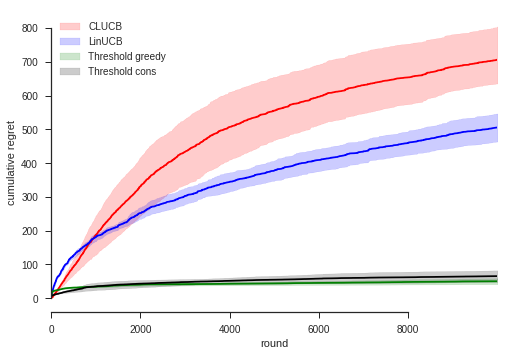

In [12]:
#Vary the confidence level, plot convergence rate, regret, risk
sns.tsplot(np.cumsum(regret, axis = 1), color = 'red')
sns.tsplot(np.cumsum(regret_linucb, axis = 1), color = 'blue')
sns.tsplot(np.cumsum(regret_thrgre, axis = 1), color = 'green')
sns.tsplot(np.cumsum(regret_thrcons, axis = 1), color = 'black')
plt.xlabel('round')
plt.ylabel('cumulative regret')
plt.legend(['CLUCB', 'LinUCB', 'Threshold greedy', 'Threshold cons'])
sns.despine(trim = True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


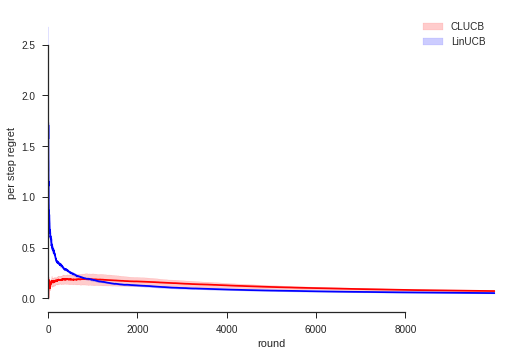

In [13]:
#Vary the confidence level, plot convergence rate, regret, risk
sns.tsplot(np.divide(np.cumsum(regret, axis = 1), np.arange(N)), color = 'red')
sns.tsplot(np.divide(np.cumsum(regret_linucb, axis = 1),np.arange(N)), color = 'blue')
plt.xlabel('round')
plt.ylabel('per step regret')
plt.legend(['CLUCB', 'LinUCB'])
sns.despine(trim = True)

## Plot the violation of constraints........

In [14]:
#cum_expt_rewards_rs = np.cumsum(expt_rewards_rs, axis = 1)
#cum_expt_rewards_baseline_rs = np.cumsum(expt_rewards_baseline_rs, axis = 1)
cum_expt_rewards_ucb = np.cumsum(expt_rewards_linucb, axis = 1)
cum_expt_rewards_baseline_ucb = np.cumsum(expt_rewards_baseline_linucb, axis = 1)
cum_expt_rewards_thr = np.cumsum(expt_rewards_thrgre, axis = 1)
cum_expt_rewards_baseline_thr = np.cumsum(expt_rewards_baseline_thrgre, axis = 1)
cum_expt_rewards_thrcons = np.cumsum(expt_rewards_thrcons, axis = 1)
cum_expt_rewards_baseline_thrcons = np.cumsum(expt_rewards_baseline_thrcons, axis = 1)
#cum_expt_rewards_gre = np.cumsum(expt_rewards_gre, axis = 1)
#cum_expt_rewards_baseline_gre = np.cumsum(expt_rewards_baseline_gre, axis = 1)
cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

constraint_violation_clucb = np.mean((cum_expt_rewards_clucb.T - (1-alpha)*cum_expt_rewards_baseline_clucb.T)<0,0)
#constraint_violation_gre = np.mean((cum_expt_rewards_gre.T - (1-alpha_clucb)*cum_expt_rewards_baseline_gre.T)<0,0)
constraint_violation_ucb = np.mean((cum_expt_rewards_ucb.T - (1-alpha)*cum_expt_rewards_baseline_ucb.T)<0,0)
#constraint_violation_rs = np.mean((cum_expt_rewards_rs.T - (1-alpha_clucb)*cum_expt_rewards_baseline_rs.T)<0,0)
constraint_violation_thr = np.mean((cum_expt_rewards_thr.T - (1-alpha)*cum_expt_rewards_baseline_thr.T)<0,0)
constraint_violation_thrcons = np.mean((cum_expt_rewards_thrcons.T - (1-alpha)*cum_expt_rewards_baseline_thrcons.T)<0,0)

all_method_constraints = 100*np.stack((constraint_violation_ucb,
                                       constraint_violation_thr,
                                       constraint_violation_thrcons,
                                       constraint_violation_clucb))

#all_method_constraints = 100*np.stack((constraint_violation_ucb,
#                                       constraint_violation_gre,
#                                       constraint_violation_thr,
#                                       constraint_violation_thrcons,
#                                       constraint_violation_rs,
#                                       constraint_violation_clucb))

#df_constraints = pd.DataFrame(data = all_method_constraints.T, columns = ['LinUCB', 'Greedy', 'RS-greedy', 'RS-conservative', 'RS-LinUCB', 'CLUCB'], index = range(M))
df_constraints = pd.DataFrame(data = all_method_constraints.T, columns = ['LinUCB', 'RS-greedy', 'RS-conservative', 'CLUCB'], index = range(M))

/home/lansdell/.local/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


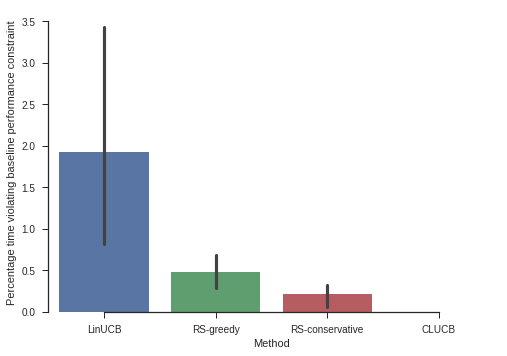

In [15]:
sns.barplot(data = df_constraints)
plt.xlabel("Method")
plt.ylabel("Percentage time violating baseline performance constraint")
sns.despine(trim = True)

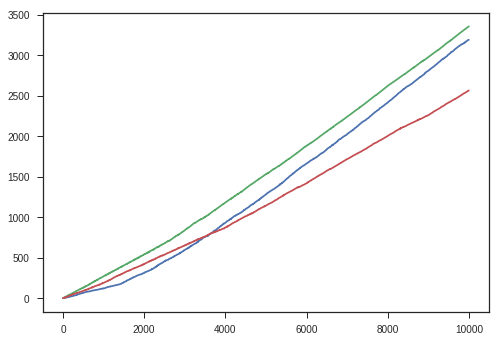

In [16]:
#cum_expt_rewards_clucb = np.cumsum(expt_rewards_clucb, axis = 1)
#cum_expt_rewards_baseline_clucb = np.cumsum(expt_rewards_baseline_clucb, axis = 1)

#plt.plot(cum_expt_rewards_clucb.T)
#cum_expt_rewards_clucb.shape
plt.plot(cum_expt_rewards_clucb.T - (1-alpha)*cum_expt_rewards_baseline_clucb.T);